# **Netflix Recommendation System**








#  Importing essesntial libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'netflix IDP.csv', 'sample_data']


II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("/content/netflix IDP.csv")


Verifying it as a 'dataframe'object in pandas

In [ ]:
def __init__(data=None, index=None, columns=None, dtype=None, copy=None) -> None:

    pass


Shape of datset

In [ ]:
dataset.shape

(7787, 35)

Printing out a few columns

In [ ]:
dataset.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  ... Unnamed: 25  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...         NaN   
1  December 23, 2016          2016  TV-MA     93 min  ...         NaN   
2  December 20, 2018          2011      R     78 min  ...         NaN   
3  November 16, 2017          2009  PG-13     80 min  ...         NaN   
4    January 1, 2020          2008  PG-13    123 min  ...         NaN   
5       July 1, 2017          2016  TV-MA   1 Season  ...         NaN   
6       June 1, 2020          2019  TV-MA     95 min  ...         NaN   
7   November 1, 2019          1997      R    119 min  ...         NaN   
8      April 1, 2019          2019  TV-14    118 min  ...         NaN   
9  December 15, 2017          2008  TV-MA    143 min  ...         NaN   

  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   
5         NaN          NaN          NaN          NaN          NaN   
6         NaN          NaN          NaN          NaN          NaN   
7         NaN          NaN          NaN          NaN          NaN   
8         NaN          NaN          NaN          NaN          NaN   
9         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 31  Unnamed: 32  \
0          NaN          NaN   
1          NaN          NaN   
2          NaN          NaN   
3          NaN          NaN   
4          NaN          NaN   
5          NaN          NaN   
6          NaN          NaN   
7          NaN          NaN   
8          NaN          NaN   
9          NaN          NaN   

                                           image_url  \
0  https://m.media-amazon.com/images/M/MV5BNzY1Yj...   
1  https://m.media-amazon.com/images/M/MV5BNGY0Nz...   
2  ['Michael Douglas', 'Sarah Baker', 'Graham Rog...   
3  ['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...   
4  ['David Stakston', 'Jonas Strand Gravli', 'Her...   
5  ['Adam Brody', 'Edi Gathegi', 'Otmara Marrero'...   
6  ['Ellen Pompeo', 'Chandra Wilson', 'James Pick...   
7  ['Nonso Anozie', 'Christian Convery', 'Stefani...   
8  ['James Spader', 'Megan Boone', 'Diego Klatten...   
9  ['Josh Duhamel', 'Ben Daniels', 'Leslie Bibb',...   

                                         Unnamed: 34  
0                                                NaN  
1                                                NaN  
2  

In [ ]:
dataset.sample(5)

show_id     type                       title              director  \
1880   s1881  TV Show  Droppin' Cash: Los Angeles                   NaN   
4201   s4202  TV Show          Monster Math Squad                   NaN   
7224   s7225  TV Show                    Trinkets                   NaN   
6945   s6946    Movie           The Trip to Spain  Michael Winterbottom   
2097   s2098    Movie                      Fallen        Gregory Hoblit   

                                                   cast         country  \
1880                                                NaN   United States   
4201  Julie Sype, Cory Doran, Annick Obonsawin, Jenn...          Canada   
7224  Brianna Hildebrand, Kiana Madeira, Quintessa S...   United States   
6945  Steve Coogan, Rob Brydon, Marta Barrio, Claire...  United Kingdom   
2097  Denzel Washington, John Goodman, Donald Suther...   United States   

             date_added  release_year rating   duration  ... Unnamed: 25  \
1880    August 28, 2019          2019  TV-MA  2 Seasons  ...         NaN   
4201       May 15, 2020          2012   TV-Y  2 Seasons  ...         NaN   
7224    August 25, 2020          2020  TV-MA  2 Seasons  ...         NaN   
6945  December 12, 2017          2016  TV-MA    108 min  ...         NaN   
2097   November 1, 2019          1998      R    124 min  ...         NaN   

     Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  Unnamed: 30  \
1880         NaN          NaN          NaN          NaN          NaN   
4201         NaN          NaN          NaN          NaN          NaN   
7224         NaN          NaN          NaN          NaN          NaN   
6945         NaN          NaN          NaN          NaN          NaN   
2097         NaN          NaN          NaN          NaN          NaN   

      Unnamed: 31  Unnamed: 32  \
1880          NaN          NaN   
4201          NaN          NaN   
7224          NaN          NaN   
6945          NaN          NaN   
2097          NaN          NaN   

                                              image_url  \
1880  ['Bruce Hamilton', 'Kip Andersen', 'Al Gore', ...   
4201  ['María Valverde', 'Dolores Fonzi', 'Guillermo...   
7224                                                NaN   
6945  ['Paul James', 'Callie Hernandez', 'Marianne J...   
2097  ['César Mateo', 'María de Nati', 'Verónika Mor...   

                                            Unnamed: 34  
1880  https://m.media-amazon.com/images/M/MV5BMTU5Nz...  
4201  https://m.media-amazon.com/images/G/01/imdb/im...  
7224                                                NaN  
6945  https://m.media-amazon.com/images/M/MV5BMzA2Mj...  
2097  https://m.media-amazon.com/images/M/MV5BODkxOT...  

[5 rows x 35 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7787 non-null   object 
 1   type          7787 non-null   object 
 2   title         7787 non-null   object 
 3   director      5398 non-null   object 
 4   cast          7069 non-null   object 
 5   country       7280 non-null   object 
 6   date_added    7777 non-null   object 
 7   release_year  7787 non-null   int64  
 8   rating        7780 non-null   object 
 9   duration      7787 non-null   object 
 10  listed_in     7787 non-null   object 
 11  description   7787 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

Let's Understand our columns better:

In [ ]:
import pandas as pd

data_new = pd.read_csv("/content/netflix IDP.csv")

print("Columns:\n", data_new.columns)

for col in data_new.columns:
    print(f"Unique values in {col}:\n", data_new[col].unique())


Columns:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'image_url', 'Unnamed: 34'],
      dtype='object')
Unique values in show_id:
 ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
Unique values in type:
 ['TV Show' 'Movie']
Unique values in title:
 ['3%' '07:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values in director:
 [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Unique values in cast:
 ['João Miguel, Bianca Comparato, Mich

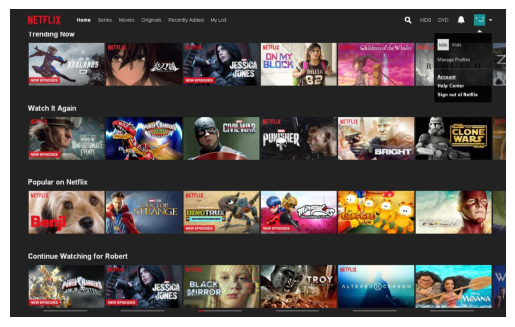

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update the image path to point to the location of the uploaded image
image_path = '/content/Netf.jpg'  # If the image is in the root directory of Colab


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()

# **Data Preprocessing**

Check for missing values

In [ ]:
import pandas as pd

# Assuming 'data_new' from the previous cell is the DataFrame you want to work with
data = pd.read_csv("/content/netflix IDP.csv")  # Or data = data_new if it's already loaded

print("\nMissing values in each column:")
print(data.isnull().sum())

# Option 1: Drop rows with missing values
data_cleaned = data.dropna()  # Drop rows with any null values
# OR Option 2: Fill missing values with a placeholder (e.g., empty string or mean for numerical data)
# data_cleaned = data.fillna('')

print("\nData shape after handling missing values:", data_cleaned.shape)


Missing values in each column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
Unnamed: 12     7787
Unnamed: 13     7787
Unnamed: 14     7787
Unnamed: 15     7787
Unnamed: 16     7787
Unnamed: 17     7787
Unnamed: 18     7787
Unnamed: 19     7787
Unnamed: 20     7787
Unnamed: 21     7787
Unnamed: 22     7787
Unnamed: 23     7787
Unnamed: 24     7787
Unnamed: 25     7787
Unnamed: 26     7787
Unnamed: 27     7787
Unnamed: 28     7787
Unnamed: 29     7787
Unnamed: 30     7787
Unnamed: 31     7787
Unnamed: 32     7787
image_url        779
Unnamed: 34      781
dtype: int64

Data shape after handling missing values: (0, 35)


Check for duplicates

In [ ]:
print("\nNumber of duplicate rows:", data_cleaned.duplicated().sum())

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()
print("Data shape after removing duplicates:", data_cleaned.shape)


Number of duplicate rows: 0
Data shape after removing duplicates: (0, 35)


Data Cleaning (Text Processing)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to clean text data
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Clean the dataset by dropping unnamed columns and the 'image_url' column
data_cleaned = data.loc[:, ~data.columns.str.contains('^Unnamed|image_url', case=False)]

# Apply the clean_text function to the 'title' and 'description' columns (if 'description' exists)
if 'description' in data_cleaned.columns:
    data_cleaned['cleaned_title'] = data_cleaned['title'].apply(clean_text)
    data_cleaned['cleaned_description'] = data_cleaned['description'].apply(clean_text)

# Show the cleaned data
print("\nData after text cleaning:")
print(data_cleaned[['cleaned_title', 'cleaned_description']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-6-3c128b64d6b8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_title'] = data_cleaned['title'].apply(clean_text)



Data after text cleaning:
  cleaned_title                                cleaned_description
0                future elite inhabit island paradise far crowd...
1                devastating earthquake hits mexico city trappe...
2                army recruit found dead fellow soldiers forced...
3                postapocalyptic world ragdoll robots hide fear...
4                brilliant group students become cardcounting e...


<ipython-input-6-3c128b64d6b8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_description'] = data_cleaned['description'].apply(clean_text)


In [ ]:
print(data_cleaned.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'cleaned_title', 'cleaned_description'],
      dtype='object')


# **Data Visualization**

Analysing the 'target' Variable

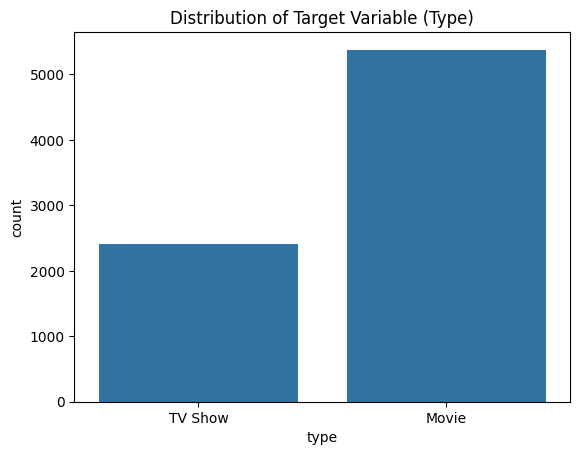

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [ ]:
sns.countplot(x='type', data=data_new)
plt.title('Distribution of Target Variable (Type)')
plt.show()

print(data_new['type'].value_counts())

<ipython-input-8-c1c2d4895000>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data_cleaned, palette='Set2')


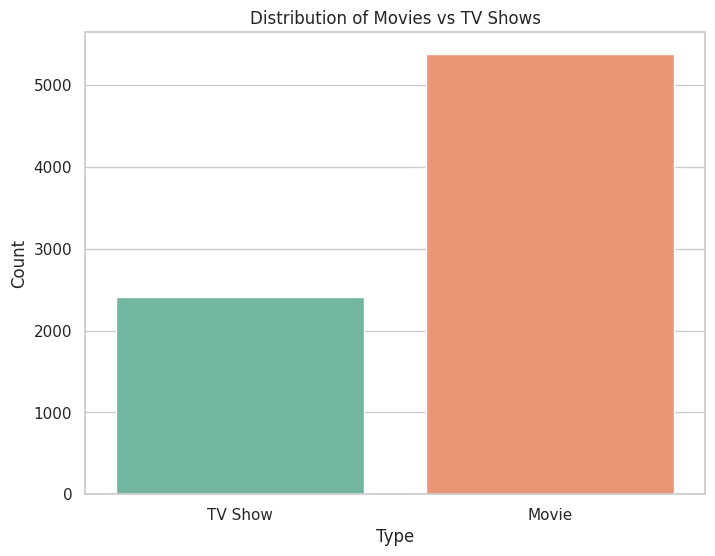

<ipython-input-8-c1c2d4895000>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set3')


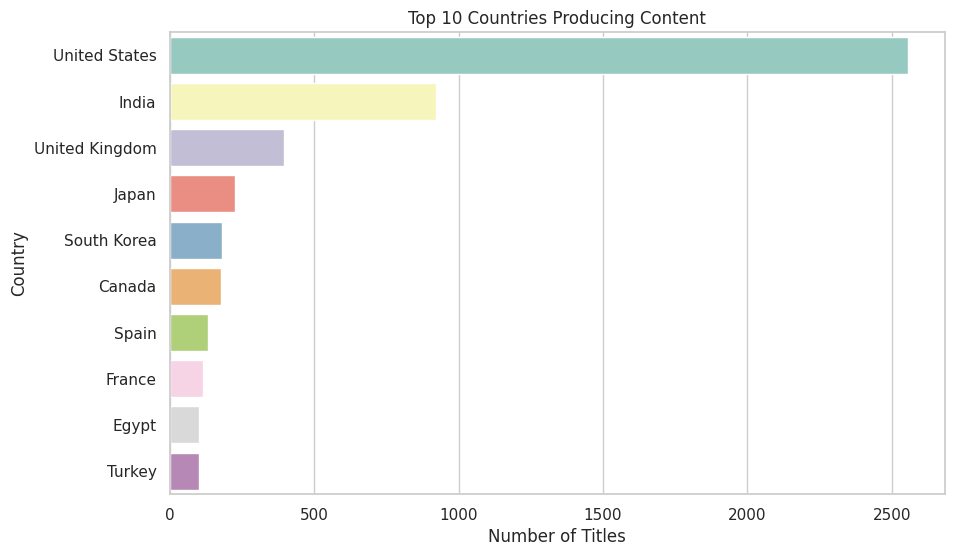

<ipython-input-8-c1c2d4895000>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data_cleaned, palette='coolwarm', order=data_cleaned['rating'].value_counts().index)


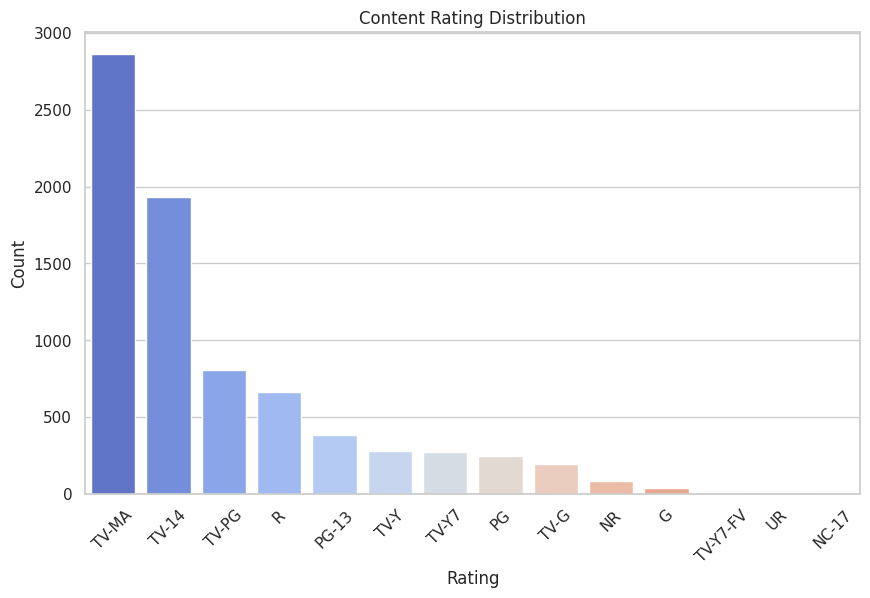

<ipython-input-8-c1c2d4895000>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['duration_numeric'] = data_cleaned['duration'].str.extract('(\d+)').astype(float)


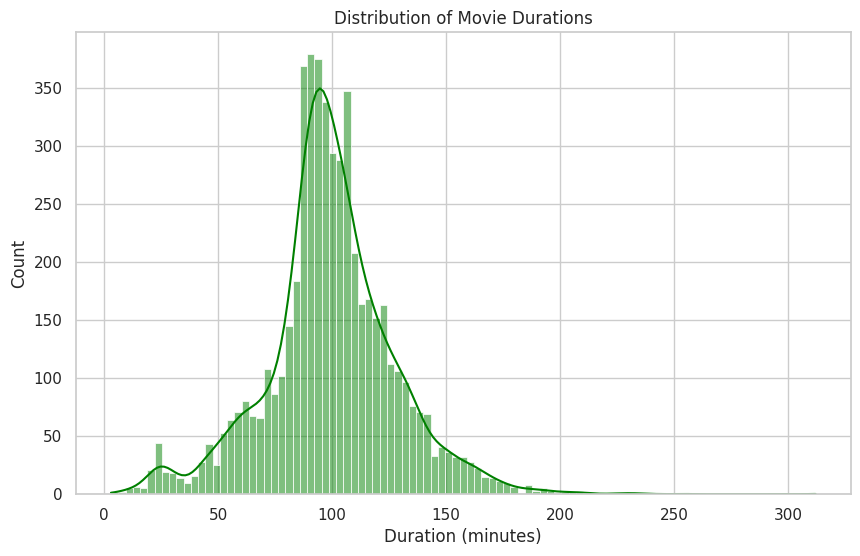

<ipython-input-8-c1c2d4895000>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=data_cleaned, palette='viridis', order=data_cleaned['release_year'].value_counts().index)


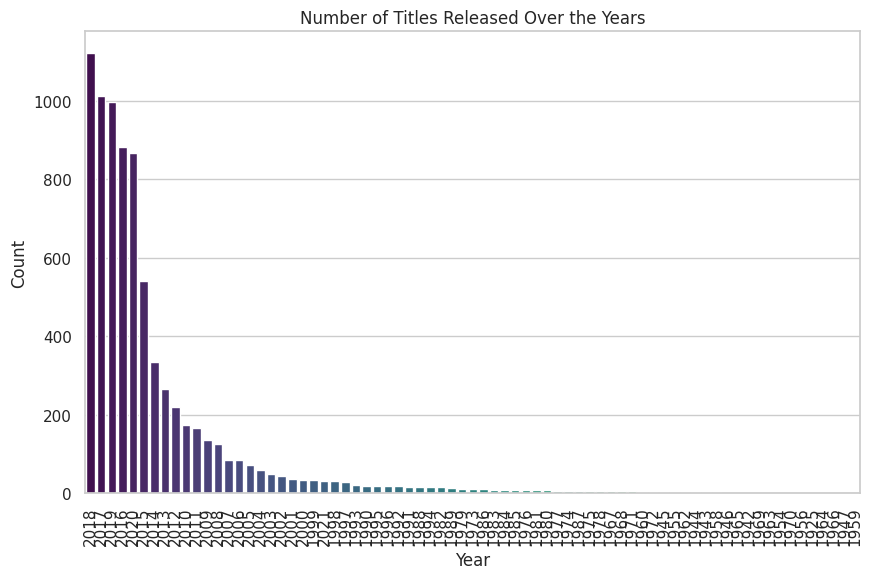

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Movies vs TV Shows
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data_cleaned, palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Top 10 Countries Producing Content
top_countries = data_cleaned['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set3')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 3. Content Rating Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=data_cleaned, palette='coolwarm', order=data_cleaned['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Distribution of Movie Durations
# Assuming durations are in the format "XX min", we will extract the number of minutes for movies
data_cleaned['duration_numeric'] = data_cleaned['duration'].str.extract('(\d+)').astype(float)
movies_duration = data_cleaned[data_cleaned['type'] == 'Movie']

plt.figure(figsize=(10,6))
sns.histplot(movies_duration['duration_numeric'], kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# 5. Number of Titles Released Over the Years
plt.figure(figsize=(10,6))
sns.countplot(x='release_year', data=data_cleaned, palette='viridis', order=data_cleaned['release_year'].value_counts().index)
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**Exploratory Data Analysis(EDA)**

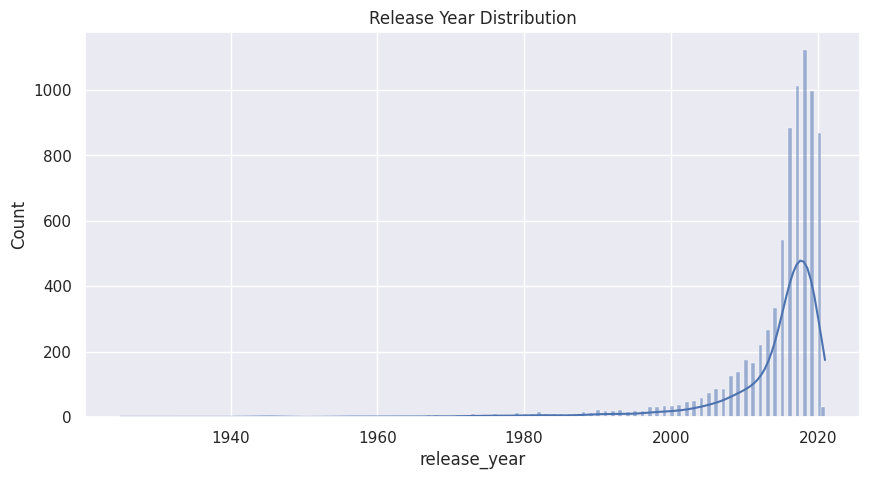

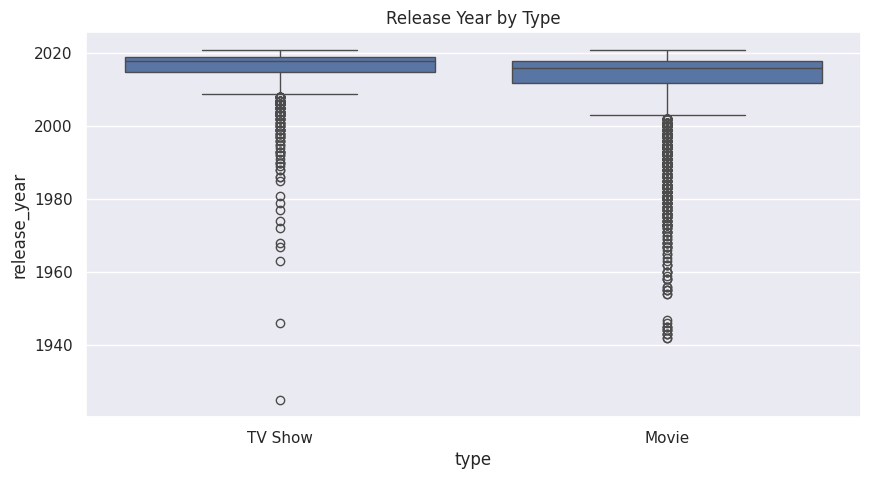

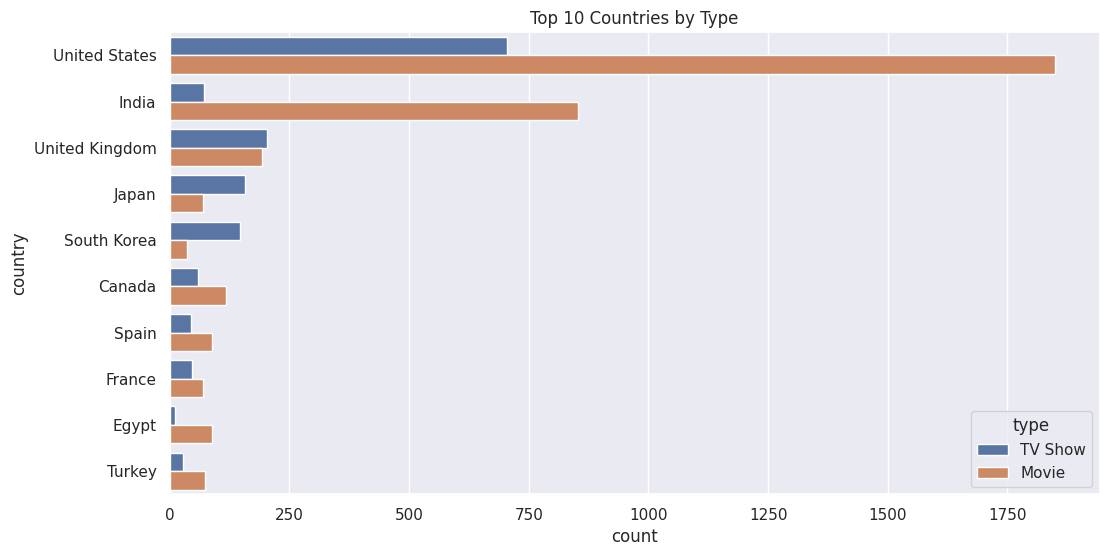

In [ ]:

plt.figure(figsize=(10,5))
sns.histplot(data_new['release_year'], kde=True)
plt.title('Release Year Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='release_year', data=data_new)
plt.title('Release Year by Type')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=data_new, order=data_new['country'].value_counts().index[:10])
plt.title('Top 10 Countries by Type')
plt.show()

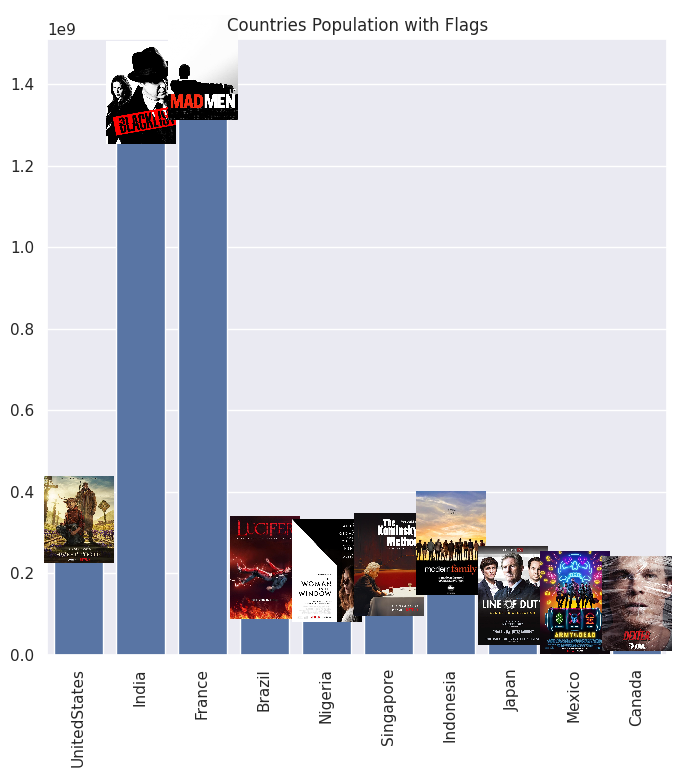

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from io import BytesIO

countries_fin = {
    'UnitedStates': 331002651,
    'India': 1380004385,
    'France': 1439323776,
    'Brazil': 212559417,
    'Nigeria': 206139589,
    'Singapore': 220892340,
    'Indonesia': 273523615,
    'Japan': 145934462,
    'Mexico': 128932753,
    'Canada': 126476461
}

image_urls = {
    'UnitedStates': 'https://m.media-amazon.com/images/M/MV5BOTk4ZDRhYzEtZWExNy00MjIyLTgyYmMtN2Y2MzA4YzZhZTZmXkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_FMjpg_UX1000_.jpg',
    'India': 'https://m.media-amazon.com/images/M/MV5BZDA1MzE3M2EtNTE4Ni00OGE4LWE1NjctYzFhMzA2NDgxMDIxXkEyXkFqcGdeQXVyODUxOTU0OTg@._V1_FMjpg_UX1000_.jpg',
    'France': 'https://m.media-amazon.com/images/M/MV5BNTgxNDZlODQtNDcwOC00NWQ5LTljNWMtMDhjY2U5YTUzMTc4XkEyXkFqcGdeQXVyMDA4NzMyOA@@._V1_FMjpg_UX1000_.jpg',
    'Brazil': 'https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_FMjpg_UX1000_.jpg',
    'Nigeria': 'https://m.media-amazon.com/images/M/MV5BYmVlNWJkZWYtYmJkMy00YTZlLTgwODMtZjVmOGMzMmM1ZTk2XkEyXkFqcGdeQXVyMTAyMjQ3NzQ1._V1_FMjpg_UX1000_.jpg',
    'Singapore': 'https://m.media-amazon.com/images/M/MV5BMzA0YTNjOTAtNmVkZi00YjBkLTgyZDItOTFmMzQ0N2E4ZDNiXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_FMjpg_UX1000_.jpg',
    'Indonesia': 'https://m.media-amazon.com/images/M/MV5BNzRhNWIxYTEtYjc2NS00YWFlLWFhOGEtMDZiMWM1M2RkNDkyXkEyXkFqcGdeQXVyNjc0MjkzNjc@._V1_FMjpg_UX1000_.jpg',
    'Japan': 'https://m.media-amazon.com/images/M/MV5BMTExZDZjNTMtNDVmNy00ZTk2LWFiMzUtZDlkZGRlOGU0ZWRmXkEyXkFqcGdeQXVyMjExMjk0ODk@._V1_FMjpg_UX1000_.jpg',
    'Mexico': 'https://m.media-amazon.com/images/M/MV5BNGY0NzgzYzctYWQwMC00MzM2LThjNGMtZjFjMWUyNzg0ZmM0XkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_FMjpg_UX1000_.jpg',
    'Canada': 'https://m.media-amazon.com/images/M/MV5BMTM5MjkwMTI0MV5BMl5BanBnXkFtZTcwODQwMTc0OQ@@._V1_FMjpg_UX1000_.jpg'
}

plt.figure(figsize=(8, 8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10], y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation=90)

def get_image(url, zoom=0.1):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return OffsetImage(img, zoom=zoom)

for i, country in enumerate(list(countries_fin.keys())[0:10]):
    if country in image_urls:
        imagebox = AnnotationBbox(
            get_image(image_urls[country], zoom=0.05),  # Adjust zoom as needed
            (i, countries_fin[country]),                # Position the image
            frameon=False
        )
        ax.add_artist(imagebox)

plt.title('Countries Population with Flags')
plt.show()


**First , amalysing the target variable

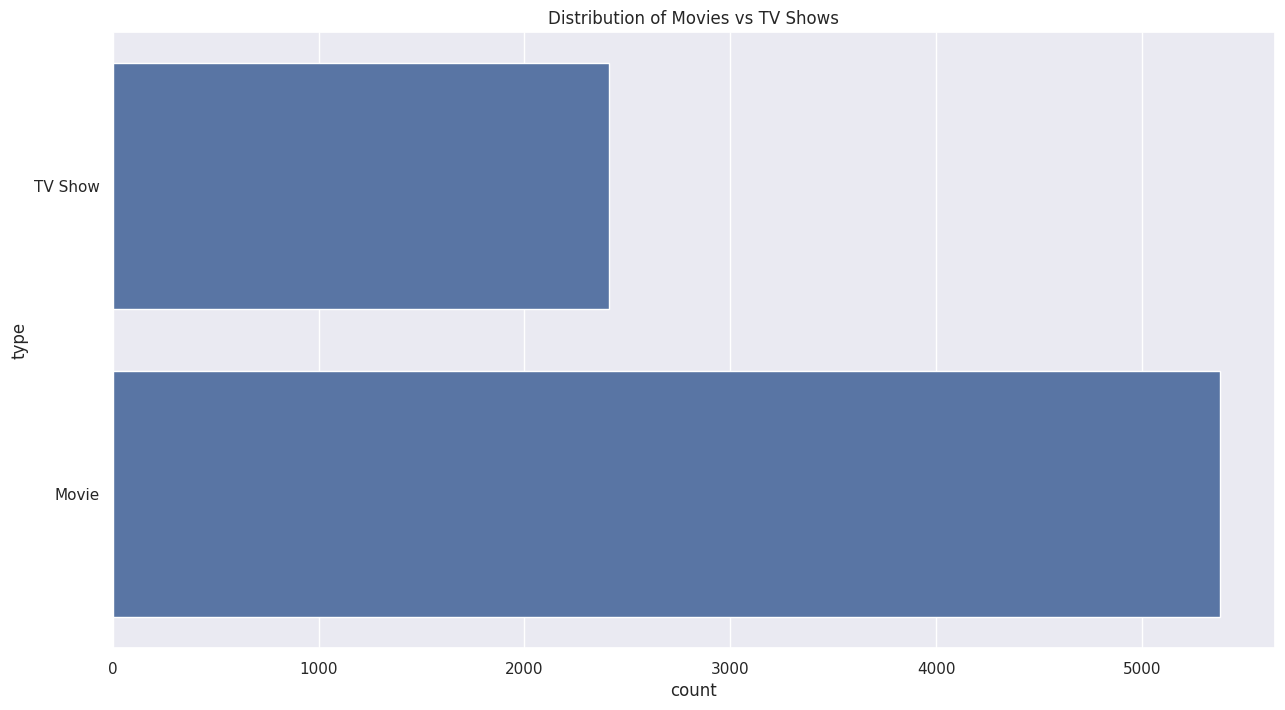

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [ ]:
import seaborn as sns

y = data_new['type']

sns.countplot(y)
plt.title("Distribution of Movies vs TV Shows")
plt.show()

target_temp = data_new['type'].value_counts()
print(target_temp)

In [ ]:
target_temp = data_new['type'].value_counts()

total_entries = len(data_new)

print("Percentage of entries that are Movies: " + str(round(target_temp['Movie'] * 100 / total_entries, 2)))
print("Percentage of entries that are TV Shows: " + str(round(target_temp['TV Show'] * 100 / total_entries, 2)))


countMovies = len(data_new[data_new['type'] == 'Movie'])
countTVShows = len(data_new[data_new['type'] == 'TV Show'])

print("Percentage of entries that are Movies: " + str(round(countMovies * 100 / total_entries, 2)))
print("Percentage of entries that are TV Shows: " + str(round(countTVShows * 100 / total_entries, 2)))

Percentage of entries that are Movies: 69.05
Percentage of entries that are TV Shows: 30.95
Percentage of entries that are Movies: 69.05
Percentage of entries that are TV Shows: 30.95


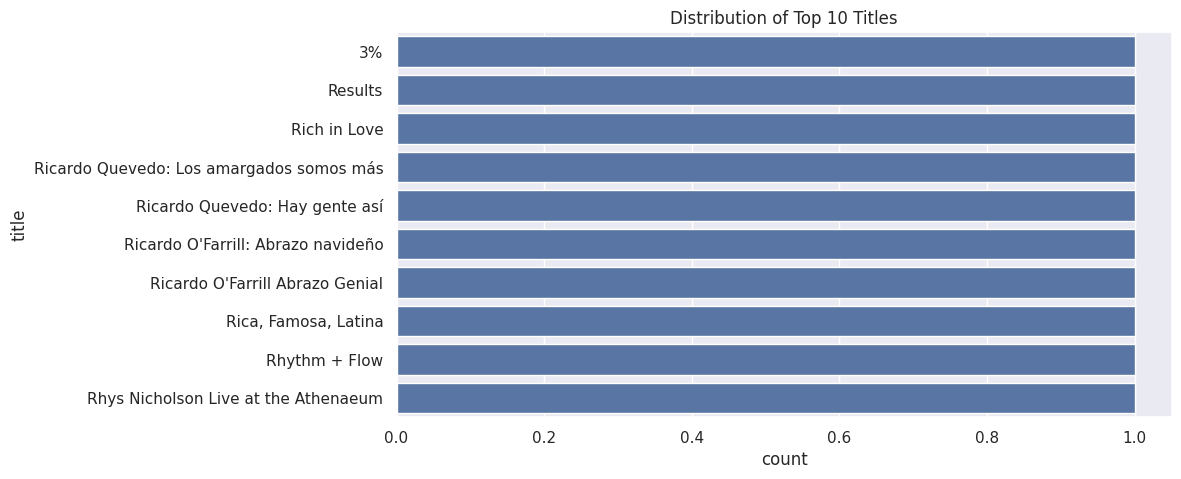

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(y='title', data=data_new, order=data_new['title'].value_counts().index[:10])
plt.title('Distribution of Top 10 Titles')
plt.show()

<ipython-input-9-116f76047f88>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


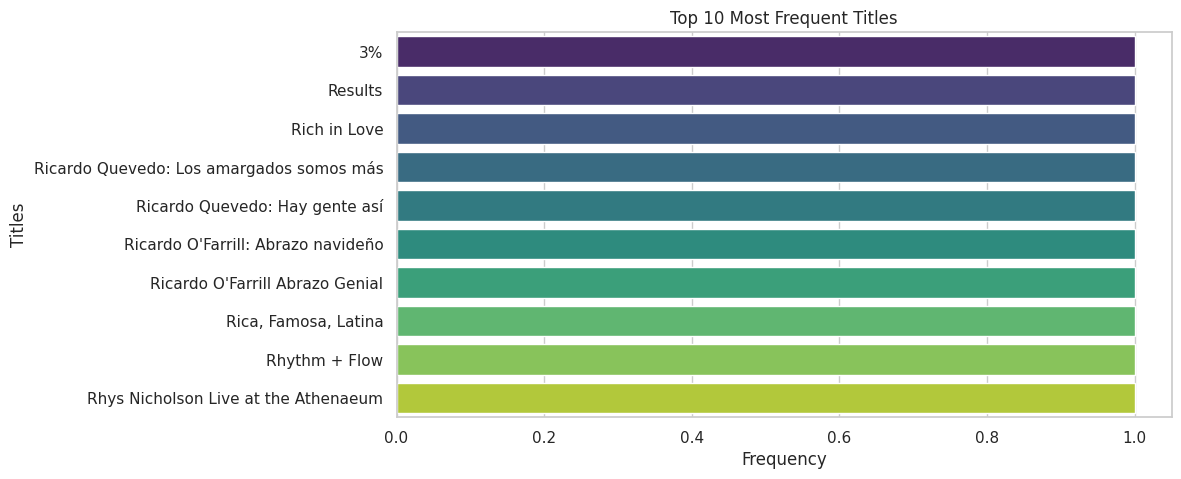

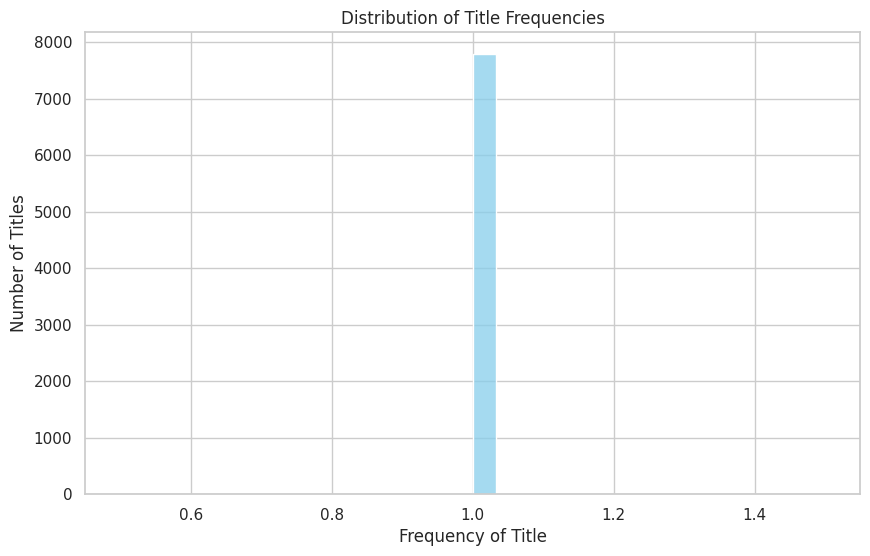

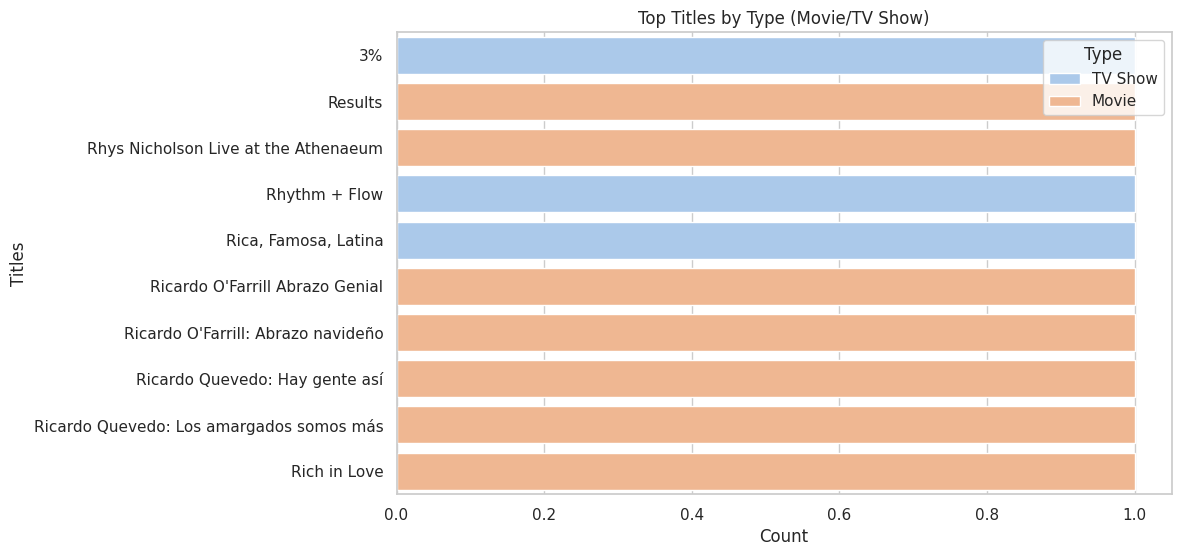

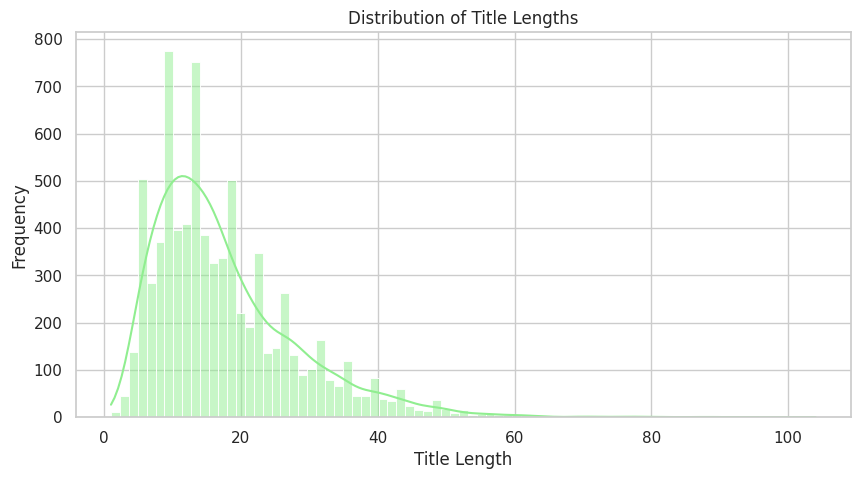

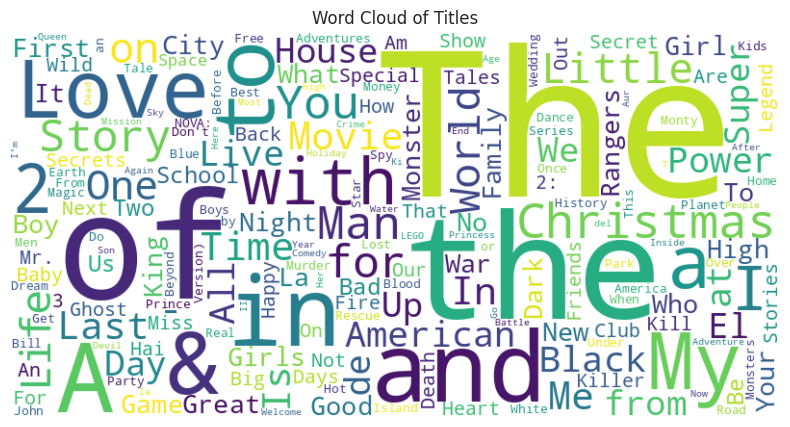

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the dataset
file_path = '/content/netflix IDP.csv'  # Update this path as needed
data_new = pd.read_csv(file_path)

# 1. Count of unique titles
unique_titles_count = data_new['title'].nunique()

# 2. Top 10 most frequent titles
top_titles = data_new['title'].value_counts().head(10)

# Plotting Top 10 Most Frequent Titles
plt.figure(figsize=(10, 5))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 10 Most Frequent Titles')
plt.xlabel('Frequency')
plt.ylabel('Titles')
plt.show()

# Plotting Distribution of Title Frequencies
plt.figure(figsize=(10, 6))
sns.histplot(data_new['title'].value_counts(), kde=False, bins=30, color='skyblue')
plt.title('Distribution of Title Frequencies')
plt.xlabel('Frequency of Title')
plt.ylabel('Number of Titles')
plt.show()

# Count of Titles by Type (Movie/TV Show)
top_title_types = data_new[data_new['title'].isin(top_titles.index)]
plt.figure(figsize=(10, 6))
sns.countplot(y='title', hue='type', data=top_title_types, palette='pastel')
plt.title('Top Titles by Type (Movie/TV Show)')
plt.xlabel('Count')
plt.ylabel('Titles')
plt.legend(title='Type')
plt.show()

# Title Length Analysis
data_new['title_length'] = data_new['title'].apply(len)

# Plotting Title Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data_new['title_length'], kde=True, color='lightgreen')
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# Generating Word Cloud of Titles
words = ' '.join(data_new['title']).split()
word_freq = Counter(words)

# Plotting Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

# Printing the 10 most common words in titles (optional; you can comment this out if you don't want output)
# print("\nTop 10 most common words in titles:\n", word_freq.most_common(10))


# **Data mining techniques**

**Association Rule mining**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

file_path = '/content/netflix IDP.csv'
data_cleaned = pd.read_csv(file_path)
# Ensure 'listed_in' column contains only strings
data_cleaned['listed_in'] = data_cleaned['listed_in'].astype(str)

# Convert the 'listed_in' column to a list of genres
data_cleaned['listed_in'] = data_cleaned['listed_in'].str.split(', ')

# Create a one-hot encoded DataFrame for the genres
genres = data_cleaned['listed_in'].explode().str.strip().unique()  # Extract all unique genres
one_hot_encoded = pd.DataFrame(0, index=data_cleaned.index, columns=genres)

# Fill the one-hot encoded DataFrame with 1s where the movie has that genre
for i, row in data_cleaned.iterrows():
    if isinstance(row['listed_in'], list):
        one_hot_encoded.loc[i, row['listed_in']] = 1

# Step 1: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_encoded, min_support=0.05, use_colnames=True)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Association Rules:
                antecedents               consequents   support  confidence  \
0  (International TV Shows)               (TV Dramas)  0.060229    0.391159   
1               (TV Dramas)  (International TV Shows)  0.060229    0.666193   
2                  (Dramas)    (International Movies)  0.166303    0.614910   
3    (International Movies)                  (Dramas)  0.166303    0.531391   
4      (Independent Movies)                  (Dramas)  0.066007    0.763744   
5                  (Dramas)      (Independent Movies)  0.066007    0.244065   
6                  (Dramas)                (Comedies)  0.055991    0.207028   
7                (Comedies)                  (Dramas)  0.055991    0.296397   
8                (Comedies)    (International Movies)  0.094003    0.497621   
9    (International Movies)                (Comedies)  0.094003    0.300369   

       lift  
0  4.326644  
1  4.326644  
2  1.964835  
3  1.964835  
4  2.823969  
5  2.823969  
6  1.095937 

Affinity analysis

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Check the structure of the dataset
print(data.head())

# Data Preprocessing
# Assuming 'listed_in' column contains genres which we want to analyze
# Create a one-hot encoded DataFrame for genres
# Split the genres into lists and create a one-hot encoding
data['genres'] = data['listed_in'].str.split(', ')
data_onehot = data.explode('genres')
onehot_encoded = pd.get_dummies(data_onehot['genres'])

# Aggregate the one-hot encoded DataFrame to create a basket matrix
basket = onehot_encoded.groupby(onehot_encoded.index).sum()

# Display the basket matrix
print("\nBasket Matrix:")
print(basket.head())

# Applying the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Generating the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
print(rules)

# Displaying top rules sorted by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)
print("\nTop Association Rules:")
print(top_rules)


  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  ... Unnamed: 25  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...         NaN   
1  December 23, 2016          2016  TV-MA     93 min  ...         NaN   
2  December 20, 2018          2011      R     78 min  ...        

**Sequence Analysis**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Display the columns to find user and date columns
print("Columns in the dataset:")
print(data.columns)

# Let's assume there are columns like 'user' for user identifier and 'date_added' for dates
# You might need to adjust these column names based on your actual dataset
user_column = 'user'  # Replace with actual user identifier column name
date_column = 'date_added'  # Replace with actual date column name

# Ensure that the relevant columns exist in the dataset
if user_column in data.columns and date_column in data.columns:
    # Convert 'date_added' to datetime if it's not already
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

    # Drop rows where date_added is NaT (if any)
    data.dropna(subset=[date_column], inplace=True)

    # Sort data by user and date_added to create sequences
    data.sort_values(by=[user_column, date_column], inplace=True)

    # Create a list of shows for each user in the order they were added
    sequences = data.groupby(user_column)['title'].apply(list).reset_index()

    # Display the sequences
    print("\nSequences of shows for each user:")
    print(sequences.head())

    # Create a one-hot encoded DataFrame for sequences
    onehot_encoded = sequences['title'].str.join(sep=',').str.get_dummies(sep=',')
    print("\nOne-Hot Encoded DataFrame:")
    print(onehot_encoded.head())

    # Applying the FPGrowth algorithm to find frequent itemsets
    frequent_itemsets = fpgrowth(onehot_encoded, min_support=0.05, use_colnames=True)
    print("\nFrequent Itemsets:")
    print(frequent_itemsets)

    # Generating the association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print("\nAssociation Rules:")
    print(rules)

    # Displaying top rules sorted by lift
    top_rules = rules.sort_values('lift', ascending=False).head(10)
    print("\nTop Association Rules:")
    print(top_rules)
else:
    print(f"Columns '{user_column}' or '{date_column}' do not exist in the dataset.")


Columns in the dataset:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'image_url', 'Unnamed: 34'],
      dtype='object')
Columns 'user' or 'date_added' do not exist in the dataset.


**Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
import re

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data.fillna('', inplace=True)

# Convert 'duration' to numeric values by extracting digits
# For example: '90 min' -> 90, '1 Season' -> 1
data['duration_numeric'] = data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Select features and target variable
# Assuming you want to predict 'type' (e.g., Movie, TV Show)
X = data[['duration_numeric', 'rating']]  # Features
y = data['type']  # Target variable

# Convert categorical variables to numerical
X['rating'] = LabelEncoder().fit_transform(X['rating'])  # Encode 'rating' if it's categorical
y = LabelEncoder().fit_transform(y)  # Encode 'type'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1090
           1       0.99      1.00      0.99       468

    accuracy                           1.00      1558
   macro avg       0.99      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558


Accuracy Score: 0.9961489088575096


**Prediction**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

# Assume the model is already trained and available as 'model'
# Also assuming the original dataset used the same preprocessing steps

# New dataset or new data row(s) for which you want to make predictions
new_data = pd.DataFrame({
    'duration': ['90 min', '2 Seasons', '120 min'],  # Example durations
    'rating': ['TV-MA', 'PG-13', 'R']  # Example ratings
})

# Convert 'duration' to numeric values (same preprocessing as the original data)
new_data['duration_numeric'] = new_data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Encode 'rating' (same preprocessing as the original data)
# Using the same LabelEncoder as the one used during training
new_data['rating'] = LabelEncoder().fit_transform(new_data['rating'])

# Select the same features as used in training
X_new = new_data[['duration_numeric', 'rating']]

# Make predictions using the trained model
y_pred_new = model.predict(X_new)

# Inverse transform the predicted labels to their original form (e.g., 'Movie', 'TV Show')
label_encoder = LabelEncoder()
label_encoder.fit(data['type'])  # Fit on the original 'type' column used during training
y_pred_labels = label_encoder.inverse_transform(y_pred_new)

# Display the predictions
new_data['predicted_type'] = y_pred_labels
print(new_data[['duration', 'rating', 'predicted_type']])


    duration  rating predicted_type
0     90 min       2          Movie
1  2 Seasons       0        TV Show
2    120 min       1          Movie


**Clustering**

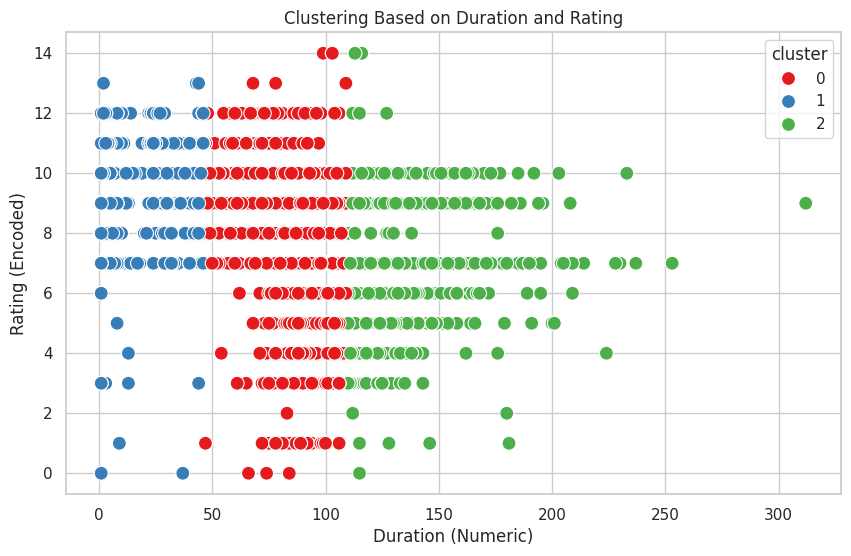

   title   duration rating  cluster
0     3%  4 Seasons  TV-MA        1
1  07:19     93 min  TV-MA        0
2  23:59     78 min      R        0
3      9     80 min  PG-13        0
4     21    123 min  PG-13        2


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data.fillna('', inplace=True)

# Convert 'duration' to numeric values by extracting digits (e.g., '90 min' -> 90)
data['duration_numeric'] = data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Encode the 'rating' column (if it's categorical)
data['rating_encoded'] = LabelEncoder().fit_transform(data['rating'])

# Select features for clustering (e.g., duration and rating)
X = data[['duration_numeric', 'rating_encoded']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters (n_clusters)
kmeans.fit(X)

# Add the cluster labels to the original dataset
data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_numeric', y='rating_encoded', hue='cluster', data=data, palette='Set1', s=100)
plt.title('Clustering Based on Duration and Rating')
plt.xlabel('Duration (Numeric)')
plt.ylabel('Rating (Encoded)')
plt.show()

# Display the first few rows with the cluster labels
print(data[['title', 'duration', 'rating', 'cluster']].head())


**Segmentation**

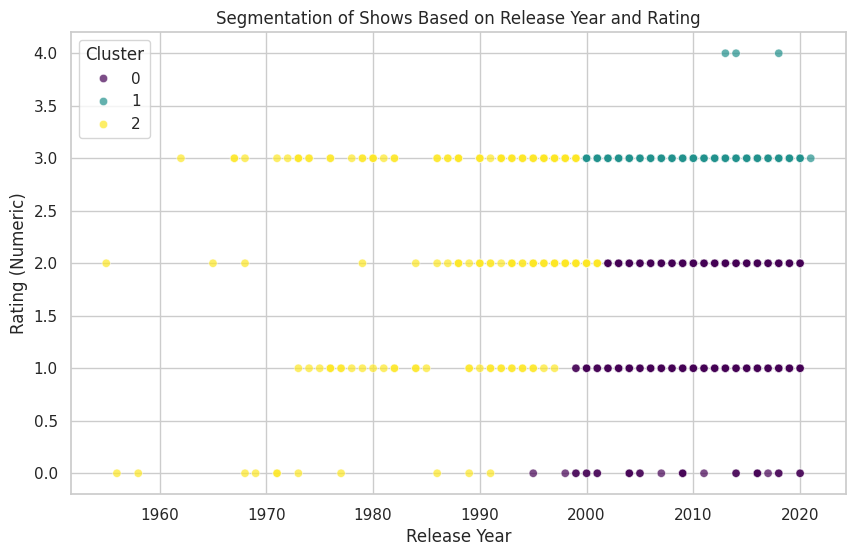


Segmented Data:
    title  release_year rating  cluster
2   23:59          2011      R        1
3       9          2009  PG-13        0
4      21          2008  PG-13        0
7     187          1997      R        2
14   3022          2019      R        1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# For this example, let's focus on 'release_year' and 'rating' (if numeric)
# Convert 'release_year' to numeric and drop NaN values
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
data.dropna(subset=['release_year'], inplace=True)

# Encode 'rating' into numeric values for clustering purposes
rating_mapping = {
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
    'NC-17': 4
}
data['rating_numeric'] = data['rating'].map(rating_mapping)

# Drop rows with NaN in 'rating_numeric'
data.dropna(subset=['rating_numeric'], inplace=True)

# Select relevant features for clustering
X = data[['release_year', 'rating_numeric']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='release_year', y='rating_numeric', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Segmentation of Shows Based on Release Year and Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating (Numeric)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display segmented data
print("\nSegmented Data:")
print(data[['title', 'release_year', 'rating', 'cluster']].head())


**Regression**

Coefficients: [-9.05885685]
Intercept: 141.65085851825265

Mean Absolute Error (MAE): 40.82656640312242
Mean Squared Error (MSE): 2298.014836438142
Root Mean Squared Error (RMSE): 47.937614004434366


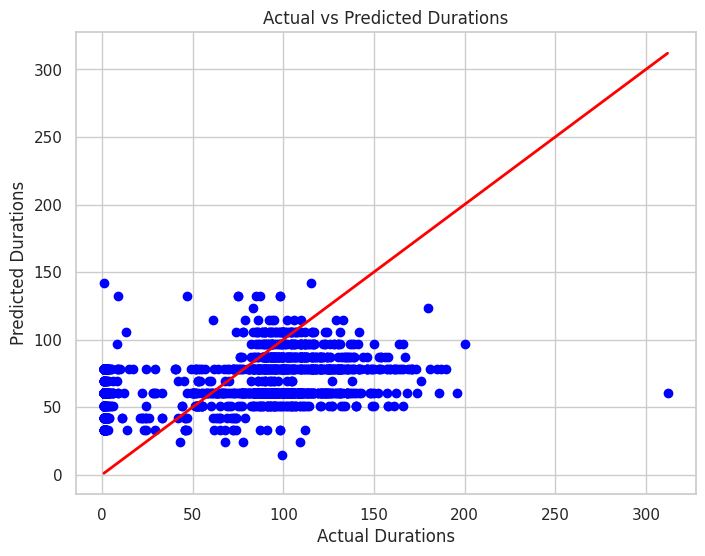

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import re
import matplotlib.pyplot as plt
from sklearn import metrics

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data.fillna('', inplace=True)

# Convert 'duration' to numeric values by extracting digits (e.g., '90 min' -> 90)
data['duration_numeric'] = data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Encode the 'rating' column (if it's categorical)
data['rating_encoded'] = LabelEncoder().fit_transform(data['rating'])

# Define the features (X) and target (y)
X = data[['rating_encoded']]  # Features (you can add more features if relevant)
y = data['duration_numeric']   # Target (duration)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Print the coefficients and intercept
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

# Evaluate the model
print("\nMean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", metrics.mean_squared_error(y_test, y_pred, squared=False))

# Plot the true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Durations')
plt.xlabel('Actual Durations')
plt.ylabel('Predicted Durations')
plt.show()


**Artificial Neural Network (ANN)**

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 463.9156 - mean_absolute_error: 13.6130
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MAE: 13.700600624084473
Test Loss (MSE): 475.0848693847656


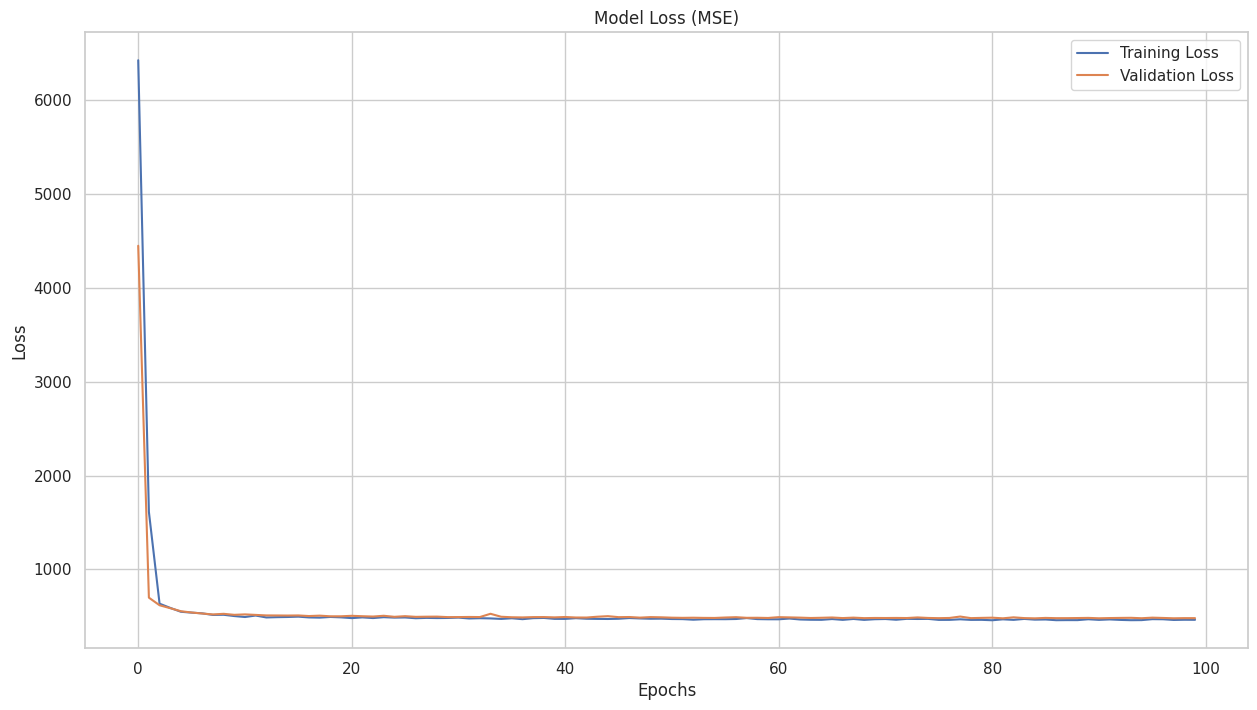

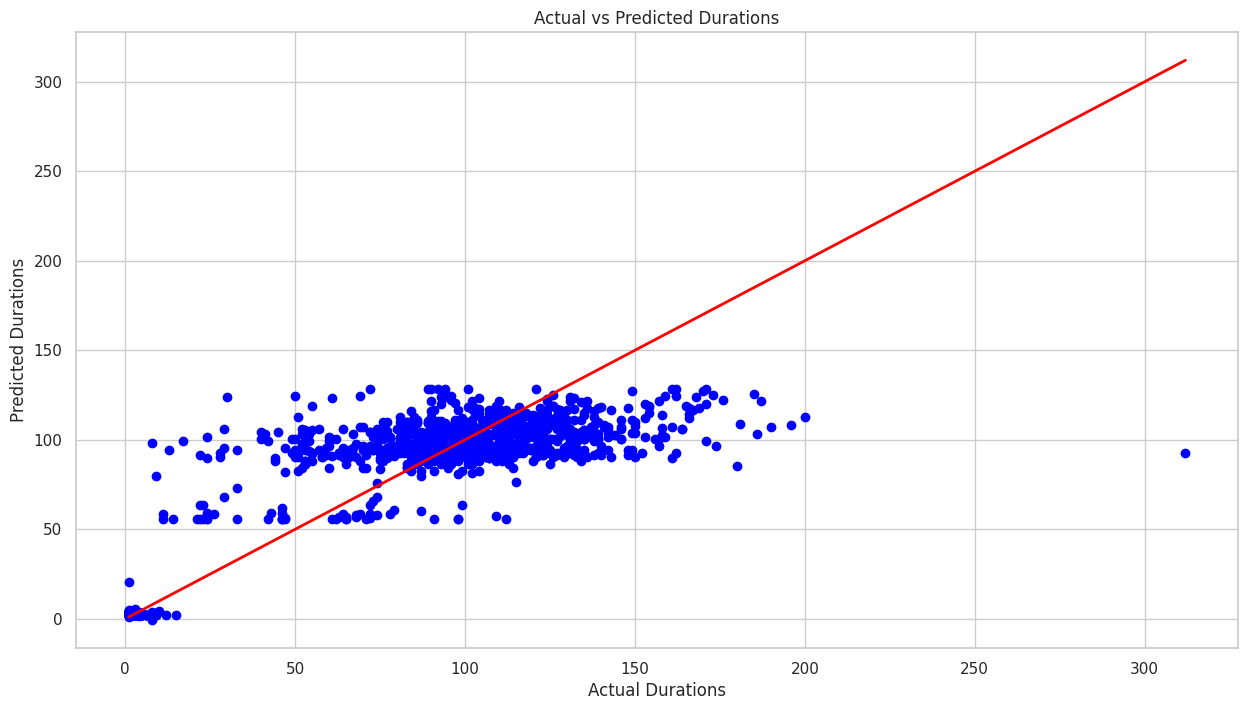

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data.fillna('', inplace=True)

# Convert 'duration' to numeric values by extracting digits (e.g., '90 min' -> 90)
data['duration_numeric'] = data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Encode categorical columns
data['rating_encoded'] = LabelEncoder().fit_transform(data['rating'])
data['type_encoded'] = LabelEncoder().fit_transform(data['type'])
data['release_year_encoded'] = LabelEncoder().fit_transform(data['release_year'])

# Feature Selection
# Select relevant features (feel free to add/remove depending on your dataset's structure)
X = data[['rating_encoded', 'release_year_encoded', 'type_encoded']]
y = data['duration_numeric']  # Target variable (duration)

# Standardize features for better ANN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Artificial Neural Network
model = Sequential()

# Input layer + hidden layer 1
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

# Hidden layer 2
model.add(Dense(units=32, activation='relu'))

# Output layer (since it's regression, no activation function)
model.add(Dense(units=1))

# Compile the model (using Adam optimizer and Mean Squared Error for regression)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model without detailed output
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Test MAE: {test_mae}")
print(f"Test Loss (MSE): {test_loss}")

# Plot training & validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot true vs predicted durations
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Durations')
plt.xlabel('Actual Durations')
plt.ylabel('Predicted Durations')
plt.show()


**Outlier Detection**

Number of outliers detected using IQR: 1
Number of outliers detected using Isolation Forest: 380


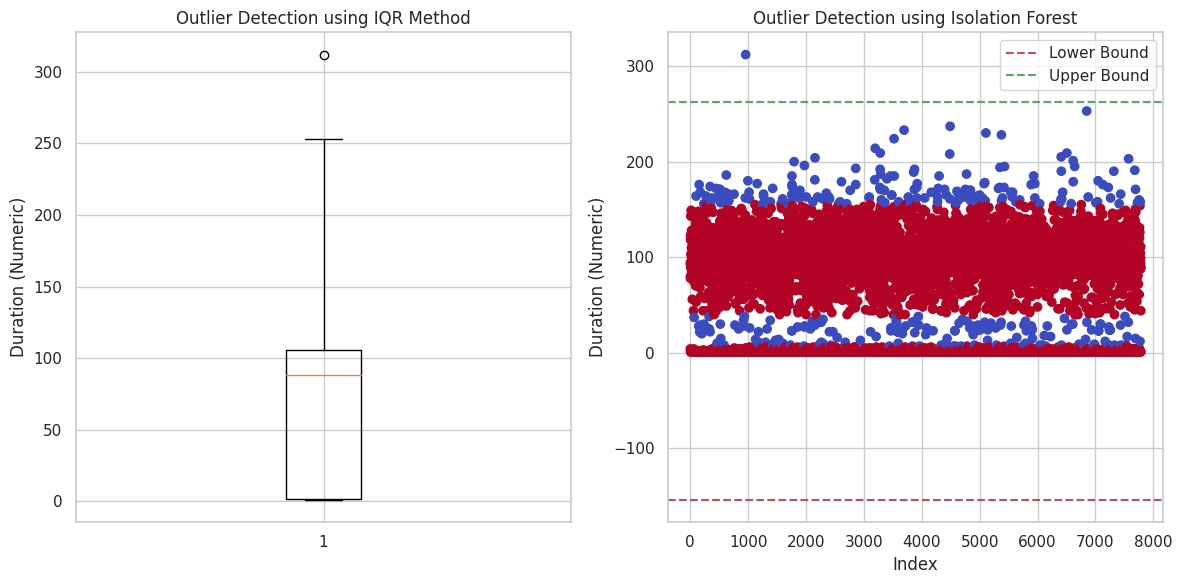

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data.fillna('', inplace=True)

# Convert 'duration' to numeric values by extracting digits (e.g., '90 min' -> 90)
data['duration_numeric'] = data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Select features for outlier detection
# In this case, we will use the 'duration_numeric' for the example
X = data[['duration_numeric']]

# Outlier detection using the IQR method
Q1 = X['duration_numeric'].quantile(0.25)
Q3 = X['duration_numeric'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = X[(X['duration_numeric'] < lower_bound) | (X['duration_numeric'] > upper_bound)]

# Print the number of outliers detected
print(f"Number of outliers detected using IQR: {outliers_iqr.shape[0]}")

# Outlier detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # 5% of the data as outliers
data['outlier'] = iso_forest.fit_predict(X)

# Outliers are marked as -1
outliers_iso = data[data['outlier'] == -1]

# Print the number of outliers detected using Isolation Forest
print(f"Number of outliers detected using Isolation Forest: {outliers_iso.shape[0]}")

# Visualize the results
plt.figure(figsize=(12, 6))

# IQR method visualization
plt.subplot(1, 2, 1)
plt.boxplot(X['duration_numeric'])
plt.title('Outlier Detection using IQR Method')
plt.ylabel('Duration (Numeric)')

# Isolation Forest visualization
plt.subplot(1, 2, 2)
plt.scatter(data.index, data['duration_numeric'], c=data['outlier'], cmap='coolwarm', marker='o')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Duration (Numeric)')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.legend()

plt.tight_layout()
plt.show()


**Predictive Modeling**

Mean Absolute Error (MAE): 13.68277280906248
Mean Squared Error (MSE): 483.29756142645596
Root Mean Squared Error (RMSE): 21.984029690356042


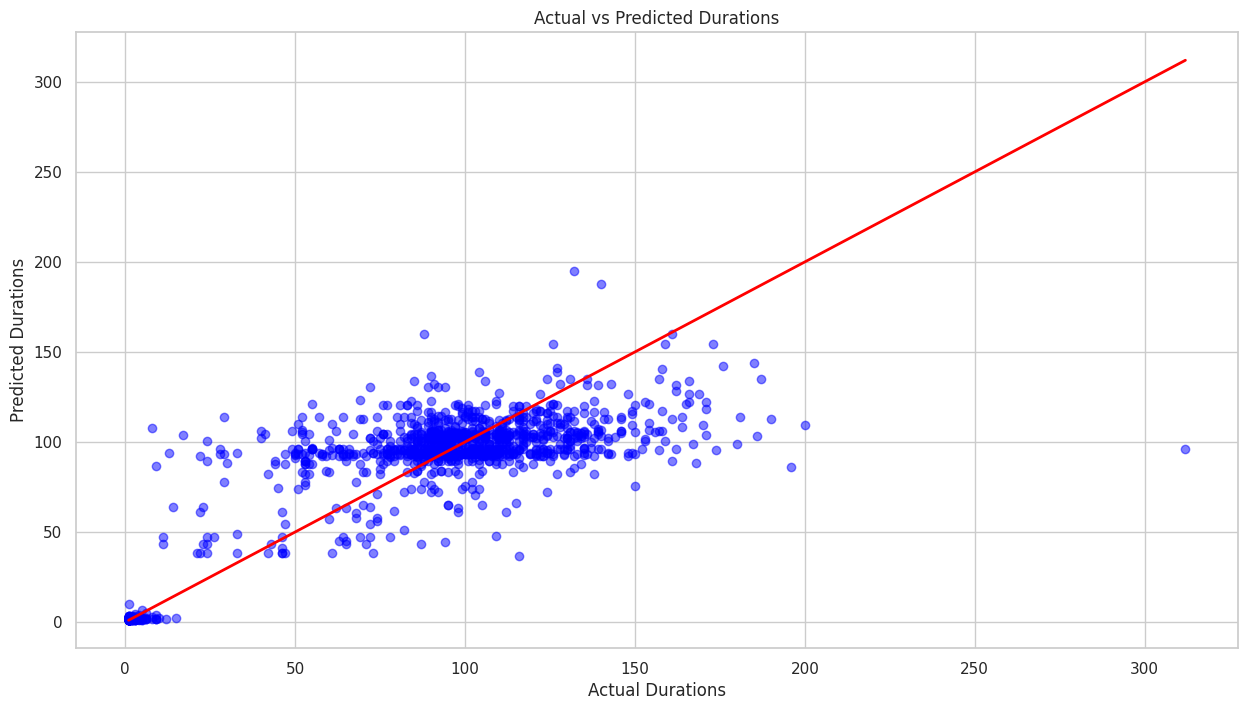

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data.fillna('', inplace=True)

# Convert 'duration' to numeric values by extracting digits (e.g., '90 min' -> 90)
data['duration_numeric'] = data['duration'].apply(lambda x: float(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

# Encode categorical columns
data['rating_encoded'] = LabelEncoder().fit_transform(data['rating'])
data['type_encoded'] = LabelEncoder().fit_transform(data['type'])
data['release_year_encoded'] = LabelEncoder().fit_transform(data['release_year'])

# Feature Selection
# Select relevant features for prediction
X = data[['rating_encoded', 'release_year_encoded', 'type_encoded']]
y = data['duration_numeric']  # Target variable (duration)

# Standardize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot true vs predicted durations
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Durations')
plt.xlabel('Actual Durations')
plt.ylabel('Predicted Durations')
plt.show()


**Time series analysis**

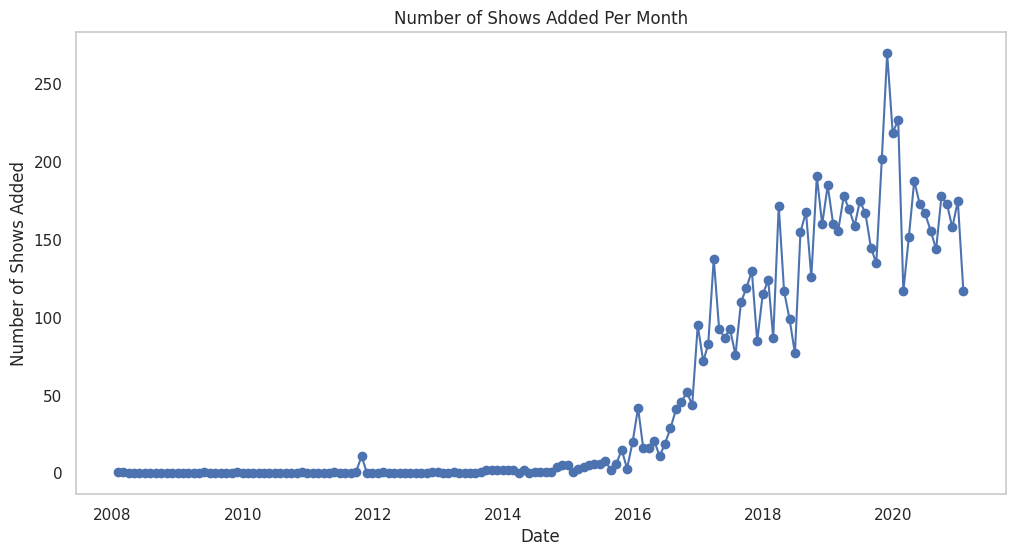

Dickey-Fuller Test Statistic: -0.021063436869246985
p-value: 0.9567551017303192
Critical Values: {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -685.743
Date:                Sun, 20 Oct 2024   AIC                           1377.487
Time:                        14:15:33   BIC                           1386.636
Sample:                    01-31-2008   HQIC                          1381.203
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1645      0.081

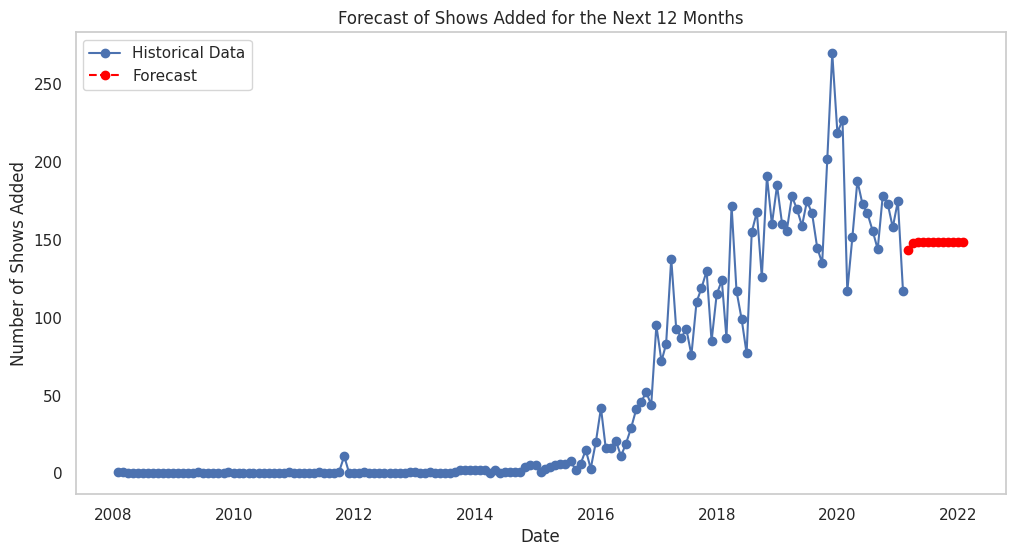

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Ensure the 'date_added' column is in datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Drop rows with NaT values in 'date_added'
data.dropna(subset=['date_added'], inplace=True)

# Set the date as the index
data.set_index('date_added', inplace=True)

# Resample the data to get the number of shows added per month
monthly_data = data.resample('M').size()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, marker='o')
plt.title('Number of Shows Added Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Shows Added')
plt.grid()
plt.show()

# Perform Dickey-Fuller test to check for stationarity
result = adfuller(monthly_data)
print(f'Dickey-Fuller Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# If the series is not stationary, take the difference
if result[1] > 0.05:
    monthly_data_diff = monthly_data.diff().dropna()
else:
    monthly_data_diff = monthly_data

# Fit an ARIMA model
# You can adjust p, d, q parameters based on ACF and PACF plots
model = ARIMA(monthly_data, order=(1, 1, 1))  # Example order (1,1,1)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecasting the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, marker='o', label='Historical Data')
plt.plot(forecast_series, marker='o', color='red', label='Forecast', linestyle='dashed')
plt.title('Forecast of Shows Added for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Shows Added')
plt.legend()
plt.grid()
plt.show()


# **Machine learning**

GVM( Gaussian Mixture Model)

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  ... Unnamed: 25  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...         NaN   
1  December 23, 2016          2016  TV-MA     93 min  ...         NaN   
2  December 20, 2018          2011      R     78 min  ...        

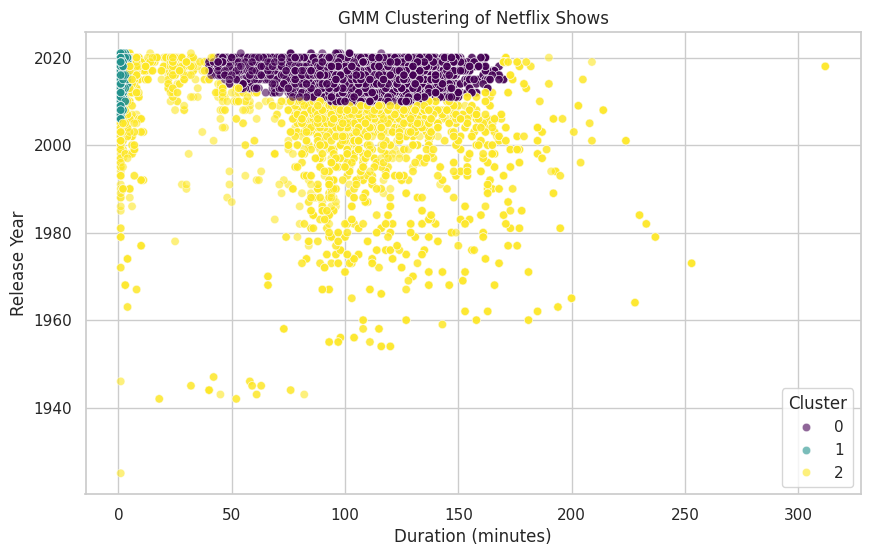

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Check the structure of the dataset
print(data.head())

# Data Preprocessing
# Assuming 'listed_in' column contains genres which we want to analyze
data['genres'] = data['listed_in'].str.split(', ')
data_onehot = data.explode('genres')

# Convert 'duration' to numeric
data_onehot['duration'] = data_onehot['duration'].str.extract('(\d+)').astype(float)

# Select features for GMM
# For example, let's say we want to use 'duration' and 'release_year' for clustering
features = data_onehot[['duration', 'release_year']]

# Handle missing values if necessary
features = features.fillna(features.mean())

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # You can adjust n_components based on your needs
gmm.fit(features)

# Predict cluster labels
data_onehot['cluster'] = gmm.predict(features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_onehot, x='duration', y='release_year', hue='cluster', palette='viridis', alpha=0.6)
plt.title('GMM Clustering of Netflix Shows')
plt.xlabel('Duration (minutes)')
plt.ylabel('Release Year')
plt.legend(title='Cluster')
plt.show()

SVR(Support Vector Regression)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Check the structure of the dataset
print(data.head())

# Data Preprocessing
# Assuming 'listed_in' column contains genres which we want to analyze
data['genres'] = data['listed_in'].str.split(', ')
data_onehot = data.explode('genres')

# Convert 'duration' to numeric
data_onehot['duration'] = data_onehot['duration'].str.extract('(\d+)').astype(float)

# Select features for SVR
# For example, let's say we want to predict 'duration' based on 'release_year'
features = data_onehot[['release_year']]  # Add more features as needed
target = data_onehot['duration']

# Handle missing values if necessary
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Support Vector Regression
svr = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  ... Unnamed: 25  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...         NaN   
1  December 23, 2016          2016  TV-MA     93 min  ...         NaN   
2  December 20, 2018          2011      R     78 min  ...        

Discriminant Analysis

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Check the structure of the dataset
print(data.head())

# Data Preprocessing
# Assuming 'listed_in' column contains genres which we want to analyze
data['genres'] = data['listed_in'].str.split(', ')
data_onehot = data.explode('genres')

# Encode the target variable (genres)
label_encoder = LabelEncoder()
data_onehot['genre_encoded'] = label_encoder.fit_transform(data_onehot['genres'])

# Convert 'duration' to numeric
# Extract numeric values from 'duration' and convert to int
data_onehot['duration'] = data_onehot['duration'].str.extract('(\d+)').astype(float)

# Select features for LDA (you can choose relevant features based on your dataset)
# For example, let's say we have 'duration' and 'release_year' as features
features = data_onehot[['duration', 'release_year']]
target = data_onehot['genre_encoded']

# Handle missing values if necessary
features = features.fillna(features.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions
y_pred = lda.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  ... Unnamed: 25  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...         NaN   
1  December 23, 2016          2016  TV-MA     93 min  ...         NaN   
2  December 20, 2018          2011      R     78 min  ...        

LinearRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Check the structure of the dataset
print(data.head())

# Data Preprocessing
# Assuming 'listed_in' column contains genres which we want to analyze
data['genres'] = data['listed_in'].str.split(', ')
data_onehot = data.explode('genres')

# Convert 'duration' to numeric
data_onehot['duration'] = data_onehot['duration'].str.extract('(\d+)').astype(float)

# Select features for Linear Regression
# For example, let's say we want to predict 'duration' based on 'release_year' and other features
features = data_onehot[['release_year']]  # Add more features as needed
target = data_onehot['duration']

# Handle missing values if necessary
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  ... Unnamed: 25  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...         NaN   
1  December 23, 2016          2016  TV-MA     93 min  ...         NaN   
2  December 20, 2018          2011      R     78 min  ...        

Monte Carlo Simulation

Estimated Average Rating: 2.26
Standard Deviation of Estimates: 0.09


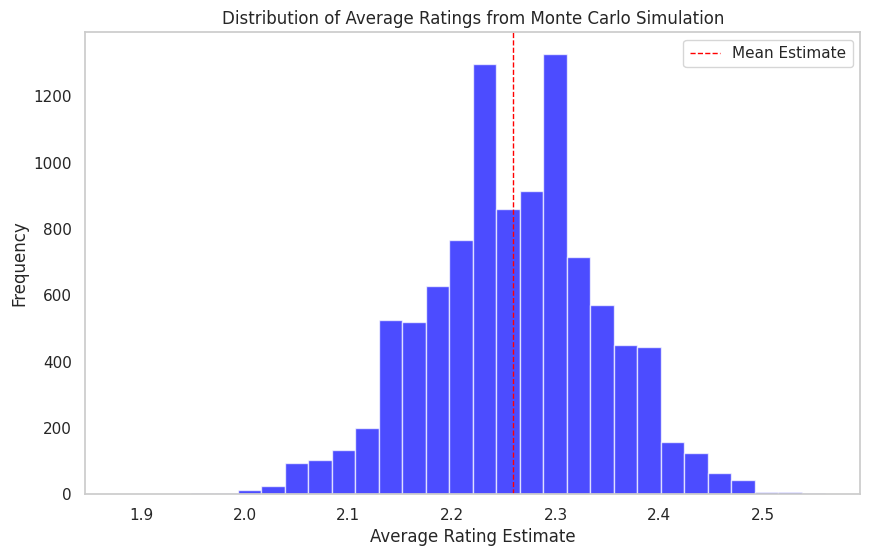

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/netflix IDP.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Ensure that the 'rating' column is numeric
rating_mapping = {
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
    'NC-17': 4
}
data['rating_numeric'] = data['rating'].map(rating_mapping)

# Drop rows with NaN in 'rating_numeric'
data.dropna(subset=['rating_numeric'], inplace=True)

# Monte Carlo Simulation Parameters
num_simulations = 10000  # Number of simulations
sample_size = 100        # Sample size for each simulation

# Function to perform Monte Carlo Simulation
def monte_carlo_average_rating(data, num_simulations, sample_size):
    averages = []

    for _ in range(num_simulations):
        # Sample data
        sample = data['rating_numeric'].sample(n=sample_size, replace=True)
        average = sample.mean()
        averages.append(average)

    return averages

# Run the Monte Carlo Simulation
average_ratings = monte_carlo_average_rating(data, num_simulations, sample_size)

# Calculate statistics
mean_estimate = np.mean(average_ratings)
std_dev_estimate = np.std(average_ratings)

# Results
print(f"Estimated Average Rating: {mean_estimate:.2f}")
print(f"Standard Deviation of Estimates: {std_dev_estimate:.2f}")

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(average_ratings, bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Average Ratings from Monte Carlo Simulation')
plt.xlabel('Average Rating Estimate')
plt.ylabel('Frequency')
plt.axvline(mean_estimate, color='red', linestyle='dashed', linewidth=1, label='Mean Estimate')
plt.legend()
plt.grid()
plt.show()


Heuristic Method

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/netflix IDP.csv'  # Adjust the file path as necessary
data = pd.read_csv(file_path)

# Display the dataset columns for reference
print("Columns in the dataset:")
print(data.columns)

# Data Preprocessing
# Let's filter the data to a specific genre and sort by rating
# For this example, we assume the 'rating' column is in the dataset and we will filter by 'listed_in'
# Replace 'Drama' with the genre of your choice
selected_genre = 'Drama'
filtered_data = data[data['listed_in'].str.contains(selected_genre, na=False)]

# Sort by rating (Assuming rating is a numerical value; if it's categorical, additional processing is needed)
filtered_data['rating_numeric'] = filtered_data['rating'].str.extract('(\d+)').astype(float)  # Convert rating to numeric
recommended_shows = filtered_data.sort_values(by='rating_numeric', ascending=False)

# Display top 5 recommended shows
top_recommended = recommended_shows[['title', 'rating', 'duration', 'listed_in']].head(5)

print("\nTop recommended shows based on heuristic method:")
print(top_recommended)


Columns in the dataset:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'image_url', 'Unnamed: 34'],
      dtype='object')

Top recommended shows based on heuristic method:
                          title rating duration  \
996   Blue Is the Warmest Color  NC-17  180 min   
3921                       Manu  TV-14  177 min   
5059               Radium Girls  TV-14  103 min   
5001                     Pulang  TV-14  119 min   
5003                Punjab 1984  TV-14  158 min   

                                             listed_in  
9

Deep Feedforward Neural Network

In [ ]:
# Example neural network code with adjusted verbosity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Sample data preparation (replace this with your actual dataset)
# X should be your features, and y should be your target variable
X = np.random.rand(1000, 10)  # Example feature data
y = np.random.rand(1000)       # Example target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple feedforward neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model without progress output
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Use verbose=0 for no output

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)  # Use verbose=0 for no output
print(f'Model Loss: {loss}')  # Display the loss after evaluation


Model Loss: 0.08506549894809723


# **Class Distribution**

Visualize the balance or imbalance between classes (Movie/TV show).

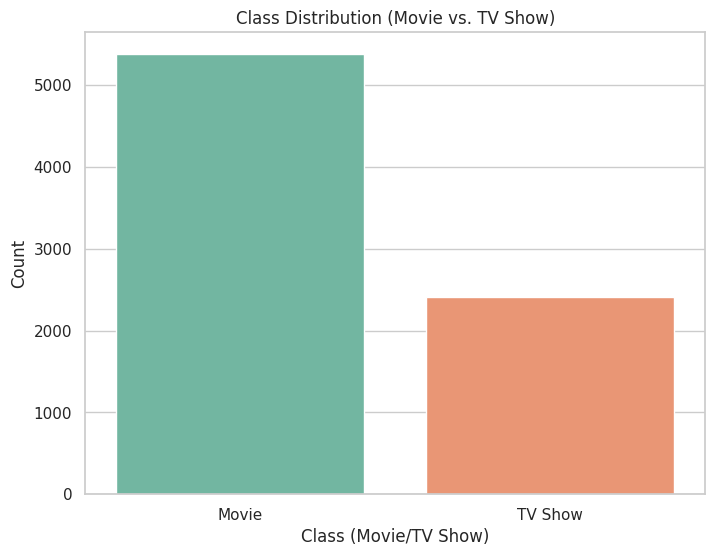

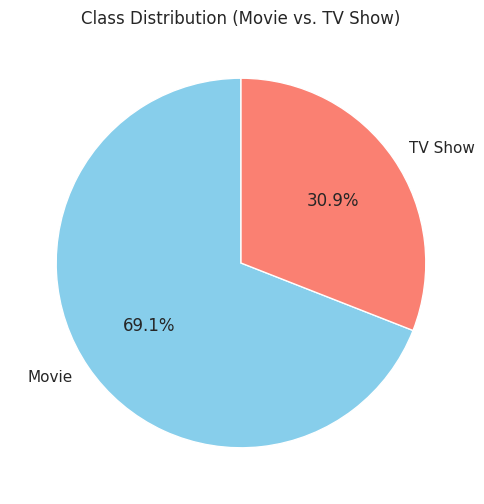

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'type' column (assuming 'type' column indicates Movie/TV Show)
class_counts = data_new['type'].value_counts()

# Plotting the class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Class Distribution (Movie vs. TV Show)')
plt.xlabel('Class (Movie/TV Show)')
plt.ylabel('Count')
plt.show()

# Plotting the class distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Class Distribution (Movie vs. TV Show)')
plt.show()


# **Feature Relationships**

Examine relationships between features and target labels.

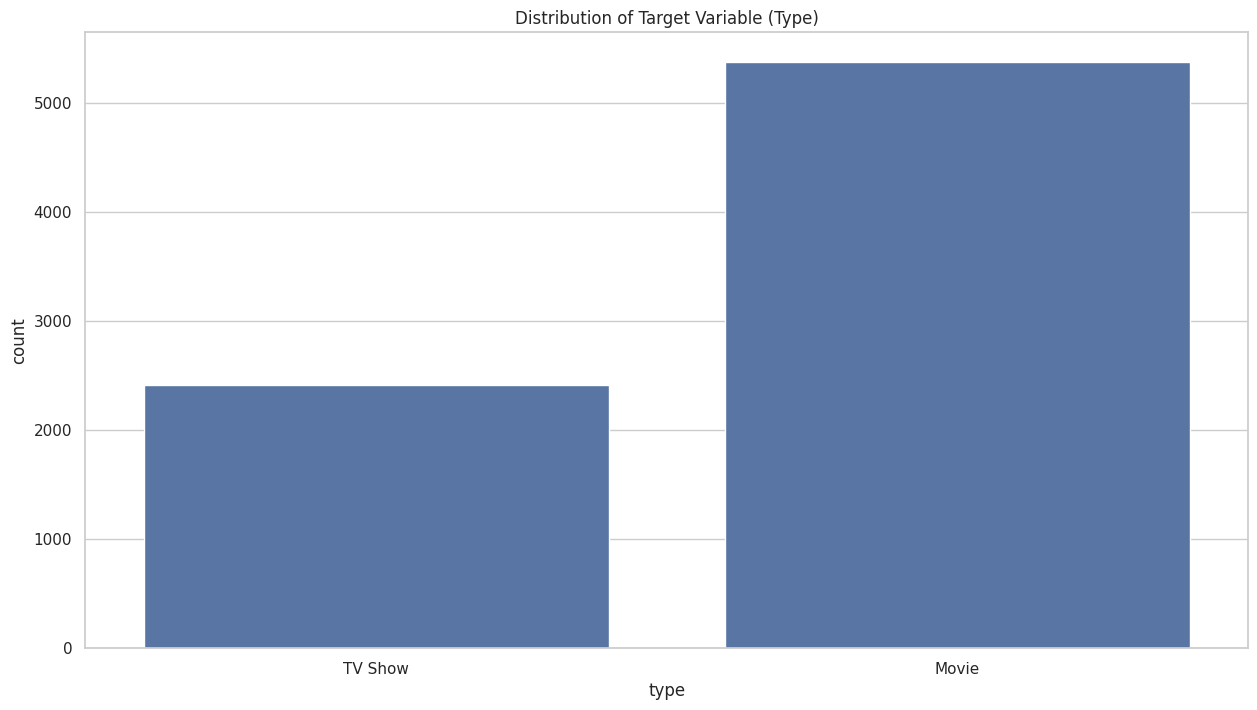

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [ ]:
sns.countplot(x='type', data=data_new)
plt.title('Distribution of Target Variable (Type)')
plt.show()

print(data_new['type'].value_counts())

Relationship between Title Length and Type

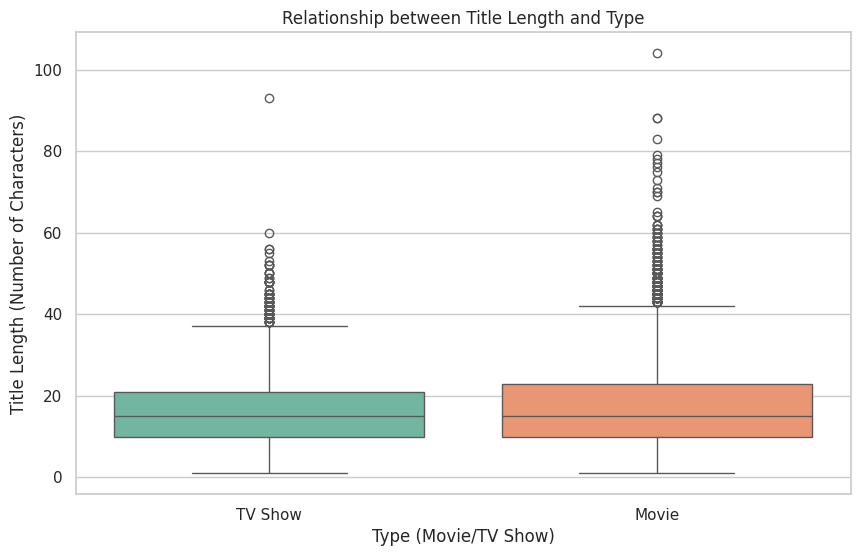

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the length of each title
data_new['title_length'] = data_new['title'].apply(len)

# Box plot to examine the relationship between title length and type (Movie/TV Show)
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='title_length', data=data_new, palette='Set2')
plt.title('Relationship between Title Length and Type')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Title Length (Number of Characters)')
plt.show()


Average Title Length by Type (Movie/TV Show)

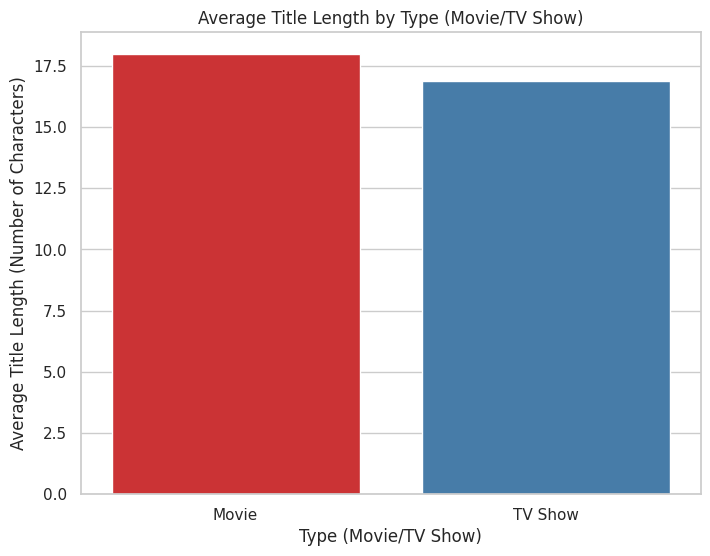

In [ ]:
# Bar plot for average title length per type (Movie/TV Show)
plt.figure(figsize=(8, 6))

# Calculate the average title length for each type
avg_title_length = data_new.groupby('type')['title_length'].mean().reset_index()

sns.barplot(x='type', y='title_length', data=avg_title_length, palette='Set1')
plt.title('Average Title Length by Type (Movie/TV Show)')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Average Title Length (Number of Characters)')
plt.show()


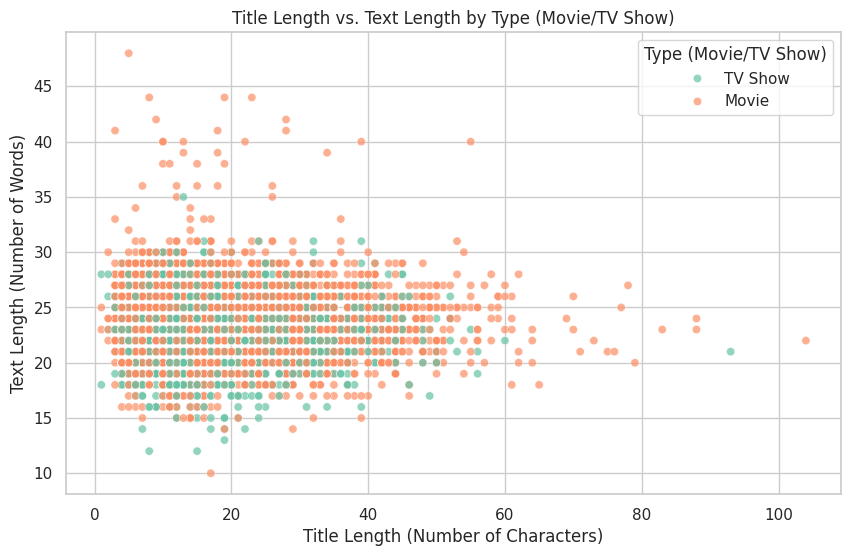

In [ ]:
# Scatter plot for title length vs. release year colored by type (Movie/TV Show)
plt.figure(figsize=(10, 6))

# Ensure title_length is calculated; if not already present in the dataset, we can calculate it
data_new['title_length'] = data_new['title'].apply(len)

# We can use the duration column for text length if 'text_length' is not defined
data_new['text_length'] = data_new['description'].apply(lambda x: len(str(x).split()))  # Assuming description holds the text

# Scatter plot
sns.scatterplot(x='title_length', y='text_length', hue='type', data=data_new, palette='Set2', alpha=0.7)
plt.title('Title Length vs. Text Length by Type (Movie/TV Show)')
plt.xlabel('Title Length (Number of Characters)')
plt.ylabel('Text Length (Number of Words)')
plt.legend(title='Type (Movie/TV Show)')
plt.show()


**Hybrid Feature Extraction**

# **TF-IDF Extraction**

TFIDF DataFrame shape: (7787, 5000)


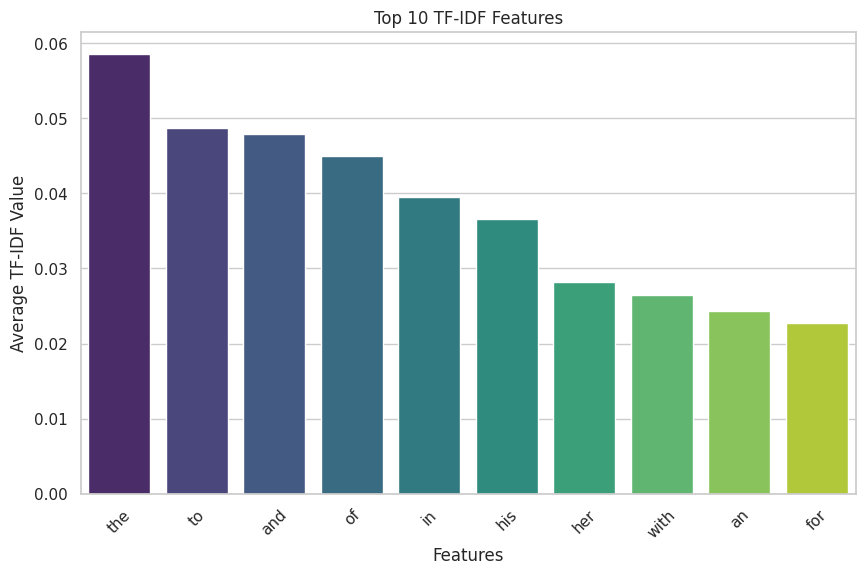

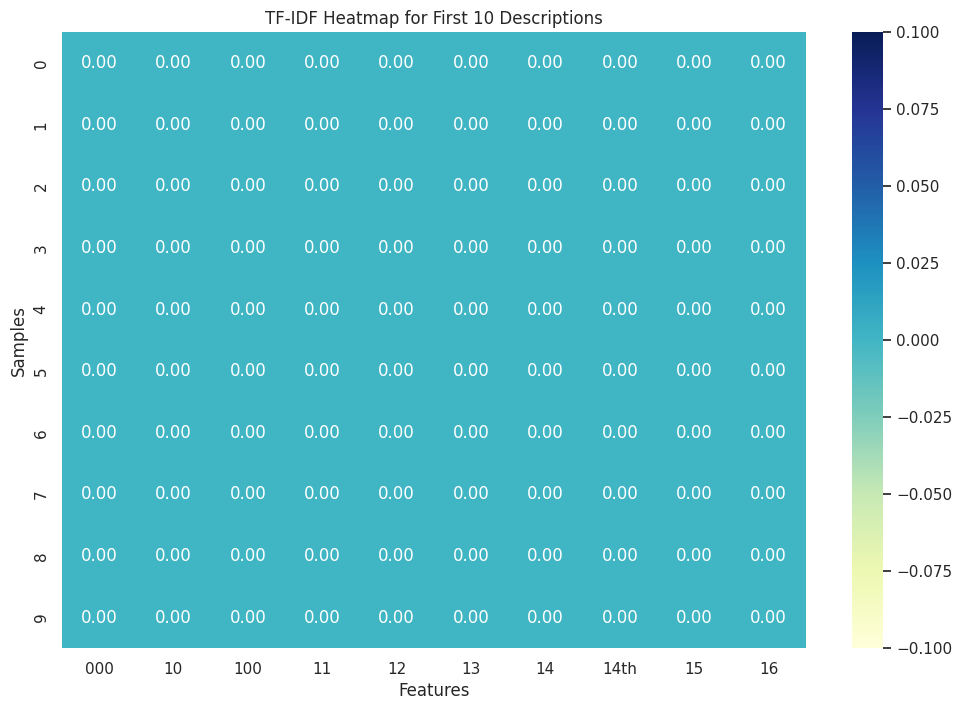

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data_new' is your dataset
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
tfidf_features = tfidf_vectorizer.fit_transform(data_new['description'])

# Convert to DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF features
print(f'TFIDF DataFrame shape: {tfidf_df.shape}')

# Visualize the distribution of TF-IDF values for the top 10 features
top_features = tfidf_df.mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features.values, palette='viridis')
plt.title('Top 10 TF-IDF Features')
plt.xlabel('Features')
plt.ylabel('Average TF-IDF Value')
plt.xticks(rotation=45)
plt.show()

# Visualizing the heatmap of the first 10 rows of the TF-IDF DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.iloc[:10, :10], annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('TF-IDF Heatmap for First 10 Descriptions')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


# **N**-grams

N-grams DataFrame shape: (7787, 5000)


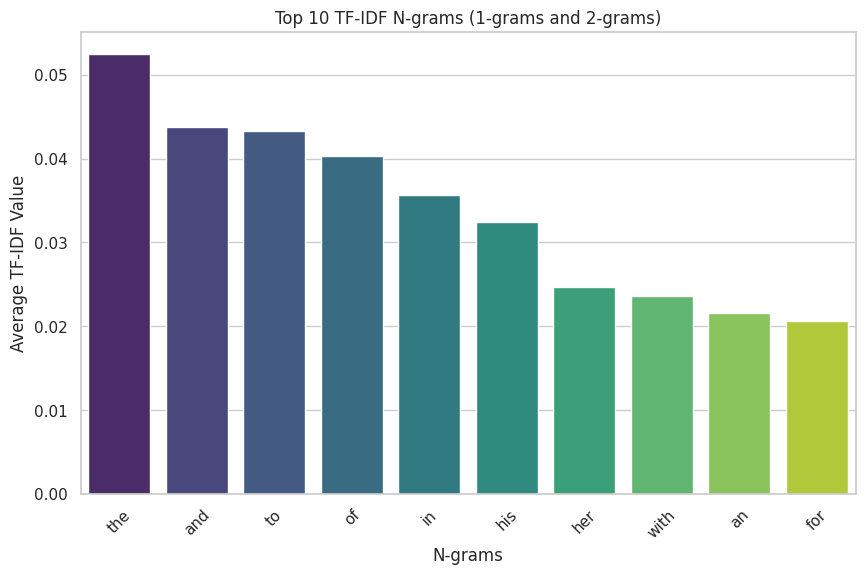

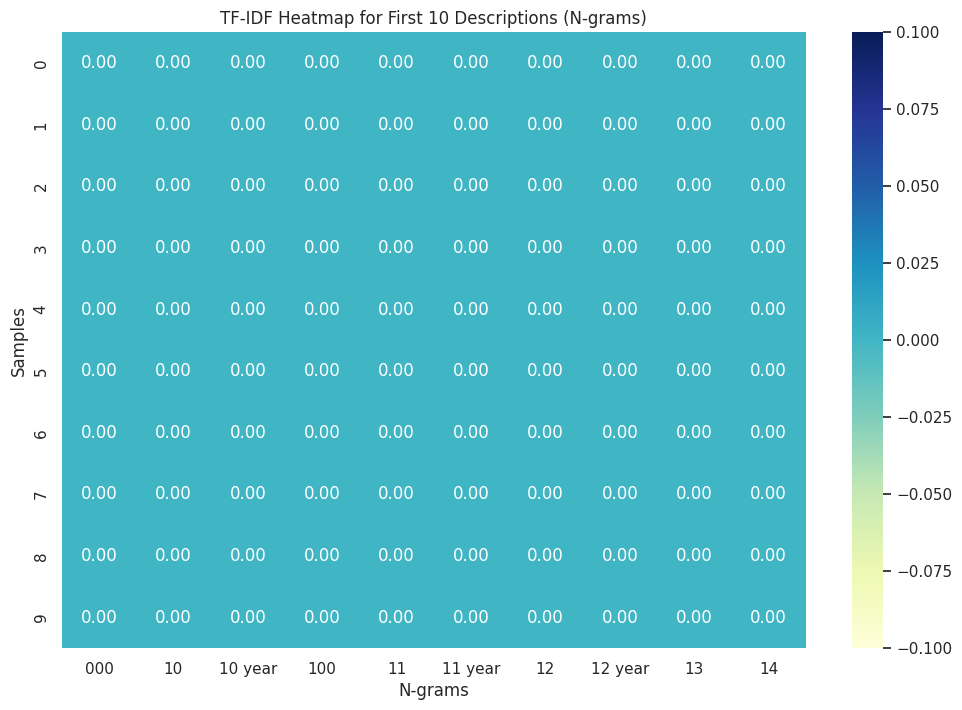

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data_new' is your dataset
# Initialize a Word N-grams (2-grams) vectorizer
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Word-level N-grams
ngram_features = ngram_vectorizer.fit_transform(data_new['description'])

# Convert to DataFrame
ngram_df = pd.DataFrame(ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Display the shape of the N-grams DataFrame
print(f'N-grams DataFrame shape: {ngram_df.shape}')

# Visualizing the distribution of TF-IDF values for the top 10 N-grams
top_ngrams = ngram_df.mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ngrams.index, y=top_ngrams.values, palette='viridis')
plt.title('Top 10 TF-IDF N-grams (1-grams and 2-grams)')
plt.xlabel('N-grams')
plt.ylabel('Average TF-IDF Value')
plt.xticks(rotation=45)
plt.show()

# Visualizing the heatmap of the first 10 rows of the N-grams DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ngram_df.iloc[:10, :10], annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('TF-IDF Heatmap for First 10 Descriptions (N-grams)')
plt.xlabel('N-grams')
plt.ylabel('Samples')
plt.show()


# **Analysing the features**

Number of unique titles: 7787

Top 10 most frequent titles:
 title
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
Ricardo O'Farrill: Abrazo navideño          1
Ricardo O'Farrill Abrazo Genial             1
Rica, Famosa, Latina                        1
Rhythm + Flow                               1
Rhys Nicholson Live at the Athenaeum        1
Name: count, dtype: int64


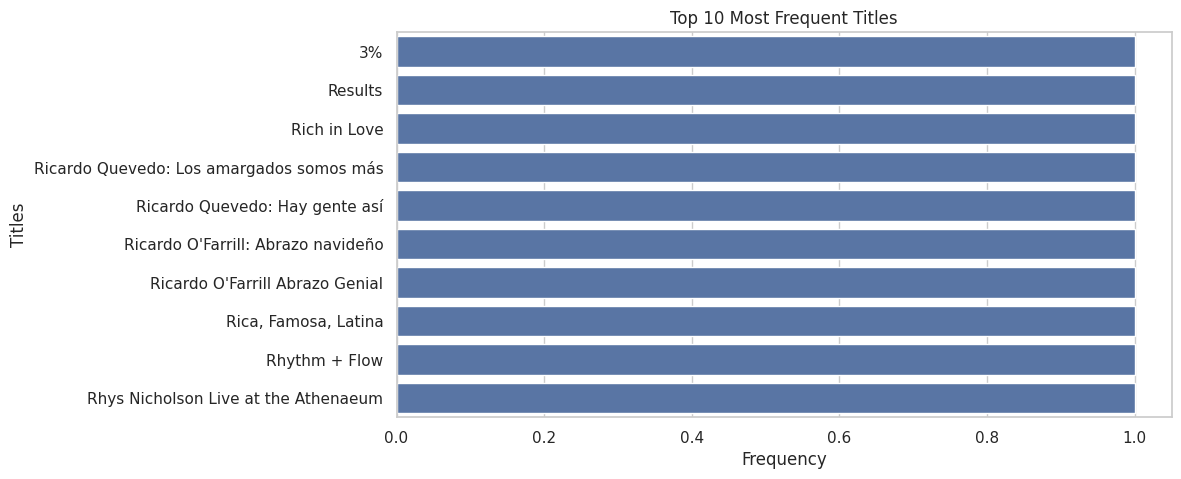

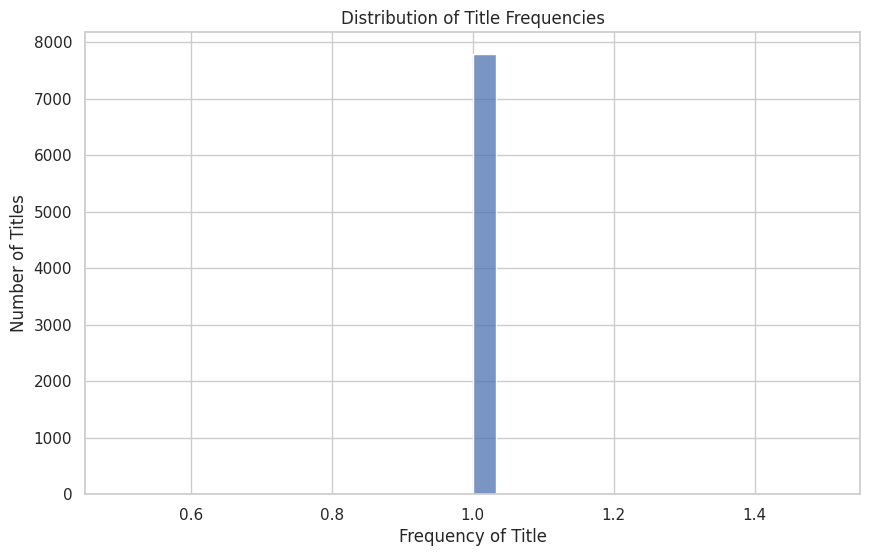

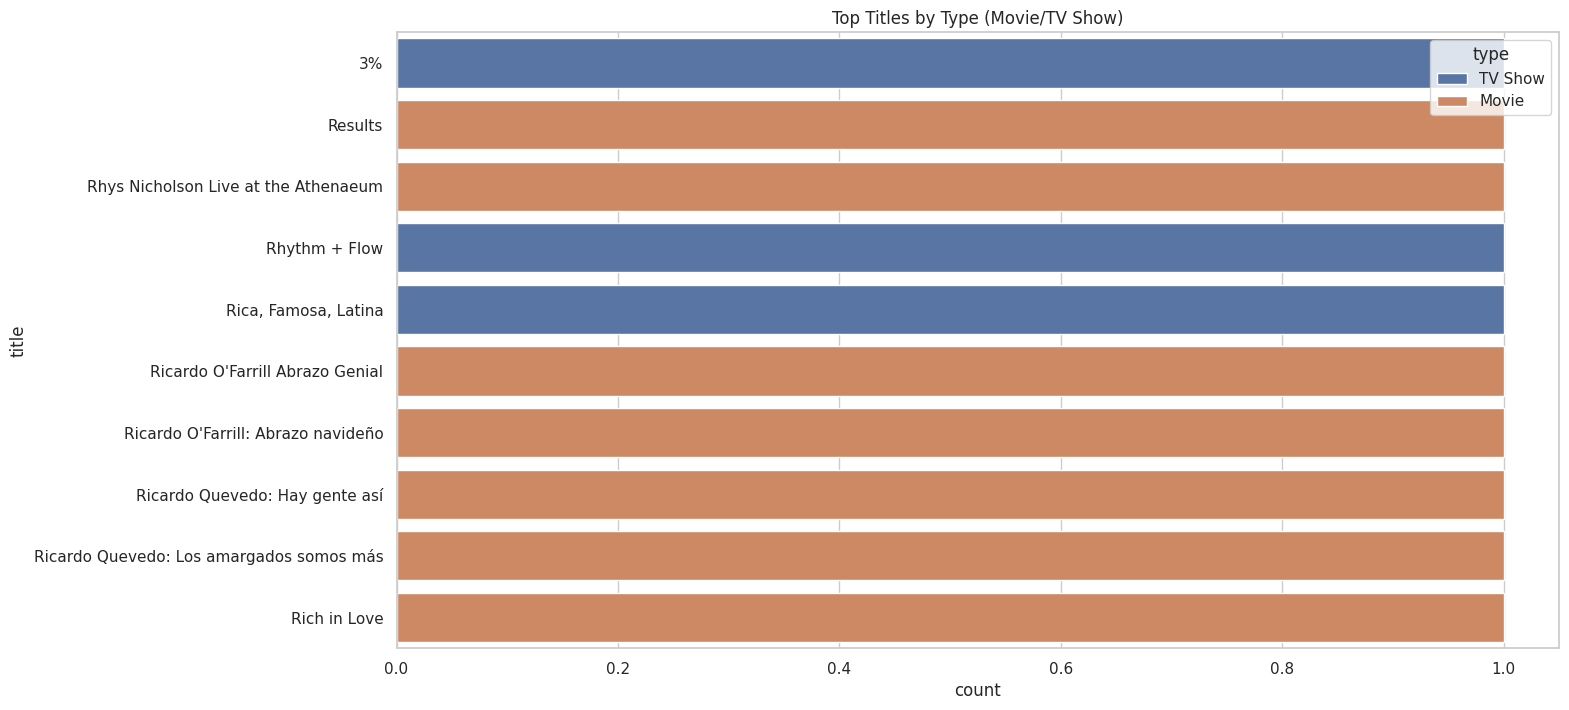


Title Length Statistics:
 count    7787.000000
mean       17.630666
std        10.637995
min         1.000000
25%        10.000000
50%        15.000000
75%        23.000000
max       104.000000
Name: title_length, dtype: float64


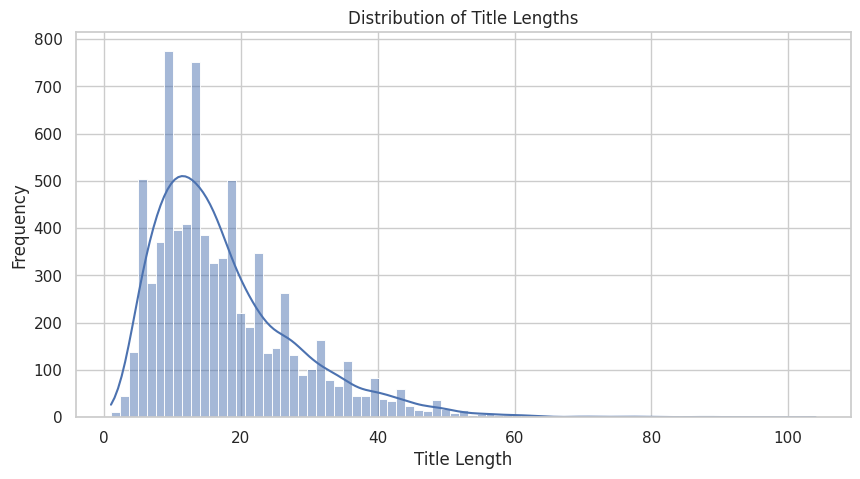

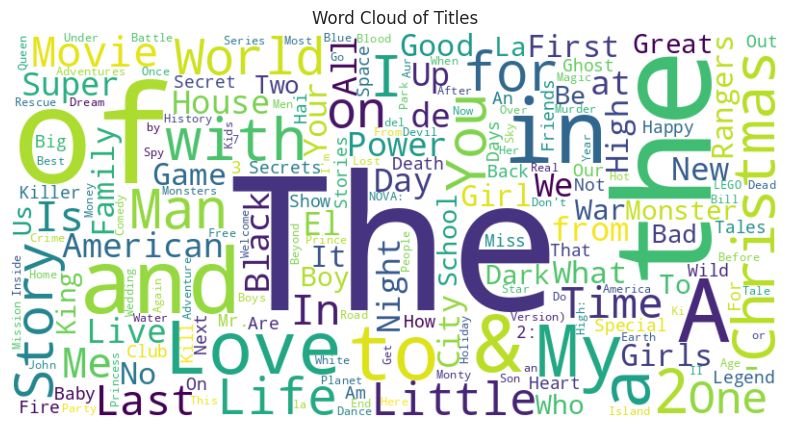


Top 10 most common words in titles:
 [('The', 1340), ('of', 597), ('the', 583), ('A', 196), ('and', 195), ('in', 192), ('&', 153), ('to', 143), ('Love', 132), ('My', 127)]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
data_new = pd.read_csv('/content/netflix IDP.csv')
unique_titles_count = data_new['title'].nunique()
print(f"Number of unique titles: {unique_titles_count}")


top_titles = data_new['title'].value_counts().head(10)
print("\nTop 10 most frequent titles:\n", top_titles)

plt.figure(figsize=(10,5))
sns.barplot(x=top_titles.values, y=top_titles.index)
plt.title('Top 10 Most Frequent Titles')
plt.xlabel('Frequency')
plt.ylabel('Titles')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data_new['title'].value_counts(), kde=False, bins=30)
plt.title('Distribution of Title Frequencies')
plt.xlabel('Frequency of Title')
plt.ylabel('Number of Titles')
plt.show()

top_title_types = data_new[data_new['title'].isin(top_titles.index)]
sns.countplot(y='title', hue='type', data=top_title_types)
plt.title('Top Titles by Type (Movie/TV Show)')
plt.show()


data_new['title_length'] = data_new['title'].apply(len)

print("\nTitle Length Statistics:\n", data_new['title_length'].describe())

plt.figure(figsize=(10,5))
sns.histplot(data_new['title_length'], kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

words = ' '.join(data_new['title']).split()
word_freq = Counter(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

print("\nTop 10 most common words in titles:\n", word_freq.most_common(10))

**Analysing the 'title' feature**

Number of unique titles: 7787

Top 10 most frequent titles:
 title
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
Ricardo O'Farrill: Abrazo navideño          1
Ricardo O'Farrill Abrazo Genial             1
Rica, Famosa, Latina                        1
Rhythm + Flow                               1
Rhys Nicholson Live at the Athenaeum        1
Name: count, dtype: int64


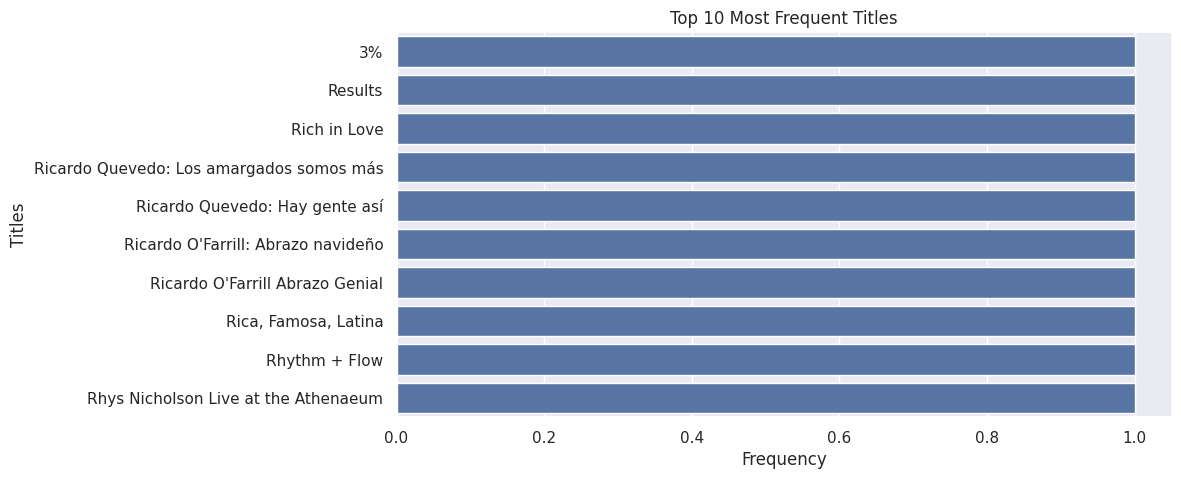

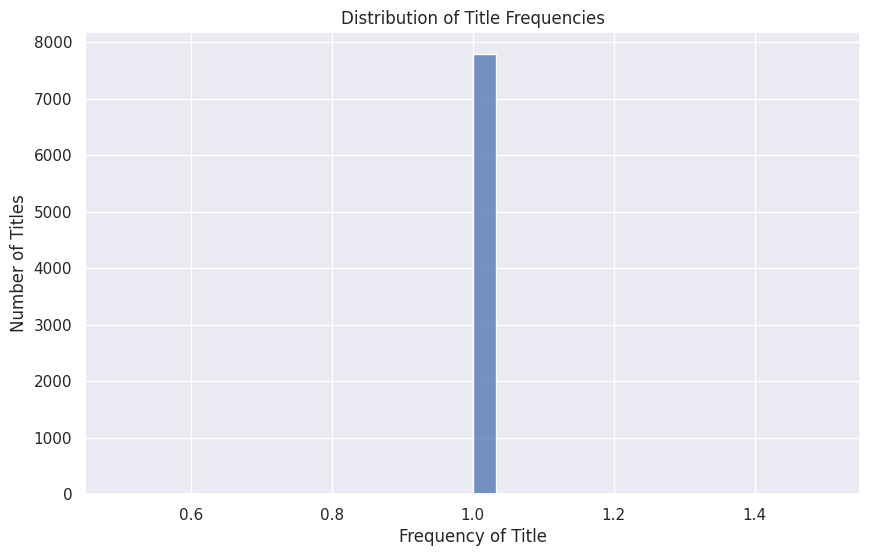

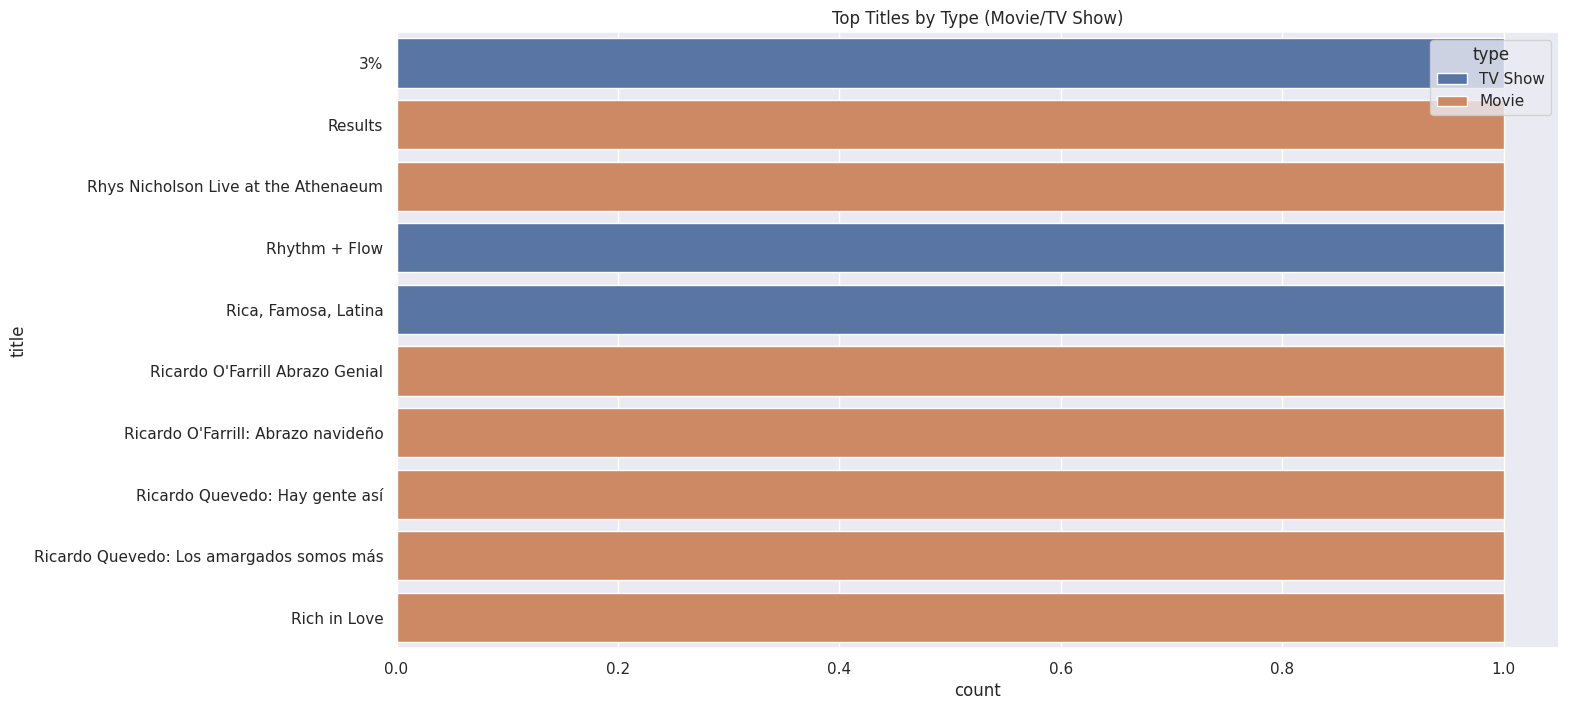


Title Length Statistics:
 count    7787.000000
mean       17.630666
std        10.637995
min         1.000000
25%        10.000000
50%        15.000000
75%        23.000000
max       104.000000
Name: title_length, dtype: float64


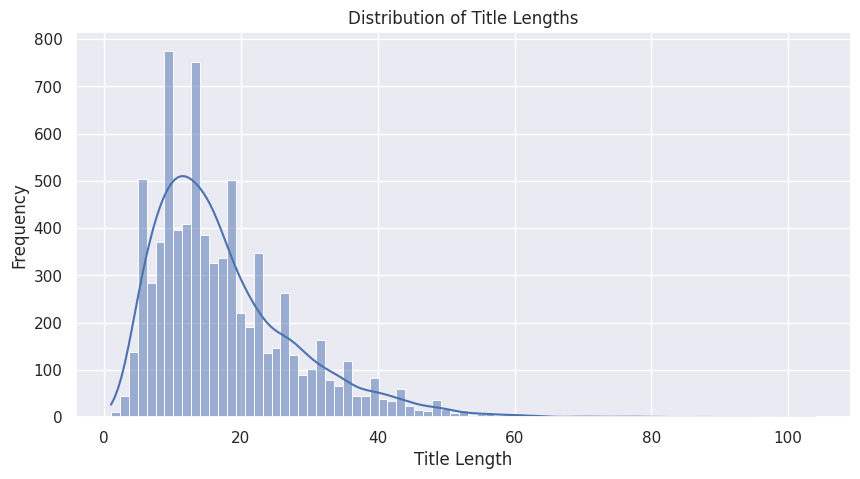

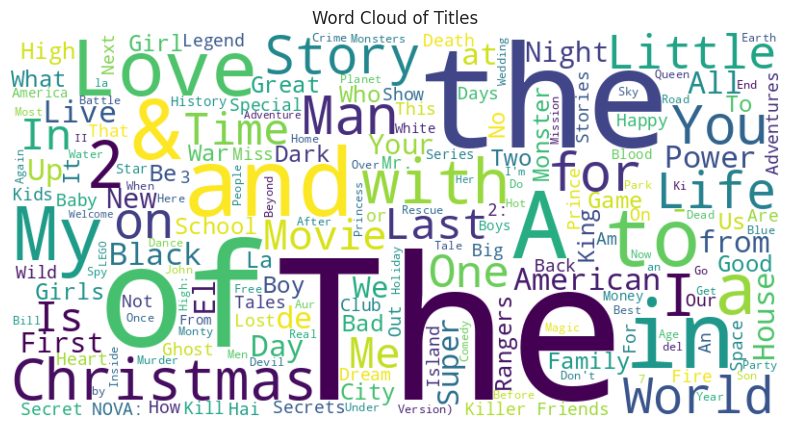


Top 10 most common words in titles:
 [('The', 1340), ('of', 597), ('the', 583), ('A', 196), ('and', 195), ('in', 192), ('&', 153), ('to', 143), ('Love', 132), ('My', 127)]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

unique_titles_count = data_new['title'].nunique()
print(f"Number of unique titles: {unique_titles_count}")


top_titles = data_new['title'].value_counts().head(10)
print("\nTop 10 most frequent titles:\n", top_titles)

plt.figure(figsize=(10,5))
sns.barplot(x=top_titles.values, y=top_titles.index)
plt.title('Top 10 Most Frequent Titles')
plt.xlabel('Frequency')
plt.ylabel('Titles')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data_new['title'].value_counts(), kde=False, bins=30)
plt.title('Distribution of Title Frequencies')
plt.xlabel('Frequency of Title')
plt.ylabel('Number of Titles')
plt.show()

top_title_types = data_new[data_new['title'].isin(top_titles.index)]
sns.countplot(y='title', hue='type', data=top_title_types)
plt.title('Top Titles by Type (Movie/TV Show)')
plt.show()


data_new['title_length'] = data_new['title'].apply(len)

print("\nTitle Length Statistics:\n", data_new['title_length'].describe())

plt.figure(figsize=(10,5))
sns.histplot(data_new['title_length'], kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

words = ' '.join(data_new['title']).split()
word_freq = Counter(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

print("\nTop 10 most common words in titles:\n", word_freq.most_common(10))

**Analysing the 'Directors' feature**

Number of unique directors: 4049

Top 10 most frequent directors:
 director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: count, dtype: int64


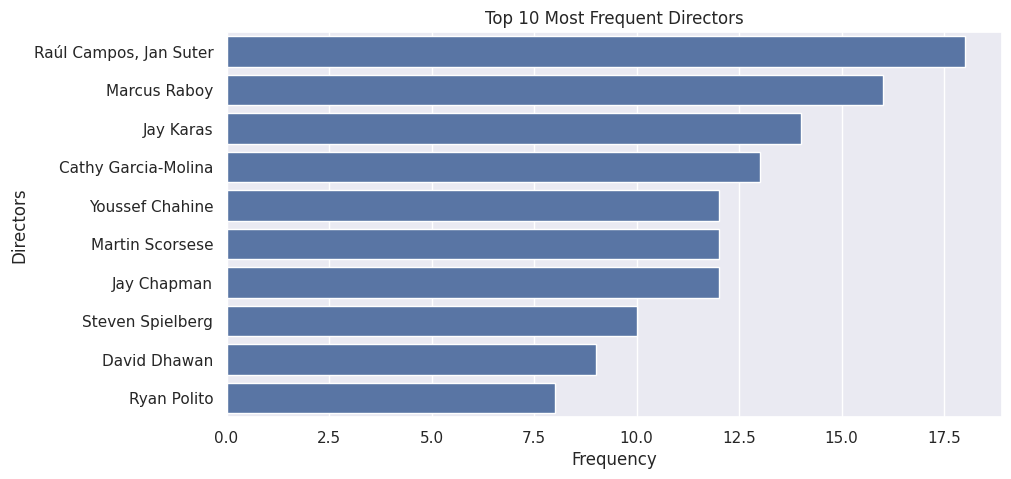

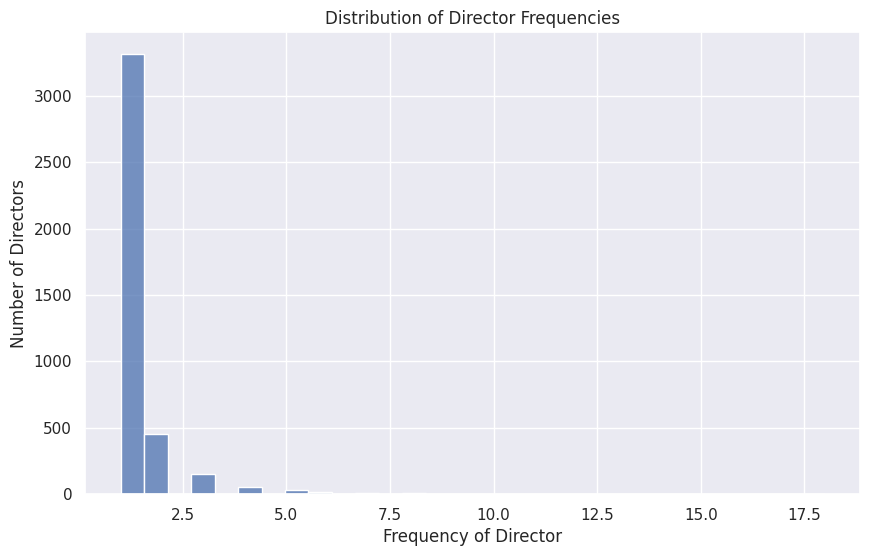

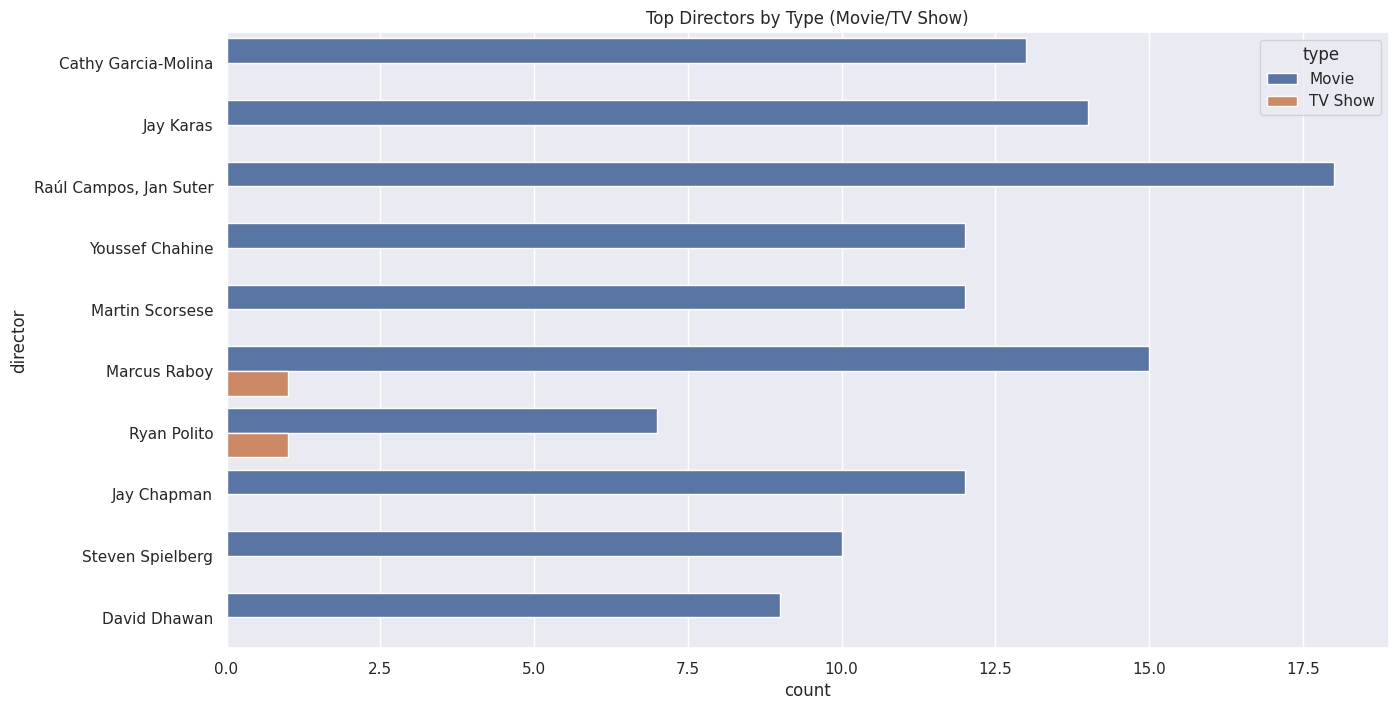

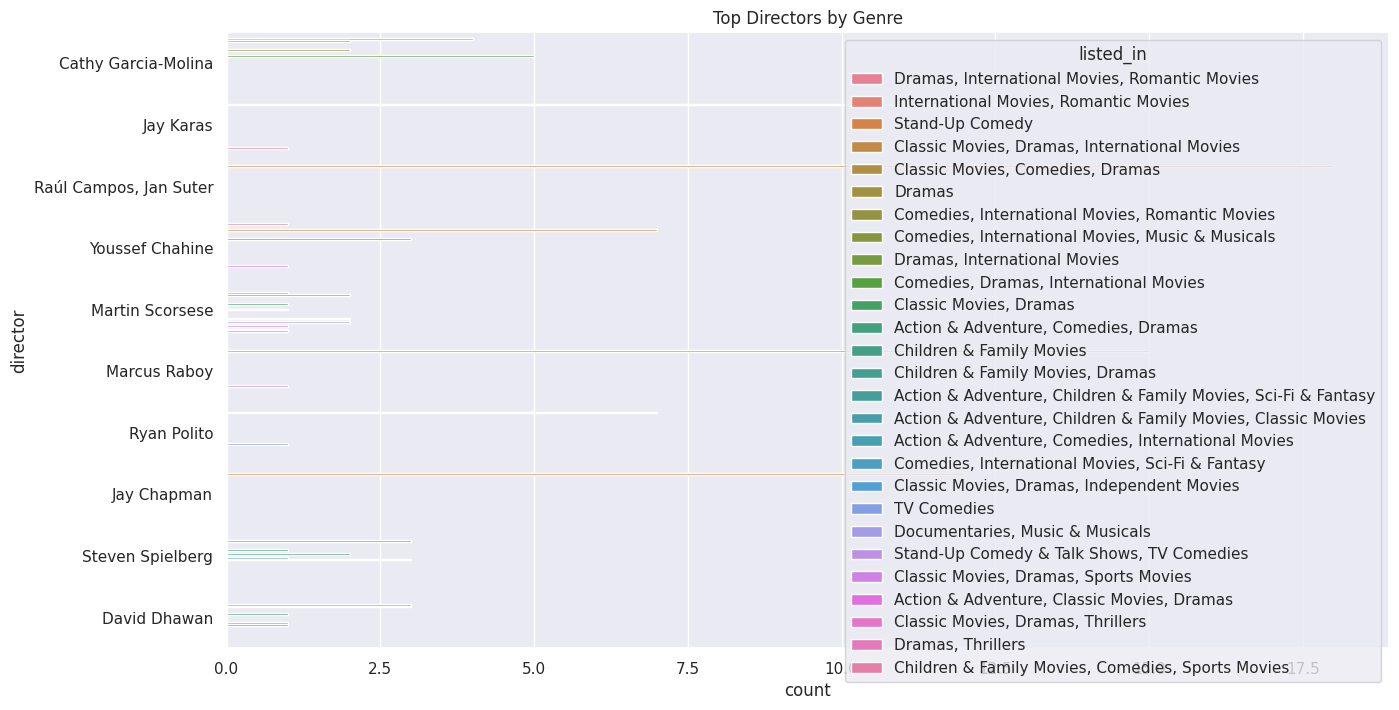

Number of entries without a director: 2389
Percentage of entries without a director: 30.68%

Number of Movies and TV Shows directed by each director:
 type                            Movie  TV Show
director                                      
A. L. Vijay                       2.0      0.0
A. Raajdheep                      1.0      0.0
A. Salaam                         1.0      0.0
A.R. Murugadoss                   2.0      0.0
Aadish Keluskar                   1.0      0.0
Aamir Bashir                      1.0      0.0
Aamir Khan                        1.0      0.0
Aanand Rai                        2.0      0.0
Aaron Burns                       1.0      0.0
Aaron Hancox, Michael McNamara    1.0      0.0


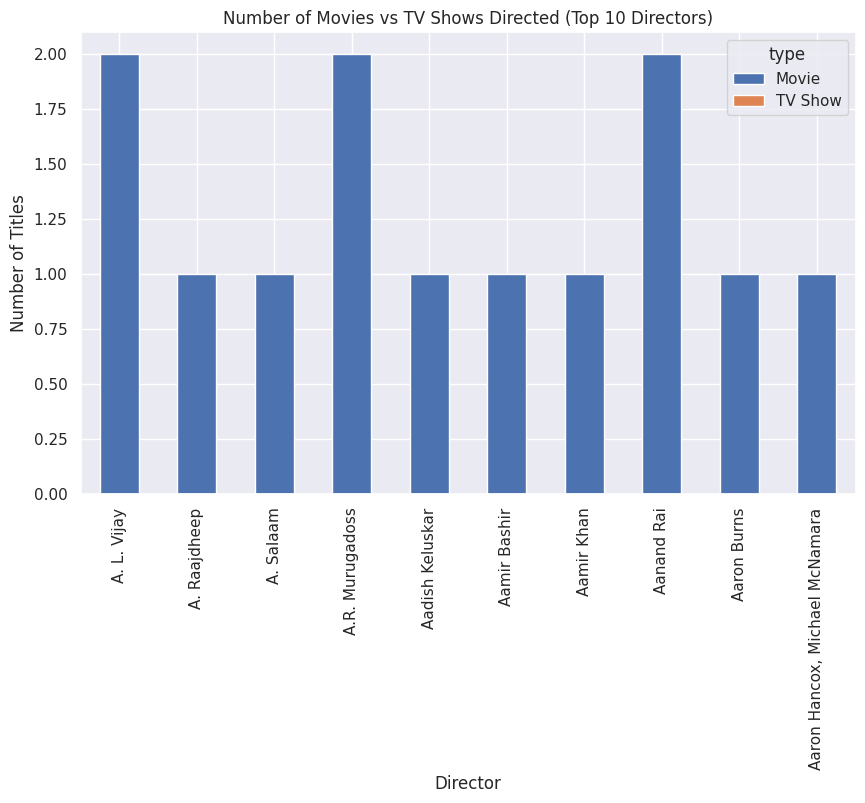

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unique_directors_count = data_new['director'].nunique()
print(f"Number of unique directors: {unique_directors_count}")

top_directors = data_new['director'].value_counts().head(10)
print("\nTop 10 most frequent directors:\n", top_directors)


plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Frequency')
plt.ylabel('Directors')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data_new['director'].value_counts(), kde=False, bins=30)
plt.title('Distribution of Director Frequencies')
plt.xlabel('Frequency of Director')
plt.ylabel('Number of Directors')
plt.show()

top_director_types = data_new[data_new['director'].isin(top_directors.index)]
sns.countplot(y='director', hue='type', data=top_director_types)
plt.title('Top Directors by Type (Movie/TV Show)')
plt.show()

top_director_genres = data_new[data_new['director'].isin(top_directors.index)]
sns.countplot(y='director', hue='listed_in', data=top_director_genres)
plt.title('Top Directors by Genre')
plt.show()

missing_directors = data_new['director'].isnull().sum()
print(f"Number of entries without a director: {missing_directors}")

missing_percentage = (missing_directors / len(data_new)) * 100
print(f"Percentage of entries without a director: {missing_percentage:.2f}%")


director_title_type = data_new.groupby(['director', 'type']).size().unstack().fillna(0)
print("\nNumber of Movies and TV Shows directed by each director:\n", director_title_type.head(10))

director_title_type.head(10).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Number of Movies vs TV Shows Directed (Top 10 Directors)')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.show()

**Analysing the 'Cast' feature**

Number of entries without cast data: 718
Percentage of entries without cast data: 9.22%
Number of unique actors: 32881

Top 10 most frequent actors:
 Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
Takahiro Sakurai    29
Amitabh Bachchan    27
Paresh Rawal        27
Yuki Kaji           27
Boman Irani         27
Name: count, dtype: int64


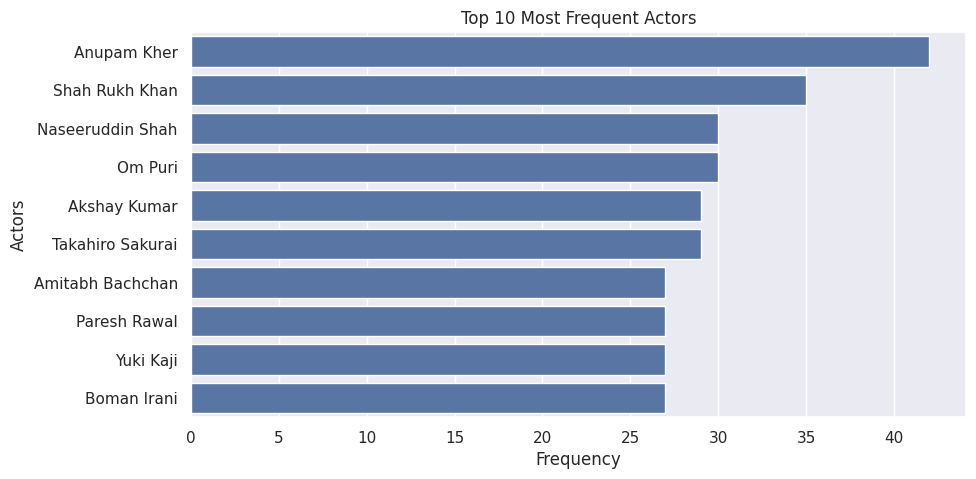

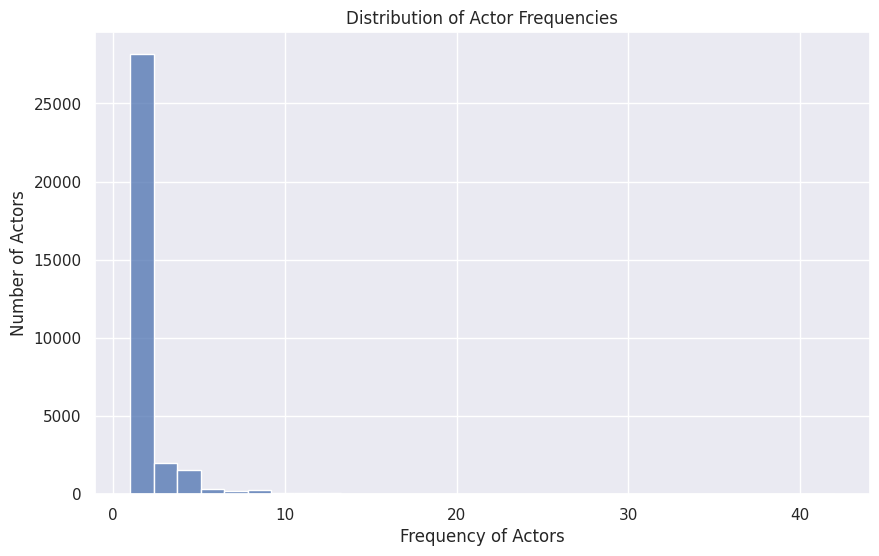

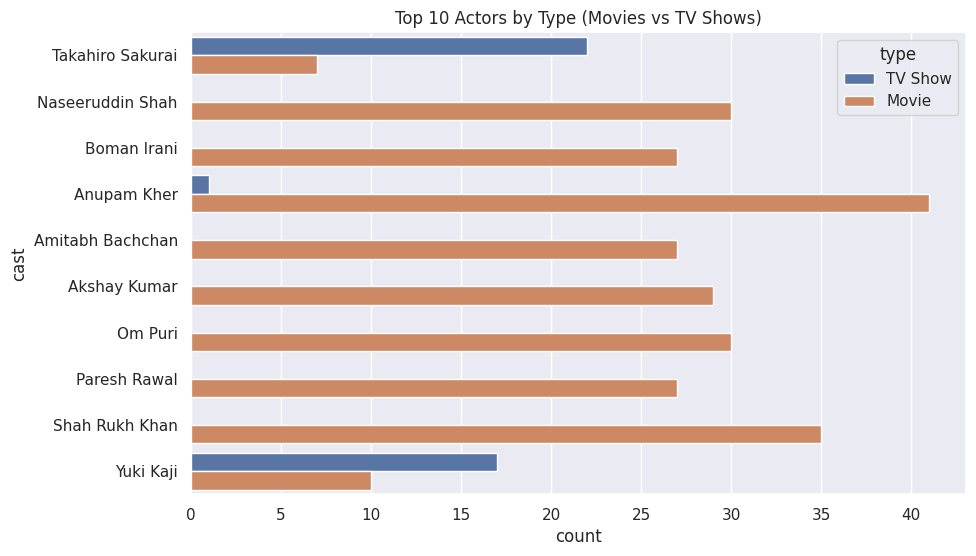


Top 10 most frequent actor pairs:
 [(('Michela Luci', 'Jamie Watson'), 13), (('Michela Luci', 'Eric Peterson'), 13), (('Jamie Watson', 'Eric Peterson'), 13), (('Eric Idle', 'Michael Palin'), 13), (('Terry Jones', 'Michael Palin'), 13), (('Michela Luci', 'Anna Claire Bartlam'), 12), (('Jamie Watson', 'Anna Claire Bartlam'), 12), (('John Cleese', 'Terry Jones'), 12), (('John Cleese', 'Michael Palin'), 12), (('Eric Idle', 'Terry Jones'), 12)]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations


missing_cast = data_new['cast'].isnull().sum()
print(f"Number of entries without cast data: {missing_cast}")

missing_cast_percentage = (missing_cast / len(data_new)) * 100
print(f"Percentage of entries without cast data: {missing_cast_percentage:.2f}%")

cast_list = data_new['cast'].dropna().apply(lambda x: x.split(', '))
unique_actors = pd.Series([actor for sublist in cast_list for actor in sublist]).nunique()
print(f"Number of unique actors: {unique_actors}")

actor_counts = pd.Series([actor for sublist in cast_list for actor in sublist]).value_counts()

print("\nTop 10 most frequent actors:\n", actor_counts.head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=actor_counts.head(10).values, y=actor_counts.head(10).index)
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Frequency')
plt.ylabel('Actors')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(actor_counts, kde=False, bins=30)
plt.title('Distribution of Actor Frequencies')
plt.xlabel('Frequency of Actors')
plt.ylabel('Number of Actors')
plt.show()

exploded_cast = data_new[['cast', 'type']].dropna()
exploded_cast['cast'] = exploded_cast['cast'].apply(lambda x: x.split(', '))
exploded_cast = exploded_cast.explode('cast')

plt.figure(figsize=(10,6))
sns.countplot(y='cast', hue='type', data=exploded_cast[exploded_cast['cast'].isin(actor_counts.head(10).index)])
plt.title('Top 10 Actors by Type (Movies vs TV Shows)')
plt.show()

actor_pairs = cast_list.apply(lambda x: list(combinations(x, 2)))

pair_counts = Counter([pair for sublist in actor_pairs for pair in sublist])

print("\nTop 10 most frequent actor pairs:\n", pair_counts.most_common(10))

**Analysing the 'Country' feature**

Number of entries without country data: 507
Percentage of entries without country data: 6.51%
Number of unique countries: 681

Top 10 most frequent countries:
 country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64


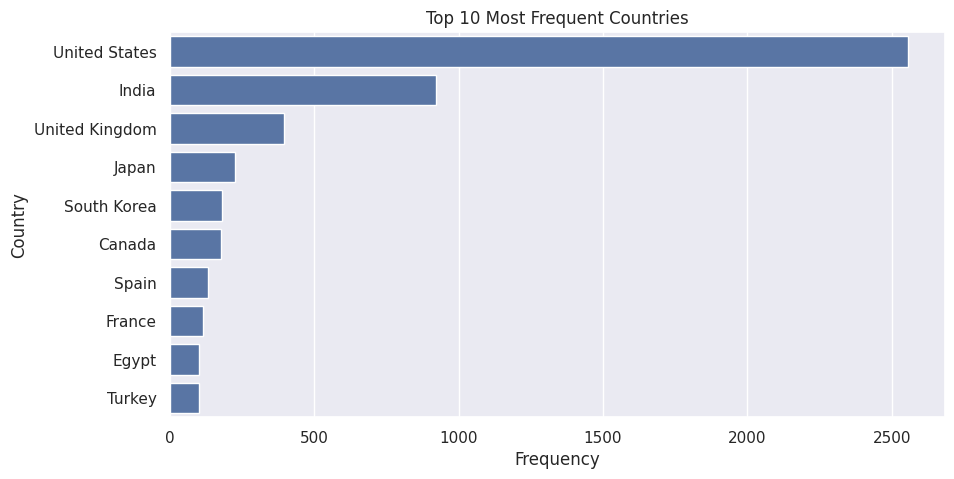

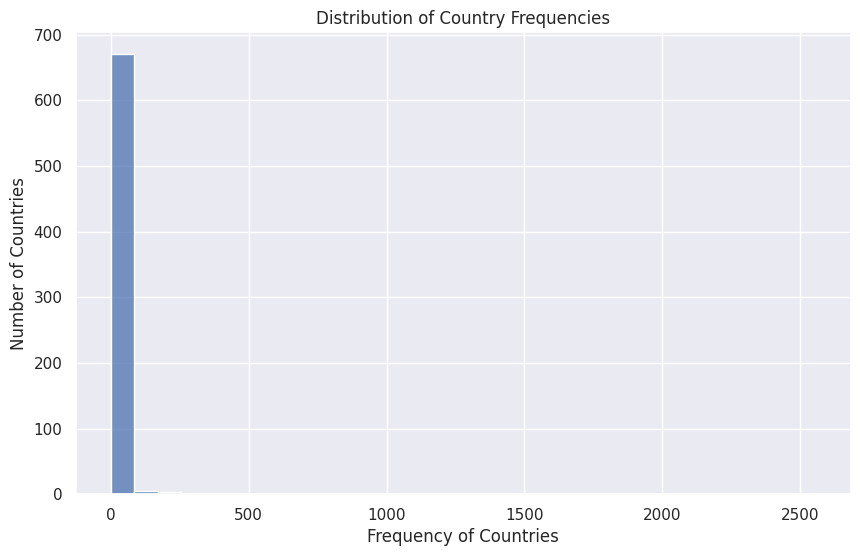

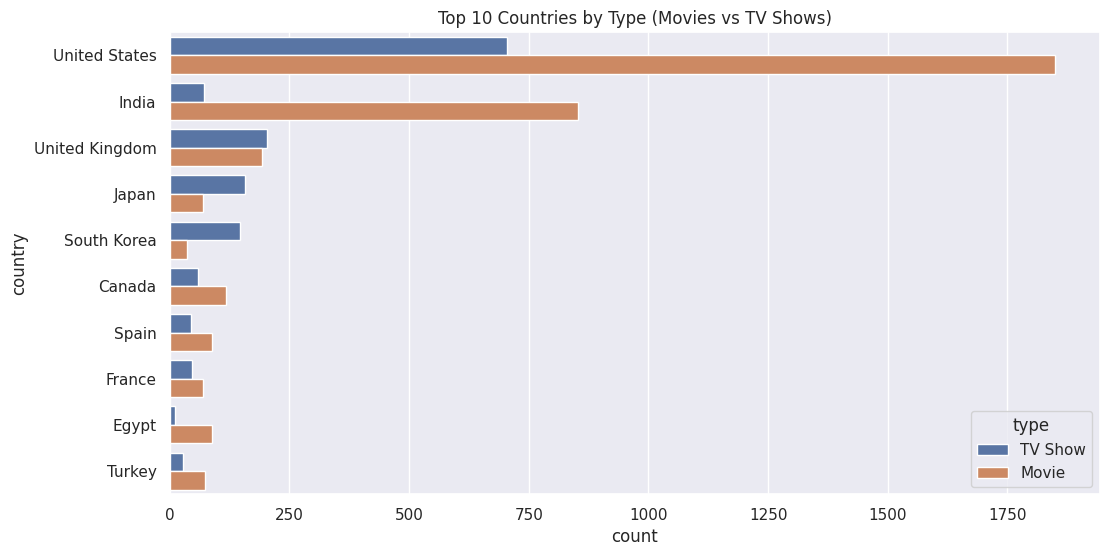


Top 10 most frequent individual countries:
 United States     3296
India              990
United Kingdom     722
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64


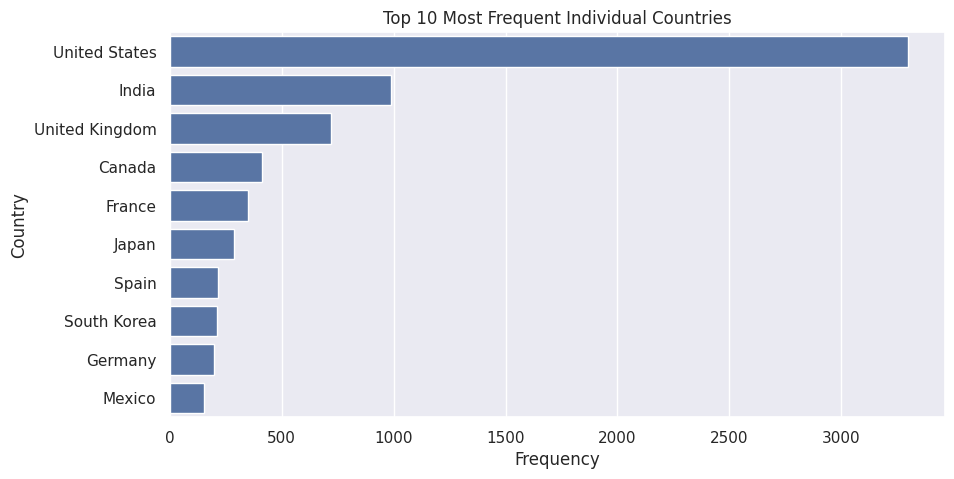

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

missing_country = data_new['country'].isnull().sum()
print(f"Number of entries without country data: {missing_country}")

missing_country_percentage = (missing_country / len(data_new)) * 100
print(f"Percentage of entries without country data: {missing_country_percentage:.2f}%")

unique_countries = data_new['country'].nunique()
print(f"Number of unique countries: {unique_countries}")

country_counts = data_new['country'].value_counts()

print("\nTop 10 most frequent countries:\n", country_counts.head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index)
plt.title('Top 10 Most Frequent Countries')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(country_counts, kde=False, bins=30)
plt.title('Distribution of Country Frequencies')
plt.xlabel('Frequency of Countries')
plt.ylabel('Number of Countries')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=data_new, order=data_new['country'].value_counts().index[:10])
plt.title('Top 10 Countries by Type (Movies vs TV Shows)')
plt.show()

country_list = data_new['country'].dropna().apply(lambda x: x.split(', '))
country_flat_list = pd.Series([country for sublist in country_list for country in sublist])

print("\nTop 10 most frequent individual countries:\n", country_flat_list.value_counts().head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=country_flat_list.value_counts().head(10).values, y=country_flat_list.value_counts().head(10).index)
plt.title('Top 10 Most Frequent Individual Countries')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

**Analysing the 'release year' feature**

Data type of 'release year': int64
Number of entries without release year data: 0
Percentage of entries without release year data: 0.00%


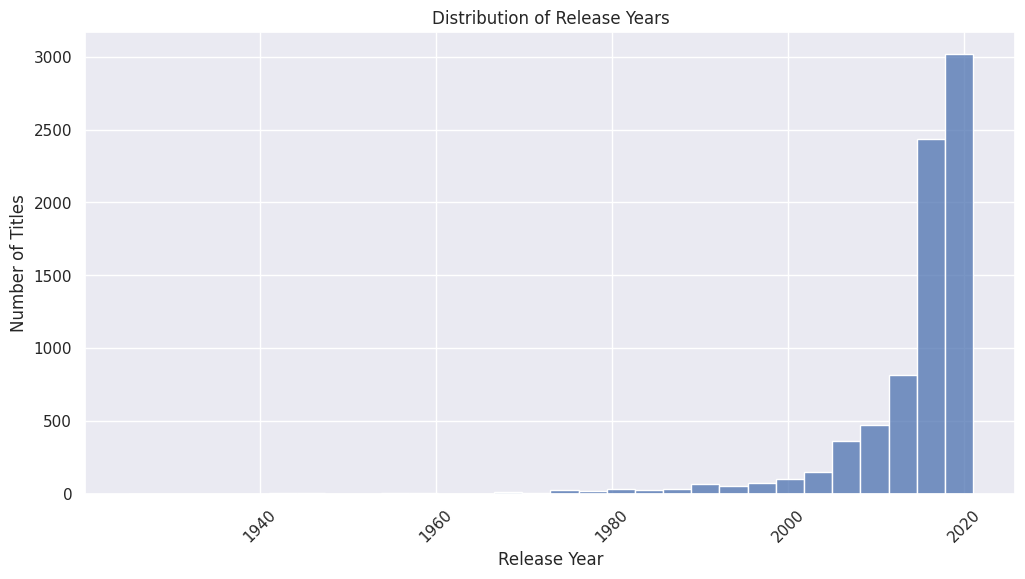


Top 10 most frequent release years:
 release_year
2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
Name: count, dtype: int64


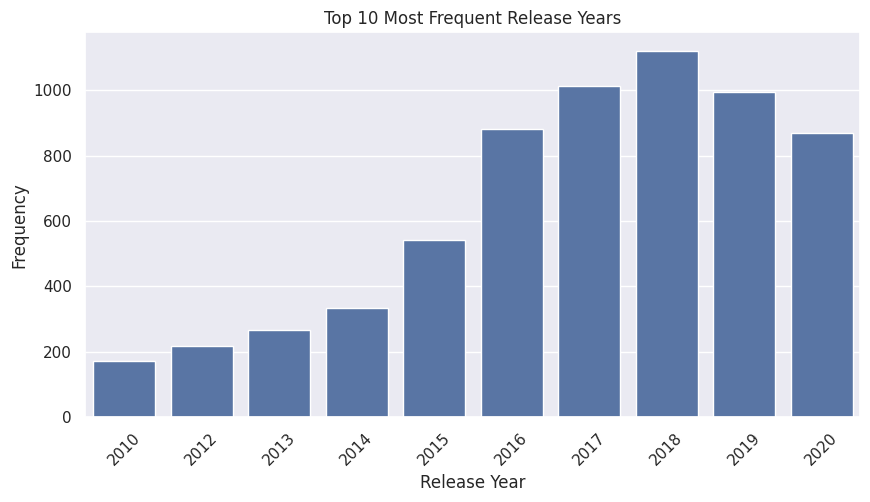

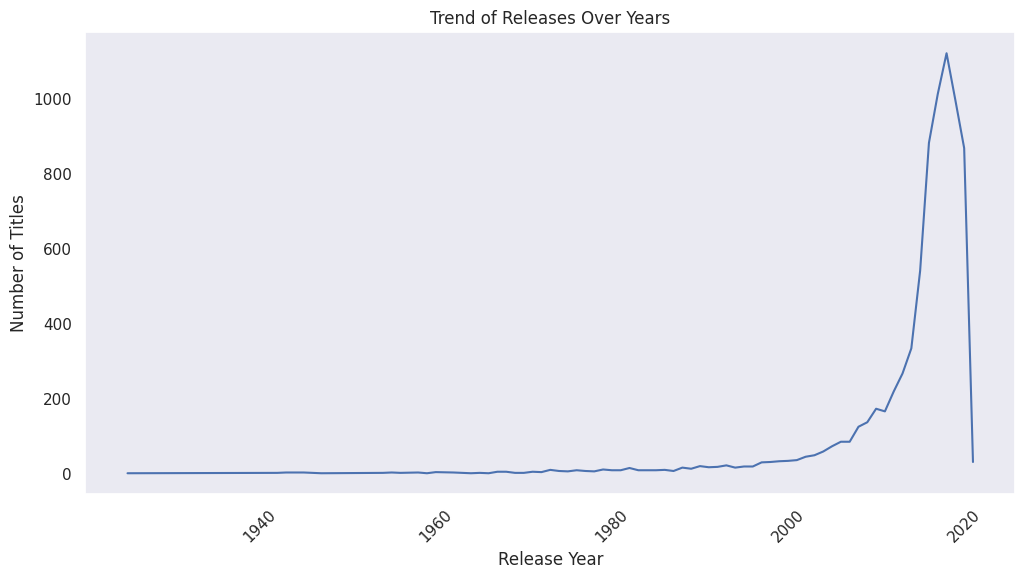

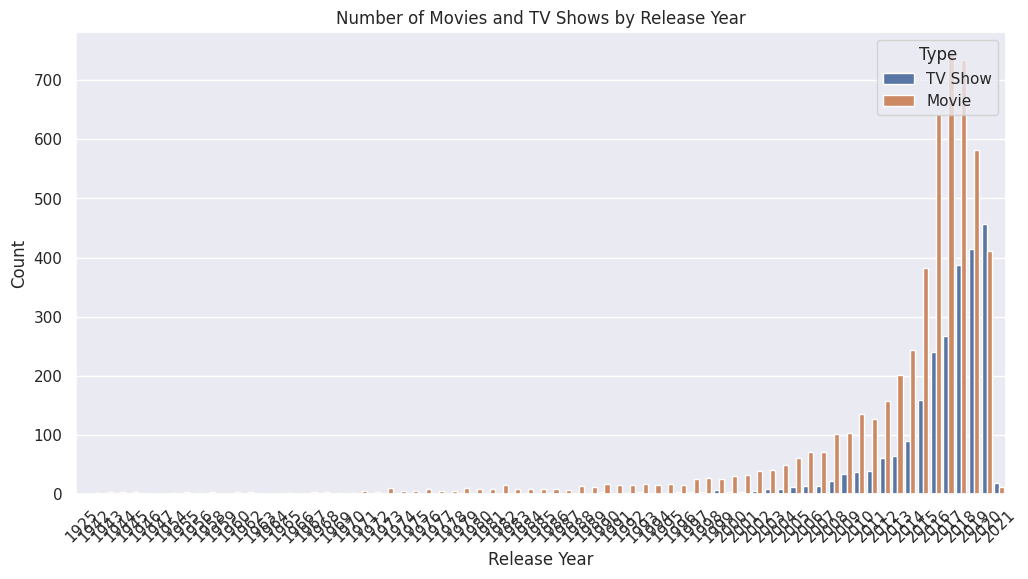

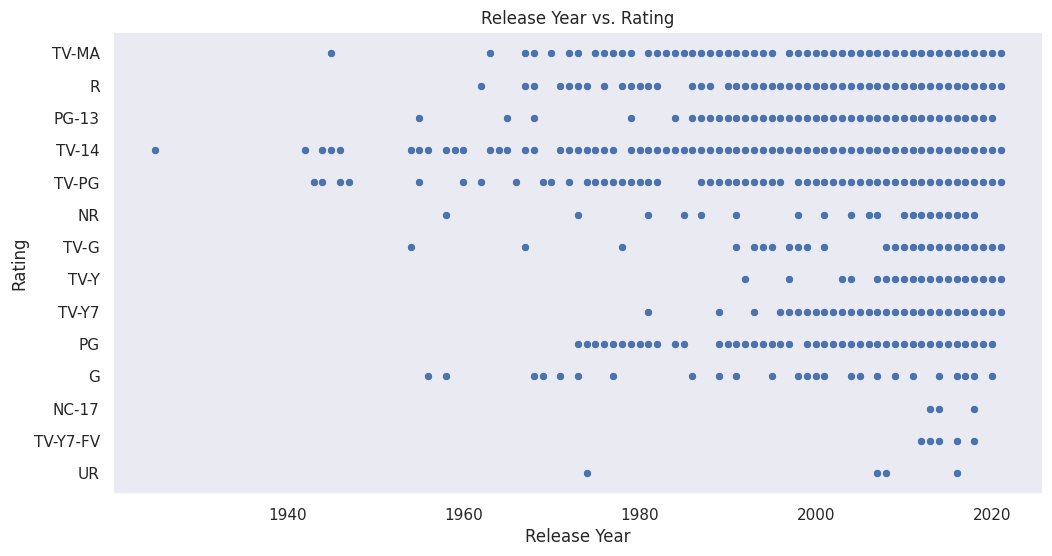

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Data type of 'release year': {data_new['release_year'].dtype}")
missing_year = data_new['release_year'].isnull().sum()
print(f"Number of entries without release year data: {missing_year}")
missing_year_percentage = (missing_year / len(data_new)) * 100
print(f"Percentage of entries without release year data: {missing_year_percentage:.2f}%")

plt.figure(figsize=(12, 6))
sns.histplot(data_new['release_year'], bins=30, kde=False)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

release_year_counts = data_new['release_year'].value_counts()
print("\nTop 10 most frequent release years:\n", release_year_counts.head(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=release_year_counts.head(10).index, y=release_year_counts.head(10).values)
plt.title('Top 10 Most Frequent Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

release_trends = data_new['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(release_trends.index, release_trends.values)
plt.title('Trend of Releases Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='type', data=data_new)
plt.title('Number of Movies and TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='rating', data=data_new)
plt.title('Release Year vs. Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.grid()
plt.show()

**Analysing the  'image_url'feature**

Number of missing image URLs: 779
Percentage of missing image URLs: 10.00%
Number of unique image URLs: 6281
Number of duplicate image URLs: 1506

Top 10 most frequent image URLs:
 image_url
-                       604
['Jeff Dunham']           5
['Vir Das']               4
['Jim Jefferies']         4
['Dave Chappelle']        4
['Bear Grylls']           3
["Chris D'Elia"]          3
['Tom Segura']            3
['Iliza Shlesinger']      3
['Bill Burr']             3
Name: count, dtype: int64


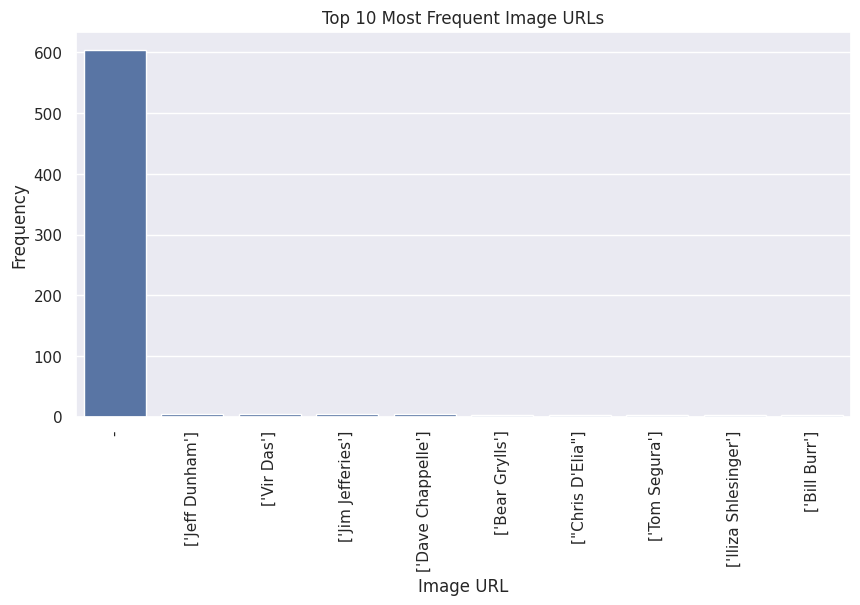


Displaying images from image_url feature:
Image URL: https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_FMjpg_UX1000_.jpg


Image URL: https://m.media-amazon.com/images/M/MV5BNGY0NzgzYzctYWQwMC00MzM2LThjNGMtZjFjMWUyNzg0ZmM0XkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_FMjpg_UX1000_.jpg


Image URL: ['Michael Douglas', 'Sarah Baker', 'Graham Rogers', 'Melissa Tang', 'Jenna Lyng Adams', 'Casey Thomas Brown', 'Alan Arkin', 'Nancy Travis', 'Lisa Edelstein', 'Emily Osment', 'Ashleigh LaThrop', 'Paul Reiser', 'Ramon Hilario', 'Susan Sullivan', 'Jane Seymour', 'Haley Joel Osment', 'Kathleen Turner', 'Cedric Begley']


Image URL: ['Jennifer Aniston', 'Courteney Cox', 'Lisa Kudrow', 'Matt LeBlanc', 'Matthew Perry', 'David Schwimmer', 'James Michael Tyler', 'Elliott Gould', 'Christina Pickles', 'Maggie Wheeler', 'Paul Rudd', 'Jane Sibbett', 'Helen Baxendale', 'Jessica Hecht', 'June Gable', 'Tom Selleck', 'Aisha Tyler', 'Giovanni Ribisi']


Image URL: ['David Stakston', 'Jonas Strand Gravli', 'Herman Tømmeraas', 'Theresa Frostad Eggesbø', 'Synnøve Macody Lund', 'Henriette Steenstrup', 'Jeppe Beck Laursen', 'Emma Bones', 'Gísli Örn Garðarsson', 'Tani Dibasey', 'Kornelia Eline Skogseth', 'Odd-Magnus Williamson', 'Danu Sunth', 'Eli Anne Linnestad', 'Karoline Petronella Ulfsdatter Schau', 'Bjørn Sundquist', 'Rozerin Algunerhan', 'Iselin Shumba Skjævesland']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

missing_image_urls = data_new['image_url'].isnull().sum()
print(f"Number of missing image URLs: {missing_image_urls}")
missing_image_urls_percentage = (missing_image_urls / len(data_new)) * 100
print(f"Percentage of missing image URLs: {missing_image_urls_percentage:.2f}%")

unique_image_urls = data_new['image_url'].nunique()
print(f"Number of unique image URLs: {unique_image_urls}")
duplicate_image_urls = len(data_new) - unique_image_urls
print(f"Number of duplicate image URLs: {duplicate_image_urls}")

image_url_counts = data_new['image_url'].value_counts()
print("\nTop 10 most frequent image URLs:\n", image_url_counts.head(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=image_url_counts.head(10).index, y=image_url_counts.head(10).values)
plt.title('Top 10 Most Frequent Image URLs')
plt.xlabel('Image URL')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

print("\nDisplaying images from image_url feature:")
image_urls = data_new['image_url'].dropna().unique()[:5]

for url in image_urls:
    try:
        print(f"Image URL: {url}")
        display(Image(url=url))
    except Exception as e:
        print(f"Error displaying image from URL {url}: {e}")


Column names in the dataset:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'image_url', 'Unnamed: 34'],
      dtype='object')


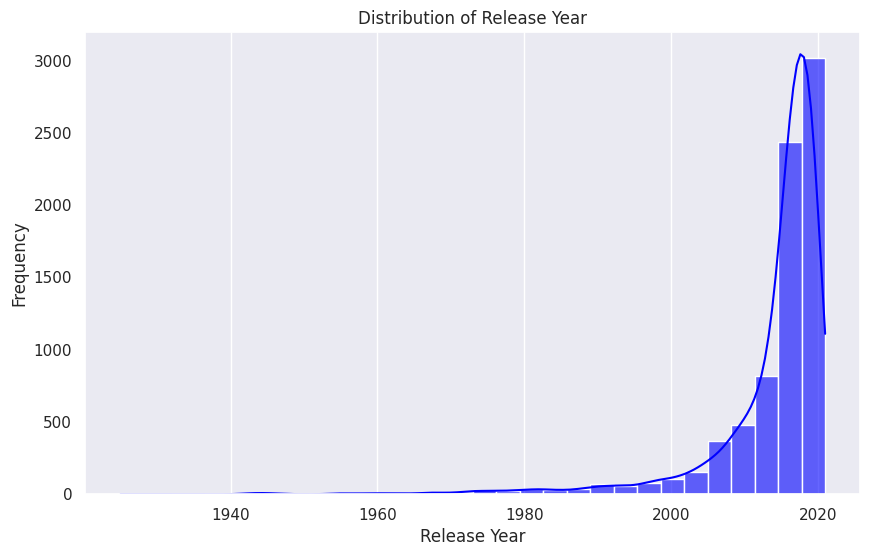

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_new = pd.read_csv('/content/netflix IDP.csv')
print("Column names in the dataset:")
print(data_new.columns)

if 'release_year' in data_new.columns:

    plt.figure(figsize=(10, 6))

    sns.histplot(data_new['release_year'], bins=30, kde=True, color='blue', alpha=0.6)

    plt.title('Distribution of Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Frequency')
    plt.grid(axis='y')

    plt.show()
else:
    print("'release_year' column is not present in the dataset.")


Length of movie_titles: 5
Length of ratings: 5
Length of image_urls: 5


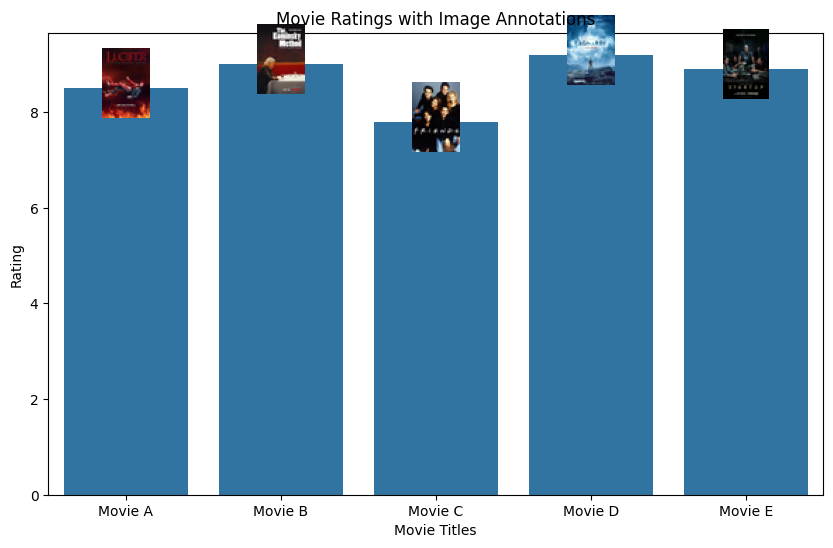

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image as PILImage
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

movie_titles = ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E']
ratings = [8.5, 9.0, 7.8, 9.2, 8.9]
image_urls = [
     'https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BMzA0YTNjOTAtNmVkZi00YjBkLTgyZDItOTFmMzQ0N2E4ZDNiXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BODM3NTZkZTUtYzEyYS00NjEyLTg2NjEtNDhlMjYwY2ZkNGUzXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BMTAxNTIwNzE5MTJeQTJeQWpwZ15BbWU4MDE2NDQ2MTMy._V1_FMjpg_UX1000_.jpg'
     'https://m.media-amazon.com/images/M/MV5BMjgwNGNkZGYtMWQyYS00YjEzLWFmZTctODUzYWMxOWJkNTAzXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_FMjpg_UX1000_.jpg'
     'https://m.media-amazon.com/images/M/MV5BOTk4ZDRhYzEtZWExNy00MjIyLTgyYmMtN2Y2MzA4YzZhZTZmXkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_FMjpg_UX1000_.jpg'
     'https://m.media-amazon.com/images/M/MV5BZDA1MzE3M2EtNTE4Ni00OGE4LWE1NjctYzFhMzA2NDgxMDIxXkEyXkFqcGdeQXVyODUxOTU0OTg@._V1_FMjpg_UX1000_.jpg'
     'https://m.media-amazon.com/images/M/MV5BMDU4MWViOGItZGJjYi00YjczLTk1YmMtY2ZmNmY4YTllNDA0XkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_FMjpg_UX1000_.jpg'
     'https://m.media-amazon.com/images/M/MV5BNmJhYTVjNzUtNjJiZi00MWFhLTg4MWUtMzNiMGEwMmVkYWY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_FMjpg_UX1000_.jpg'
]

print(f"Length of movie_titles: {len(movie_titles)}")
print(f"Length of ratings: {len(ratings)}")
print(f"Length of image_urls: {len(image_urls)}")
min_length = min(len(movie_titles), len(ratings), len(image_urls))
movie_titles = movie_titles[:min_length]
ratings = ratings[:min_length]
image_urls = image_urls[:min_length]

selected_movies = pd.DataFrame({
    'title': movie_titles,
    'rating': ratings,
    'image_url': image_urls
})

plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='rating', data=selected_movies)

ax = plt.gca()

def get_image(url, ax):
    response = requests.get(url)
    img = PILImage.open(BytesIO(response.content))
    img.thumbnail((50, 50), PILImage.LANCZOS)
    return OffsetImage(img, zoom=1)

for i, (movie_title, image_url) in enumerate(zip(selected_movies['title'], selected_movies['image_url'])):
    image = get_image(image_url, ax)
    ab = AnnotationBbox(image, (i, selected_movies['rating'].iloc[i] + 0.1), frameon=False)
    ax.add_artist(ab)

plt.xlabel("Movie Titles")
plt.ylabel("Rating")
plt.title("Movie Ratings with Image Annotations")

plt.show()


# **Metrics**

**Root mean square error**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

actual_ratings = [4.0, 5.0, 3.5, 4.5, 2.0]
predicted_ratings = [3.8, 4.8, 3.6, 4.2, 2.5]

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f'RMSE: {rmse:.2f}')


RMSE: 0.29


 **Mean absolute error**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

actual_ratings = [4.0, 5.0, 3.5, 4.5, 2.0]
predicted_ratings = [3.8, 4.8, 3.6, 4.2, 2.5]

mae = mean_absolute_error(actual_ratings, predicted_ratings)

print(f'MAE: {mae:.2f}')


MAE: 0.26


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


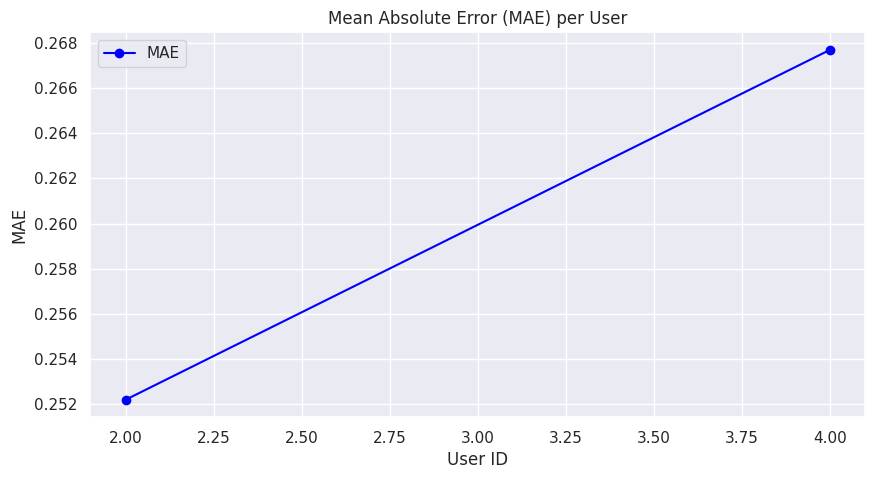

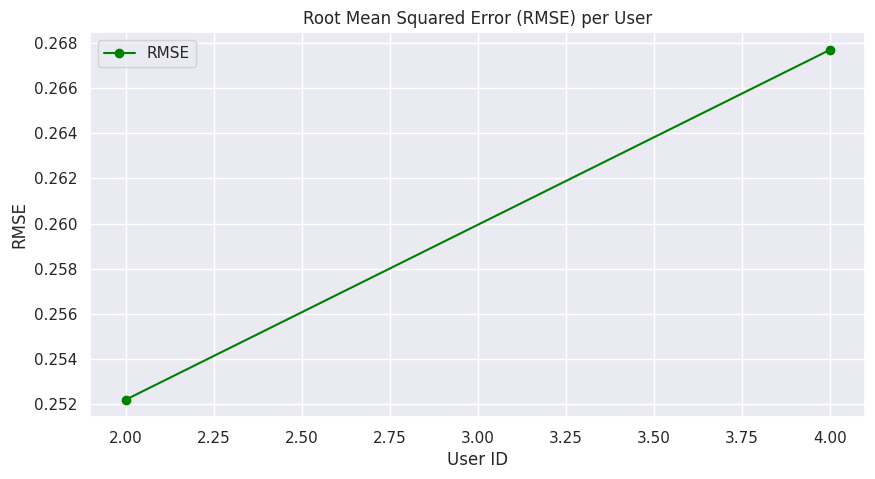

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_absolute_error, confusion_matrix, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import math

# Sample Data
data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0],
    'cast': [
        "Actor A, Actor B", "Actor C, Actor D", "Actor E",
        "Actor A, Actor F", "Actor G", "Actor C",
        "Actor E, Actor G", "Actor F, Actor D", "Actor A", "Actor H"
    ],
    'title': [
        "Movie 1", "Movie 2", "Movie 3",
        "Movie 4", "Movie 5", "Movie 6",
        "Movie 7", "Movie 8", "Movie 9", "Movie 10"
    ]
}

# Step 1: Convert data to a DataFrame
df = pd.DataFrame(data)

# -------------------- Content-Based Filtering (CBF) ---------------------

# Step 2: Combine 'cast' and 'title' columns for richer text data
df['combined_text'] = df['cast'] + " " + df['title']

# Step 3: Ensure we're using unique items (because CF uses unique items)
unique_items_df = df.drop_duplicates(subset=['itemId'])
unique_items = unique_items_df['itemId'].unique()

# Step 4: Apply TF-IDF vectorization on the combined text column
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(unique_items_df['combined_text'])

# Step 5: Apply Truncated SVD with dynamic n_components based on available features
n_features = X_tfidf.shape[1]
n_components = min(10, n_features)  # Ensure n_components <= n_features

if n_features > 1:  # Check if there are more than 1 feature
    svd_cbf = TruncatedSVD(n_components=n_components, random_state=42)
    X_cbf_svd = svd_cbf.fit_transform(X_tfidf)

    # Compute cosine similarities between items based on their descriptions
    similarity_matrix_cbf = cosine_similarity(X_cbf_svd)
else:
    print("Not enough features for Truncated SVD. Please add more textual data.")

# -------------------- Collaborative Filtering (CF) ---------------------

# Load the data into Surprise format for CF
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)

# Split into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train a KNNBasic CF model (Item-based collaborative filtering)
sim_options = {'name': 'cosine', 'user_based': False}
model_cf = KNNBasic(sim_options=sim_options)
model_cf.fit(trainset)

# Get similarity matrix for items
similarity_matrix_cf = model_cf.compute_similarities()

# -------------------- Align CF and CBF Matrices ---------------------

# Ensure both similarity matrices have the same set of items
cf_items = [trainset.to_raw_iid(inner_id) for inner_id in range(trainset.n_items)]  # Get CF items
aligned_items = [item for item in unique_items if item in cf_items]  # Align with CBF items
aligned_item_indices = [cf_items.index(item) for item in aligned_items]  # Indices of aligned items

# Truncate both matrices to ensure they cover the same items
similarity_matrix_cf_aligned = similarity_matrix_cf[aligned_item_indices, :][:, aligned_item_indices]
similarity_matrix_cbf_aligned = similarity_matrix_cbf[:len(aligned_items), :len(aligned_items)]

# Combine the similarity matrices
hybrid_similarity_matrix = (similarity_matrix_cf_aligned + similarity_matrix_cbf_aligned) / 2

# -------------------- Function to Get Hybrid Recommendations --------------------

def get_hybrid_recommendations(user_id, top_n=5):
    # Get the list of items rated by the user
    user_ratings = df[df['userId'] == user_id][['itemId', 'rating']]
    rated_items = user_ratings['itemId'].values

    # Predict for items not rated by the user
    items_to_predict = [item for item in aligned_items if item not in rated_items]

    # For each item, use the hybrid similarity to predict the rating
    estimated_ratings = []
    for item_id in items_to_predict:
        if item_id not in aligned_items:
            continue  # Skip items not in aligned_items

        item_idx = np.where(np.array(aligned_items) == item_id)[0]
        if item_idx.size == 0:
            continue  # Skip if item not found

        item_idx = item_idx[0]
        sim_sum = 0
        weighted_sum = 0
        for rated_item in rated_items:
            if rated_item not in aligned_items:
                continue  # Skip rated items not in aligned_items

            rated_item_idx = np.where(np.array(aligned_items) == rated_item)[0][0]
            sim = hybrid_similarity_matrix[item_idx, rated_item_idx]
            rating = user_ratings[user_ratings['itemId'] == rated_item]['rating'].values[0]
            weighted_sum += sim * rating
            sim_sum += sim

        if sim_sum > 0:
            estimated_rating = weighted_sum / sim_sum
        else:
            estimated_rating = 0
        estimated_ratings.append((item_id, estimated_rating))

    # Sort the items by predicted rating
    recommendations = sorted(estimated_ratings, key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]

# -------------------- Performance Metrics --------------------

# Collect predictions and actual values for test set
all_predictions = []
all_actual_ratings = []
mae_values = []
rmse_values = []
user_ids = []

for user_id, item_id, true_rating in testset:
    recommendations = get_hybrid_recommendations(user_id, top_n=5)

    # Extract the predicted rating for the item in the test set
    predicted_rating = [r[1] for r in recommendations if r[0] == item_id]
    if predicted_rating:
        all_predictions.append(predicted_rating[0])
    else:
        all_predictions.append(np.mean([r[1] for r in recommendations]))  # Use the average predicted rating

    all_actual_ratings.append(true_rating)

    # Calculate MAE and RMSE per user
    mae = mean_absolute_error([true_rating], [all_predictions[-1]])
    rmse = math.sqrt(mean_squared_error([true_rating], [all_predictions[-1]]))

    mae_values.append(mae)
    rmse_values.append(rmse)
    user_ids.append(user_id)

# -------------------- Line Charts --------------------

# Plot MAE per user
plt.figure(figsize=(10, 5))
plt.plot(user_ids, mae_values, marker='o', color='blue', label='MAE')
plt.title('Mean Absolute Error (MAE) per User')
plt.xlabel('User ID')
plt.ylabel('MAE')
plt.grid(True)
plt.legend()
plt.show()

# Plot RMSE per user
plt.figure(figsize=(10, 5))
plt.plot(user_ids, rmse_values, marker='o', color='green', label='RMSE')
plt.title('Root Mean Squared Error (RMSE) per User')
plt.xlabel('User ID')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()


# **Movie Lens dataset including:Movie metadata,user ratings,interactions**

Movie metadata

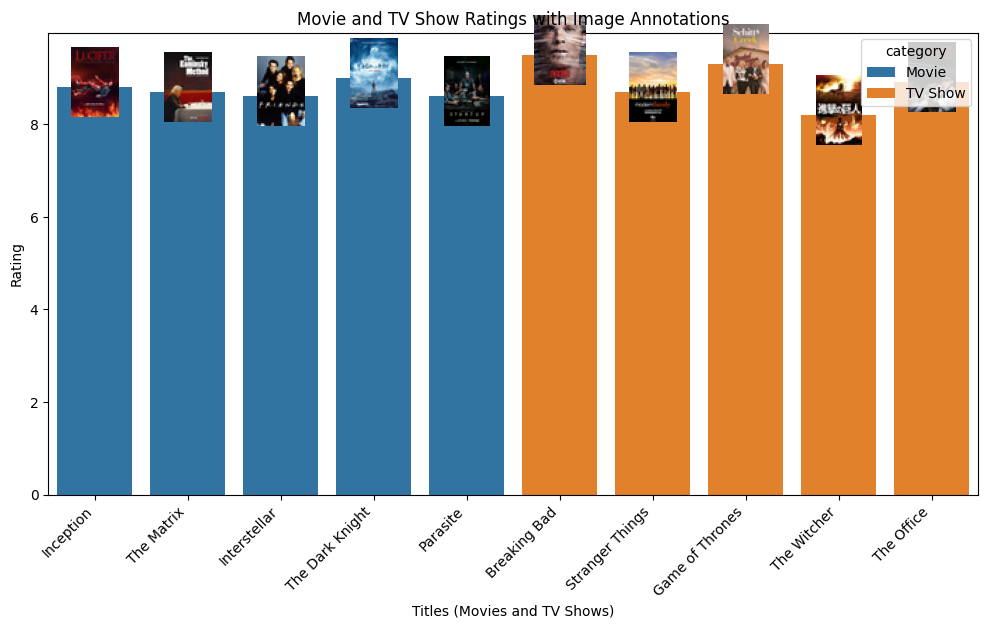

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image as PILImage
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

titles = ['Inception', 'The Matrix', 'Interstellar', 'The Dark Knight', 'Parasite',
          'Breaking Bad', 'Stranger Things', 'Game of Thrones', 'The Witcher', 'The Office']
categories = ['Movie', 'Movie', 'Movie', 'Movie', 'Movie',
              'TV Show', 'TV Show', 'TV Show', 'TV Show', 'TV Show']
ratings = [8.8, 8.7, 8.6, 9.0, 8.6, 9.5, 8.7, 9.3, 8.2, 8.9]
image_urls = [

    'https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BMzA0YTNjOTAtNmVkZi00YjBkLTgyZDItOTFmMzQ0N2E4ZDNiXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BODM3NTZkZTUtYzEyYS00NjEyLTg2NjEtNDhlMjYwY2ZkNGUzXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BMTAxNTIwNzE5MTJeQTJeQWpwZ15BbWU4MDE2NDQ2MTMy._V1_FMjpg_UX1000_.jpg',

    'https://m.media-amazon.com/images/M/MV5BMTM5MjkwMTI0MV5BMl5BanBnXkFtZTcwODQwMTc0OQ@@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BNzRhNWIxYTEtYjc2NS00YWFlLWFhOGEtMDZiMWM1M2RkNDkyXkEyXkFqcGdeQXVyNjc0MjkzNjc@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BNWQ1ZmM3MTQtNTVhZC00MWVlLWI5ZjgtYmZiYWQxZjUzZWM0XkEyXkFqcGdeQXVyMzQ2MDI5NjU@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BMTY5ODk1NzUyMl5BMl5BanBnXkFtZTgwMjUyNzEyMTE@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BYzY0YzJjNmYtM2Y1MC00NWExLTk4NzgtMWYzMWFmMzhkNTBmXkEyXkFqcGdeQXVyODk3ODczODU@._V1_FMjpg_UX1000_.jpg'
]

min_length = min(len(titles), len(ratings), len(image_urls), len(categories))
titles = titles[:min_length]
ratings = ratings[:min_length]
image_urls = image_urls[:min_length]
categories = categories[:min_length]

selected_titles = pd.DataFrame({
    'title': titles,
    'category': categories,
    'rating': ratings,
    'image_url': image_urls
})

plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='rating', hue='category', dodge=False, data=selected_titles)  # Use hue for categories

ax = plt.gca()

def get_image(url, ax):
    try:
        response = requests.get(url)
        if response.status_code == 200 and 'image' in response.headers['Content-Type']:
            img = PILImage.open(BytesIO(response.content))
            img.thumbnail((50, 50), PILImage.LANCZOS)  # Thumbnail size
            return OffsetImage(img, zoom=1)
        else:
            print(f"Skipping invalid image at URL: {url}")
            return None
    except Exception as e:
        print(f"Error loading image from {url}: {e}")
        return None

for i, (title, image_url) in enumerate(zip(selected_titles['title'], selected_titles['image_url'])):
    image = get_image(image_url, ax)
    if image is not None:
        ab = AnnotationBbox(image, (i, selected_titles['rating'].iloc[i] + 0.1), frameon=False)
        ax.add_artist(ab)

plt.xlabel("Titles (Movies and TV Shows)")
plt.ylabel("Rating")
plt.title("Movie and TV Show Ratings with Image Annotations")

plt.xticks(rotation=45, ha="right")

plt.show()


User Ratings

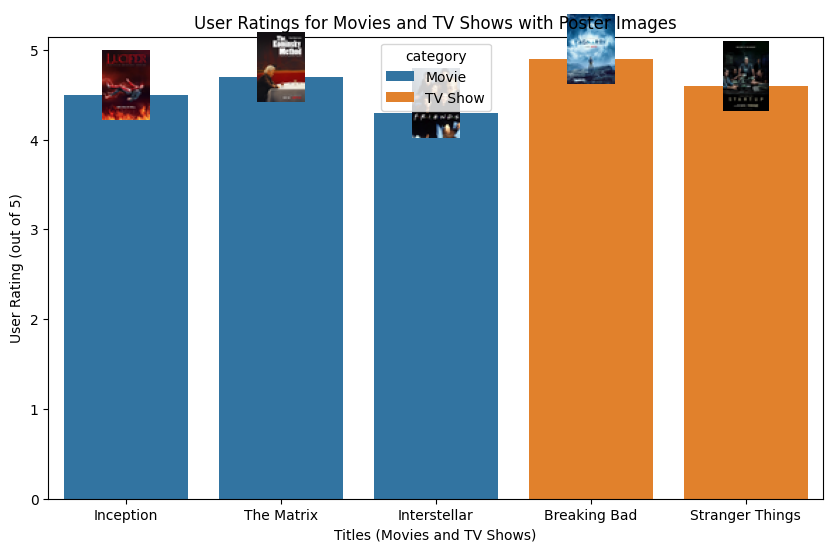

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image as PILImage, UnidentifiedImageError
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

titles = ['Inception', 'The Matrix', 'Interstellar', 'Breaking Bad', 'Stranger Things']
categories = ['Movie', 'Movie', 'Movie', 'TV Show', 'TV Show']
user_ratings = [4.5, 4.7, 4.3, 4.9, 4.6]
image_urls = [
    'https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BMzA0YTNjOTAtNmVkZi00YjBkLTgyZDItOTFmMzQ0N2E4ZDNiXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BODM3NTZkZTUtYzEyYS00NjEyLTg2NjEtNDhlMjYwY2ZkNGUzXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_FMjpg_UX1000_.jpg',
     'https://m.media-amazon.com/images/M/MV5BMTAxNTIwNzE5MTJeQTJeQWpwZ15BbWU4MDE2NDQ2MTMy._V1_FMjpg_UX1000_.jpg'
]

min_length = min(len(titles), len(user_ratings), len(image_urls))
titles = titles[:min_length]
categories = categories[:min_length]
user_ratings = user_ratings[:min_length]
image_urls = image_urls[:min_length]

selected_titles = pd.DataFrame({
    'title': titles,
    'category': categories,
    'user_rating': user_ratings,
    'image_url': image_urls
})

plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='user_rating', hue='category', dodge=False, data=selected_titles)  # Use hue for categories

ax = plt.gca()

def get_image(url, ax):
    try:
        response = requests.get(url)
        img = PILImage.open(BytesIO(response.content))
        img.thumbnail((50, 50), PILImage.LANCZOS)
        return OffsetImage(img, zoom=1)
    except UnidentifiedImageError:
        print(f"Could not identify image from URL: {url}")
        return None

for i, (title, image_url) in enumerate(zip(selected_titles['title'], selected_titles['image_url'])):
    image = get_image(image_url, ax)
    if image is not None:
        ab = AnnotationBbox(image, (i, selected_titles['user_rating'].iloc[i] + 0.1), frameon=False)
        ax.add_artist(ab)

plt.xlabel("Titles (Movies and TV Shows)")
plt.ylabel("User Rating (out of 5)")
plt.title("User Ratings for Movies and TV Shows with Poster Images")

plt.show()


Interactions

In [ ]:
import plotly.graph_objects as go

titles = ['Inception', 'The Matrix', 'Interstellar', 'Breaking Bad', 'Stranger Things']
categories = ['Movie', 'Movie', 'Movie', 'TV Show', 'TV Show']
ratings = [4.5, 4.7, 4.3, 4.9, 4.6]
image_urls = [
    'https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BMzA0YTNjOTAtNmVkZi00YjBkLTgyZDItOTFmMzQ0N2E4ZDNiXkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BMjI2MDA3ODQtYzRiYy00OTI4LTkwMjAtODliNGVmYzc2MjQzXkEyXkFqcGdeQXVyNjUxMjc1OTM@._V1_FMjpg_UX1000_.jpg',
    'https://m.media-amazon.com/images/M/MV5BZjZhZjA2OTctYWM3ZS00NDFhLTk4MzItZTU0YTMwMGEzZjNiXkEyXkFqcGdeQXVyMTE2MjAzMTU@._V1_FMjpg_UX1000_.jpg'
]

fig = go.Figure()
for title, rating, category, img_url in zip(titles, ratings, categories, image_urls):
    fig.add_trace(go.Bar(
        x=[title],
        y=[rating],
        hovertemplate=f'<b>{title}</b><br>Category: {category}<br>Rating: {rating}<br><img src="{img_url}" style="width:100px;height:150px;"><extra></extra>',
        name=title
    ))

fig.update_layout(
    title="User Ratings for Movies and TV Shows",
    xaxis_title="Titles",
    yaxis_title="User Rating (out of 5)",
    hovermode="closest"
)

fig.show()


Clickable Links to Movie Pages

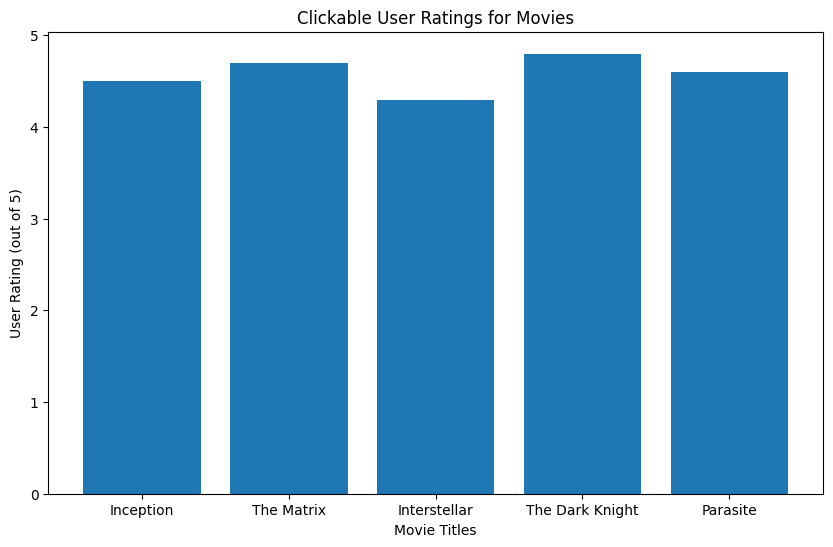

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import webbrowser

movie_titles = ['Inception', 'The Matrix', 'Interstellar', 'The Dark Knight', 'Parasite']
user_ratings = [4.5, 4.7, 4.3, 4.8, 4.6]
movie_links = [
    'https://www.imdb.com/title/tt1375666/',
    'https://www.imdb.com/title/tt0133093/',
    'https://www.imdb.com/title/tt0816692/',
    'https://www.imdb.com/title/tt0468569/',
    'https://www.imdb.com/title/tt6751668/'
]

plt.figure(figsize=(10, 6))
bars = plt.bar(movie_titles, user_ratings)

def on_click(event):
    for i, bar in enumerate(bars):
        if bar.contains(event)[0]:
            webbrowser.open(movie_links[i])
            break


plt.gcf().canvas.mpl_connect('button_press_event', on_click)

plt.xlabel("Movie Titles")
plt.ylabel("User Rating (out of 5)")
plt.title("Clickable User Ratings for Movies")

plt.show()


# **Filtering**

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357286 sha256=aace986f83f76497f3bbcf82faf87e9e3ef87861d94137da701a023cfb312b8a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate

data_dict = {
    'user_id': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    'title': ['Inception', 'The Matrix', 'Breaking Bad', 'Interstellar', 'The Dark Knight', 'Stranger Things',
              'The Witcher', 'Parasite', 'Game of Thrones', 'The Office', 'The Matrix', 'Parasite'],
    'rating': [5, 4, 5, 4, 5, 3, 2, 5, 4, 3, 4, 5]
}

df = pd.DataFrame(data_dict)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'title', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

model = SVD()

model.fit(trainset)

predictions = model.test(testset)
accuracy.rmse(predictions)

def get_top_n_recommendations(user_id, df, model, n=5):

    titles = df['title'].unique()

    user_rated = df[df['user_id'] == user_id]['title'].values
    titles_to_predict = [title for title in titles if title not in user_rated]

    predictions = [model.predict(user_id, title) for title in titles_to_predict]

    predictions.sort(key=lambda x: x.est, reverse=True)

    top_n = predictions[:n]

    return [(pred.iid, pred.est) for pred in top_n]

user_id = 1
recommendations = get_top_n_recommendations(user_id, df, model)
print(f"Top recommendations for User {user_id}:")
for title, estimated_rating in recommendations:
    print(f"{title}: {estimated_rating:.2f}")


RMSE: 0.6023
Top recommendations for User 1:
The Dark Knight: 4.25
Parasite: 4.24
Interstellar: 4.20
Game of Thrones: 4.15
Stranger Things: 4.14


Collaborative Filtering (User-based)

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0]
}

df = pd.DataFrame(data)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)

model.fit(trainset)

predictions = model.test(testset)

accuracy.rmse(predictions)

def get_top_n_recommendations(model, user_id, all_items, n=5):
    """Recommend top N items for a given user."""
    rated_items = df[df['userId'] == user_id]['itemId'].unique()

    items_to_predict = [item for item in all_items if item not in rated_items]
    predictions = [model.predict(user_id, item).est for item in items_to_predict]

    recommended_items = sorted(zip(items_to_predict, predictions), key=lambda x: x[1], reverse=True)

    return recommended_items[:n]

user_ids = df['userId'].unique()
item_ids = df['itemId'].unique()

all_user_recommendations = {}

for user_id in user_ids:
    top_recommendations = get_top_n_recommendations(model, user_id, item_ids, n=5)
    all_user_recommendations[user_id] = top_recommendations
    print(f"Top 5 recommendations for user {user_id}: {top_recommendations}")

print("All user recommendations:", all_user_recommendations)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6455
Top 5 recommendations for user 1: [(105, 4.0), (104, 2.0)]
Top 5 recommendations for user 2: [(103, 4.0), (105, 4.0), (102, 3.5)]
Top 5 recommendations for user 3: [(101, 5), (105, 4.0)]
Top 5 recommendations for user 4: [(104, 4.5), (102, 4.0), (103, 4.0)]
All user recommendations: {1: [(105, 4.0), (104, 2.0)], 2: [(103, 4.0), (105, 4.0), (102, 3.5)], 3: [(101, 5), (105, 4.0)], 4: [(104, 4.5), (102, 4.0), (103, 4.0)]}


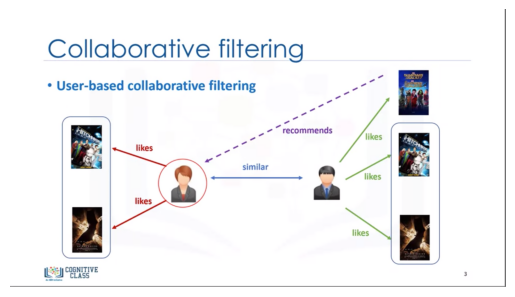

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update the image path to point to the location of the uploaded image
image_path = '/content/col.png'  # If the image is in the root directory of Colab


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()

Collaborative Filtering (Item-based)

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Example Data
data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0]
}

# Step 1: Convert data to a DataFrame
df = pd.DataFrame(data)

# Step 2: Load the data into Surprise format using a Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)

# Step 3: Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Step 4: Define a function to train the model with item-based filtering
def train_knn_model(sim_metric='cosine', user_based=False):
    sim_options = {
        'name': sim_metric,
        'user_based': user_based  # Set to False for item-item collaborative filtering
    }
    model = KNNBasic(sim_options=sim_options)
    model.fit(trainset)
    return model

# Step 5: Define a function to get top N recommendations for a user
def get_top_n_recommendations(model, user_id, all_items, n=5):
    """Recommend top N items for a given user."""
    # Get items already rated by the user
    rated_items = df[df['userId'] == user_id]['itemId'].unique()

    # Predict for items the user has not rated
    items_to_predict = [item for item in all_items if item not in rated_items]
    predictions = [(item, model.predict(user_id, item).est) for item in items_to_predict]

    # Sort the predictions by estimated rating
    recommended_items = sorted(predictions, key=lambda x: x[1], reverse=True)

    return recommended_items[:n]

# Step 6: Train the model (for item-based filtering)
model = train_knn_model(sim_metric='cosine', user_based=False)

# Step 7: Make predictions on the test set and evaluate model accuracy
predictions = model.test(testset)
accuracy.rmse(predictions)

# Step 8: Generate recommendations for all users
user_ids = df['userId'].unique()  # Get unique user IDs
item_ids = df['itemId'].unique()  # Get unique item IDs

all_user_recommendations = {}

for user_id in user_ids:
    top_recommendations = get_top_n_recommendations(model, user_id, item_ids, n=5)
    all_user_recommendations[user_id] = top_recommendations
    print(f"Top 5 recommendations for user {user_id}: {top_recommendations}")

print("All user recommendations:", all_user_recommendations)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2570
Top 5 recommendations for user 1: [(104, 4.142857142857143), (105, 4.142857142857143)]
Top 5 recommendations for user 2: [(102, 4.142857142857143), (103, 4.142857142857143), (105, 4.142857142857143)]
Top 5 recommendations for user 3: [(101, 4.142857142857143), (105, 4.142857142857143)]
Top 5 recommendations for user 4: [(104, 5), (102, 4.142857142857143), (103, 4.142857142857143)]
All user recommendations: {1: [(104, 4.142857142857143), (105, 4.142857142857143)], 2: [(102, 4.142857142857143), (103, 4.142857142857143), (105, 4.142857142857143)], 3: [(101, 4.142857142857143), (105, 4.142857142857143)], 4: [(104, 5), (102, 4.142857142857143), (103, 4.142857142857143)]}


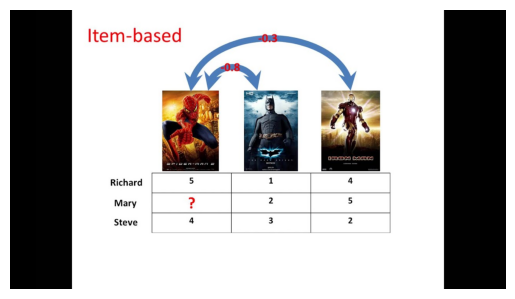

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update the image path to point to the location of the uploaded image
image_path = '/content/item.jpg'  # If the image is in the root directory of Colab


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()

Content-Based Filtering (CBF) Code

   CBF_Feature1  CBF_Feature2  CBF_Feature3  CBF_Feature4  CBF_Feature5  \
0      0.016497     -0.006509      0.000052     -0.002393      0.006708   
1      0.017224     -0.007268     -0.000298     -0.004099      0.007149   
2      0.100728      0.043587     -0.004870     -0.016821     -0.001911   
3      0.142399     -0.054749     -0.008317     -0.045840     -0.011184   
4      0.116687     -0.027519     -0.007601     -0.029451     -0.005831   

   CBF_Feature6  CBF_Feature7  CBF_Feature8  CBF_Feature9  CBF_Feature10  ...  \
0     -0.032753     -0.042896     -0.010160      0.035372      -0.004700  ...   
1     -0.020316     -0.032072     -0.007499      0.025930      -0.002896  ...   
2     -0.083534      0.061066      0.038603     -0.011269      -0.005722  ...   
3      0.054169     -0.051497      0.094009     -0.014065      -0.019540  ...   
4     -0.051834      0.015630     -0.033686     -0.071659      -0.029461  ...   

   CBF_Feature91  CBF_Feature92  CBF_Feature93  CBF_Feature94 

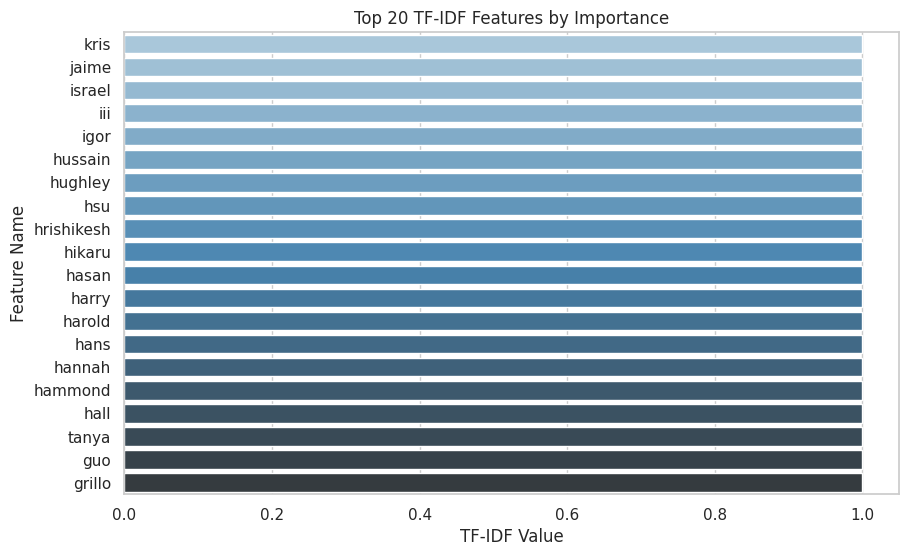

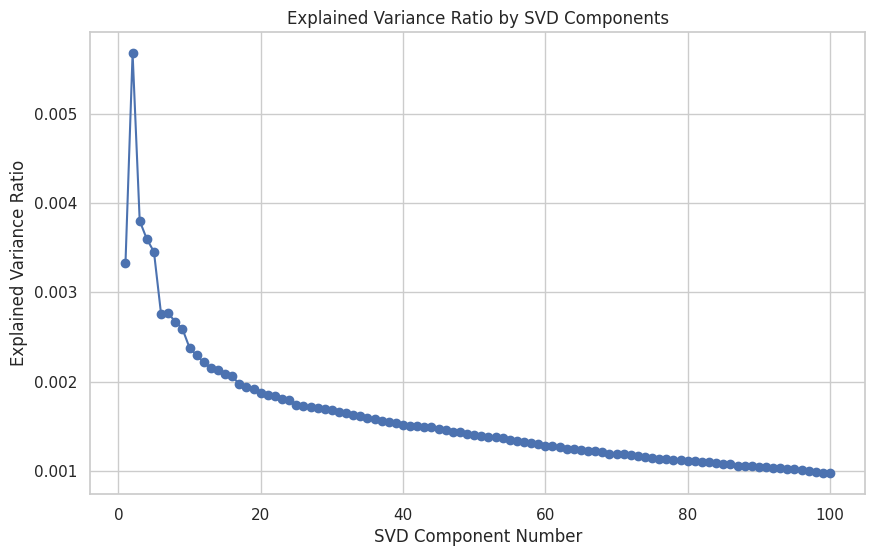

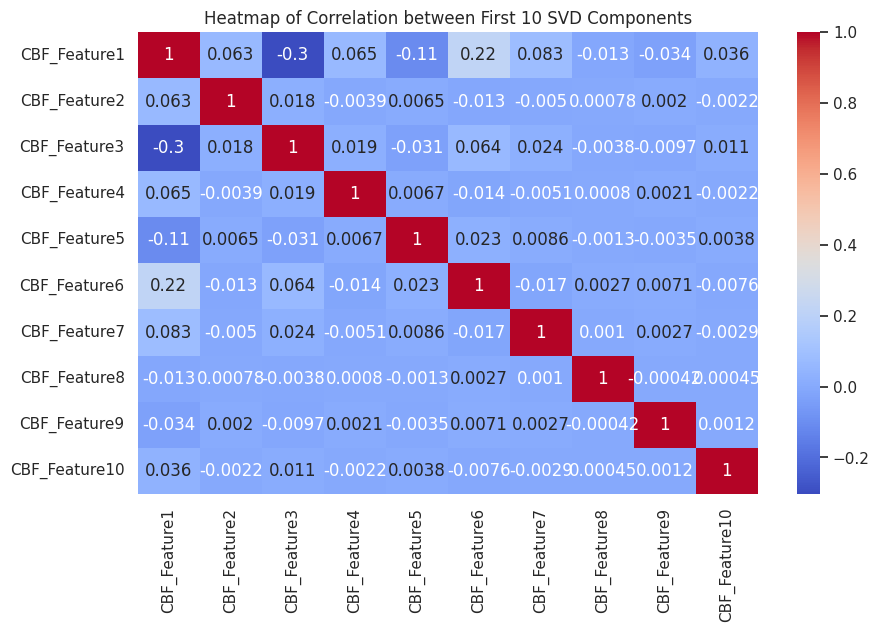

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Netflix dataset
data = pd.read_csv('/content/netflix IDP.csv')

# Step 2: Handle missing values in 'cast' and create a 'description' column
data['description'] = data['cast'].fillna('')

# Step 3: Apply TF-IDF vectorization on the 'description' column
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['description'])

# Step 4: Apply Truncated SVD to reduce the dimensionality of the TF-IDF matrix
svd_cbf = TruncatedSVD(n_components=100, random_state=42)
X_cbf_svd = svd_cbf.fit_transform(X_tfidf)

# Step 5: Create a DataFrame for the CBF features
X_cbf_svd = pd.DataFrame(X_cbf_svd, columns=[f'CBF_Feature{i}' for i in range(1, 101)])

# Step 6: Display the resulting CBF features
print(X_cbf_svd.head())

# -------------------------- Adding Graphs --------------------------

# Plot 1: Top TF-IDF Features by importance
def plot_top_tfidf_features(tfidf_vectorizer, num_features=20):
    """Plot the top n TF-IDF features."""
    feature_names = tfidf_vectorizer.get_feature_names_out()
    max_values = X_tfidf.max(0).toarray().flatten()
    sorted_indices = max_values.argsort()[::-1][:num_features]
    top_feature_names = [feature_names[i] for i in sorted_indices]
    top_feature_values = max_values[sorted_indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_feature_values, y=top_feature_names, palette="Blues_d")
    plt.title(f"Top {num_features} TF-IDF Features by Importance")
    plt.xlabel("TF-IDF Value")
    plt.ylabel("Feature Name")
    plt.show()

# Call the function to plot top TF-IDF features
plot_top_tfidf_features(tfidf_vectorizer)

# Plot 2: SVD explained variance ratios
def plot_svd_variance(svd_model):
    """Plot the explained variance of each SVD component."""
    explained_variance = svd_model.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
    plt.title("Explained Variance Ratio by SVD Components")
    plt.xlabel("SVD Component Number")
    plt.ylabel("Explained Variance Ratio")
    plt.grid(True)
    plt.show()

# Call the function to plot explained variance
plot_svd_variance(svd_cbf)

# Plot 3: Heatmap of the first 10 SVD components
plt.figure(figsize=(10, 6))
sns.heatmap(X_cbf_svd.iloc[:, :10].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation between First 10 SVD Components")
plt.show()


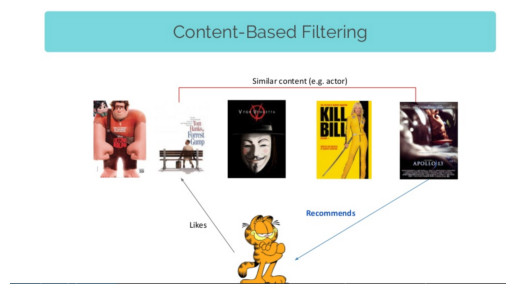

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update the image path to point to the location of the uploaded image
image_path = '/content/Content.png'  # If the image is in the root directory of Colab


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()

Matrix Factorization (SVD)

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0]
}

df = pd.DataFrame(data)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

model = SVD()

model.fit(trainset)

predictions = model.test(testset)

accuracy.rmse(predictions)

def get_top_n_recommendations(model, user_id, all_items, n=5):
    """Recommend top N items for a given user."""
    rated_items = df[df['userId'] == user_id]['itemId'].unique()

    items_to_predict = [item for item in all_items if item not in rated_items]
    predictions = [model.predict(user_id, item).est for item in items_to_predict]

    recommended_items = sorted(zip(items_to_predict, predictions), key=lambda x: x[1], reverse=True)

    return recommended_items[:n]

user_ids = df['userId'].unique()
item_ids = df['itemId'].unique()

all_user_recommendations = {}

for user_id in user_ids:
    top_recommendations = get_top_n_recommendations(model, user_id, item_ids, n=5)
    all_user_recommendations[user_id] = top_recommendations
    print(f"Top 5 recommendations for user {user_id}: {top_recommendations}")

print("All user recommendations:", all_user_recommendations)


RMSE: 0.9822
Top 5 recommendations for user 1: [(105, 3.68653601833291), (104, 3.504392394837809)]
Top 5 recommendations for user 2: [(105, 3.839693821364275), (102, 3.7584356735635116), (103, 3.6868640724943162)]
Top 5 recommendations for user 3: [(101, 3.629577708814018), (105, 3.5793978903662738)]
Top 5 recommendations for user 4: [(103, 3.5997766915081537), (102, 3.557273824324094), (104, 3.430282906959161)]
All user recommendations: {1: [(105, 3.68653601833291), (104, 3.504392394837809)], 2: [(105, 3.839693821364275), (102, 3.7584356735635116), (103, 3.6868640724943162)], 3: [(101, 3.629577708814018), (105, 3.5793978903662738)], 4: [(103, 3.5997766915081537), (102, 3.557273824324094), (104, 3.430282906959161)]}


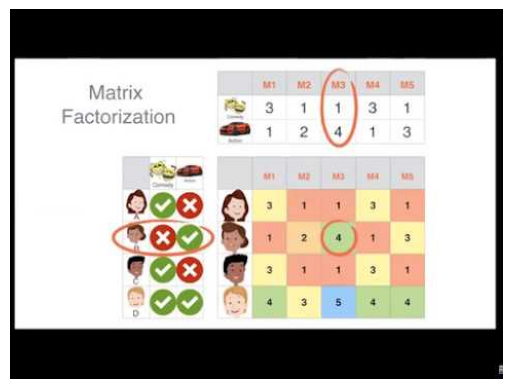

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update the image path to point to the location of the uploaded image
image_path = '/content/matr.jpg'  # If the image is in the root directory of Colab


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()

Hybrid Model

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

ratings_data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0]
}

movie_data = {
    'itemId': [101, 102, 103, 104, 105],
    'title': ['Inception', 'The Matrix', 'Interstellar', 'The Dark Knight', 'Parasite'],
    'genre': ['Sci-Fi', 'Sci-Fi', 'Sci-Fi', 'Action', 'Thriller'],
    'director': ['Nolan', 'Wachowski', 'Nolan', 'Nolan', 'Bong']
}

ratings_df = pd.DataFrame(ratings_data)
movies_df = pd.DataFrame(movie_data)

reader = Reader(rating_scale=(1, 5))
ratings = Dataset.load_from_df(ratings_df[['userId', 'itemId', 'rating']], reader)
trainset, testset = train_test_split(ratings, test_size=0.25)

cf_model = SVD()
cf_model.fit(trainset)
cf_predictions = cf_model.test(testset)

accuracy.rmse(cf_predictions)

metadata = movies_df['genre'] + ' ' + movies_df['director']
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(metadata)

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_cbf_recommendations(title, movies_df, cosine_sim, n=5):
    idx = movies_df[movies_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies_df['title'].iloc[movie_indices]

def hybrid_recommendation(user_id, cf_model, movies_df, cosine_sim, n=5):

    user_items = ratings_df[ratings_df['userId'] == user_id]['itemId'].unique()
    all_items = movies_df['itemId'].unique()
    items_to_predict = [item for item in all_items if item not in user_items]

    cf_preds = [cf_model.predict(user_id, item).est for item in items_to_predict]
    cf_recommendations = sorted(zip(items_to_predict, cf_preds), key=lambda x: x[1], reverse=True)

    if cf_recommendations:
        top_cf_item_id = cf_recommendations[0][0]
        top_cf_title = movies_df[movies_df['itemId'] == top_cf_item_id]['title'].values[0]
        cbf_recommendations = get_cbf_recommendations(top_cf_title, movies_df, cosine_sim, n)
    else:
        cbf_recommendations = []

    return {
        'CF Recommendations': cf_recommendations[:n],
        'CBF Recommendations': cbf_recommendations
    }

def get_recommendations_for_all_users(cf_model, movies_df, cosine_sim, n=5):
    all_users = ratings_df['userId'].unique()
    recommendations = {}

    for user_id in all_users:
        recommendations[user_id] = hybrid_recommendation(user_id, cf_model, movies_df, cosine_sim, n)

    return recommendations

all_user_recommendations = get_recommendations_for_all_users(cf_model, movies_df, cosine_sim, n=5)

for user, recs in all_user_recommendations.items():
    print(f"Recommendations for User {user}:")
    print("CF Recommendations:", recs['CF Recommendations'])
    print("CBF Recommendations:", recs['CBF Recommendations'])
    print("\n")


RMSE: 1.4279
Recommendations for User 1:
CF Recommendations: [(105, 4.310076518998618), (104, 4.279396770915117)]
CBF Recommendations: 0          Inception
1         The Matrix
2       Interstellar
3    The Dark Knight
Name: title, dtype: object


Recommendations for User 2:
CF Recommendations: [(102, 4.348912672475276), (105, 4.200105264166006), (103, 4.151447905336449)]
CBF Recommendations: 0          Inception
2       Interstellar
3    The Dark Knight
4           Parasite
Name: title, dtype: object


Recommendations for User 3:
CF Recommendations: [(101, 4.518527055940718), (105, 4.1944730244855295)]
CBF Recommendations: 2       Interstellar
1         The Matrix
3    The Dark Knight
4           Parasite
Name: title, dtype: object


Recommendations for User 4:
CF Recommendations: [(103, 4.4160595449824145), (102, 4.308360225549283), (104, 4.294630247706317)]
CBF Recommendations: 2       Interstellar
1         The Matrix
3    The Dark Knight
4           Parasite
Name: title, dtype: ob

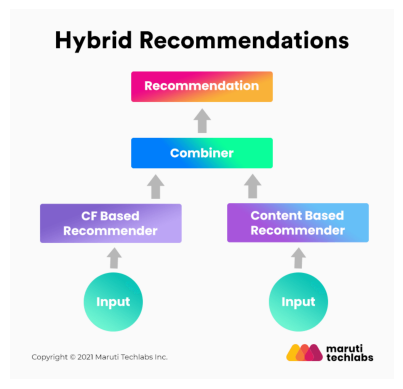

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update the image path to point to the location of the uploaded image
image_path = '/content/hybrid.png'  # If the image is in the root directory of Colab


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()

Deep Learning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
    'item_id': [101, 102, 103, 101, 104, 103, 105, 101, 102, 104],
    'rating': [5, 3, 4, 2, 4, 5, 1, 3, 5, 4]
}
df = pd.DataFrame(data)

user_ids = df['user_id'].unique()
item_ids = df['item_id'].unique()

user_mapping = {user_id: idx for idx, user_id in enumerate(user_ids)}
item_mapping = {item_id: idx for idx, item_id in enumerate(item_ids)}

df['user_index'] = df['user_id'].map(user_mapping)
df['item_index'] = df['item_id'].map(item_mapping)

X = df[['user_index', 'item_index']].values
y = df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_users = len(user_mapping)
num_items = len(item_mapping)
embedding_dim = 8
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

dot_product = Dot(axes=1)([user_vector, item_vector])

output = Dense(1, activation='linear')(dot_product)

model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(
    [X_train[:, 0], X_train[:, 1]],
    y_train,
    batch_size=32,
    epochs=10,
    verbose=0,
    validation_split=0.1
)

test_loss = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

predicted_ratings = {}
for user_id in user_mapping.keys():
    for item_id in item_mapping.keys():
        predicted_rating = model.predict([np.array([user_mapping[user_id]]), np.array([item_mapping[item_id]])], verbose=0)  # Suppress progress bars
        predicted_ratings[(user_id, item_id)] = predicted_rating[0][0]

for (user_id, item_id), rating in predicted_ratings.items():
    print(f"Predicted rating for user {user_id} on item {item_id}: {rating:.2f}")

print("User Mapping:", user_mapping)
print("Item Mapping:", item_mapping)


Test Loss: 16.9188
Predicted rating for user 1 on item 101: 0.01
Predicted rating for user 1 on item 102: 0.01
Predicted rating for user 1 on item 103: 0.01
Predicted rating for user 1 on item 104: 0.01
Predicted rating for user 1 on item 105: 0.01
Predicted rating for user 2 on item 101: 0.01
Predicted rating for user 2 on item 102: 0.01
Predicted rating for user 2 on item 103: 0.01
Predicted rating for user 2 on item 104: 0.01
Predicted rating for user 2 on item 105: 0.01
Predicted rating for user 3 on item 101: 0.01
Predicted rating for user 3 on item 102: 0.01
Predicted rating for user 3 on item 103: 0.01
Predicted rating for user 3 on item 104: 0.01
Predicted rating for user 3 on item 105: 0.01
Predicted rating for user 4 on item 101: 0.01
Predicted rating for user 4 on item 102: 0.01
Predicted rating for user 4 on item 103: 0.01
Predicted rating for user 4 on item 104: 0.01
Predicted rating for user 4 on item 105: 0.01
User Mapping: {1: 0, 2: 1, 3: 2, 4: 3}
Item Mapping: {101: 0,

evaluation metrics

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
    'item_id': [101, 102, 103, 101, 104, 103, 105, 101, 102, 104],
    'rating': [5, 3, 4, 2, 4, 5, 1, 3, 5, 4]
}
df = pd.DataFrame(data)

user_ids = df['user_id'].unique()
item_ids = df['item_id'].unique()

user_mapping = {user_id: idx for idx, user_id in enumerate(user_ids)}
item_mapping = {item_id: idx for idx, item_id in enumerate(item_ids)}

df['user_index'] = df['user_id'].map(user_mapping)
df['item_index'] = df['item_id'].map(item_mapping)

X = df[['user_index', 'item_index']].values
y = df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_users = len(user_mapping)
num_items = len(item_mapping)
embedding_dim = 8

user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

concat = Concatenate()([user_vector, item_vector])

dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear')(dense2)

model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(
    [X_train[:, 0], X_train[:, 1]],
    y_train,
    batch_size=32,
    epochs=10,
    verbose=0,
    validation_split=0.1
)

y_pred = model.predict([X_test[:, 0], X_test[:, 1]], verbose=0)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Evaluation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

predicted_ratings = {}
for user_id in user_mapping.keys():
    for item_id in item_mapping.keys():
        predicted_rating = model.predict(
            [np.array([user_mapping[user_id]]), np.array([item_mapping[item_id]])],
            verbose=0  # Suppress progress bars
        )
        predicted_ratings[(user_id, item_id)] = predicted_rating[0][0]

for (user_id, item_id), rating in predicted_ratings.items():
    print(f"Predicted rating for user {user_id} on item {item_id}: {rating:.2f}")

print("User Mapping:", user_mapping)
print("Item Mapping:", item_mapping)


Evaluation Metrics:
Mean Absolute Error (MAE): 3.8508
Mean Squared Error (MSE): 15.8150
Root Mean Squared Error (RMSE): 3.9768
R-squared (R²): -14.8150
Predicted rating for user 1 on item 101: 0.17
Predicted rating for user 1 on item 102: 0.14
Predicted rating for user 1 on item 103: 0.16
Predicted rating for user 1 on item 104: 0.17
Predicted rating for user 1 on item 105: 0.15
Predicted rating for user 2 on item 101: 0.20
Predicted rating for user 2 on item 102: 0.17
Predicted rating for user 2 on item 103: 0.19
Predicted rating for user 2 on item 104: 0.21
Predicted rating for user 2 on item 105: 0.18
Predicted rating for user 3 on item 101: 0.17
Predicted rating for user 3 on item 102: 0.15
Predicted rating for user 3 on item 103: 0.18
Predicted rating for user 3 on item 104: 0.19
Predicted rating for user 3 on item 105: 0.17
Predicted rating for user 4 on item 101: 0.19
Predicted rating for user 4 on item 102: 0.16
Predicted rating for user 4 on item 103: 0.17
Predicted rating for

neural collaborative filtering (NCF)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
    'item_id': [101, 102, 103, 101, 104, 103, 105, 101, 102, 104],
    'rating': [5, 3, 4, 2, 4, 5, 1, 3, 5, 4]
}
df = pd.DataFrame(data)

user_ids = df['user_id'].unique()
item_ids = df['item_id'].unique()

user_mapping = {user_id: idx for idx, user_id in enumerate(user_ids)}
item_mapping = {item_id: idx for idx, item_id in enumerate(item_ids)}

df['user_index'] = df['user_id'].map(user_mapping)
df['item_index'] = df['item_id'].map(item_mapping)

X = df[['user_index', 'item_index']].values
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_users = len(user_mapping)
num_items = len(item_mapping)
embedding_dim = 8

user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

concat = Concatenate()([user_vector, item_vector])

dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear')(dense2)

model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(
    [X_train[:, 0], X_train[:, 1]],
    y_train,
    batch_size=32,
    epochs=10,
    verbose=0,
    validation_split=0.1
)

y_pred = model.predict([X_test[:, 0], X_test[:, 1]], verbose=0)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Evaluation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

predicted_ratings = {}
for user_id in user_mapping.keys():
    for item_id in item_mapping.keys():
        predicted_rating = model.predict(
            [np.array([user_mapping[user_id]]), np.array([item_mapping[item_id]])],
            verbose=0  # Suppress progress bars
        )
        predicted_ratings[(user_id, item_id)] = predicted_rating[0][0]

for (user_id, item_id), rating in predicted_ratings.items():
    print(f"Predicted rating for user {user_id} on item {item_id}: {rating:.2f}")

print("User Mapping:", user_mapping)
print("Item Mapping:", item_mapping)


Evaluation Metrics:
Mean Absolute Error (MAE): 3.9178
Mean Squared Error (MSE): 16.3712
Root Mean Squared Error (RMSE): 4.0461
R-squared (R²): -15.3712
Predicted rating for user 1 on item 101: 0.12
Predicted rating for user 1 on item 102: 0.09
Predicted rating for user 1 on item 103: 0.14
Predicted rating for user 1 on item 104: 0.10
Predicted rating for user 1 on item 105: 0.13
Predicted rating for user 2 on item 101: 0.11
Predicted rating for user 2 on item 102: 0.07
Predicted rating for user 2 on item 103: 0.11
Predicted rating for user 2 on item 104: 0.08
Predicted rating for user 2 on item 105: 0.11
Predicted rating for user 3 on item 101: 0.13
Predicted rating for user 3 on item 102: 0.10
Predicted rating for user 3 on item 103: 0.15
Predicted rating for user 3 on item 104: 0.10
Predicted rating for user 3 on item 105: 0.14
Predicted rating for user 4 on item 101: 0.11
Predicted rating for user 4 on item 102: 0.07
Predicted rating for user 4 on item 103: 0.11
Predicted rating for

Model evaluation

Evaluation Metrics:
Mean Absolute Error (MAE): 3.9900
Mean Squared Error (MSE): 16.9199
Root Mean Squared Error (RMSE): 4.1134
R-squared (R²): -15.9199


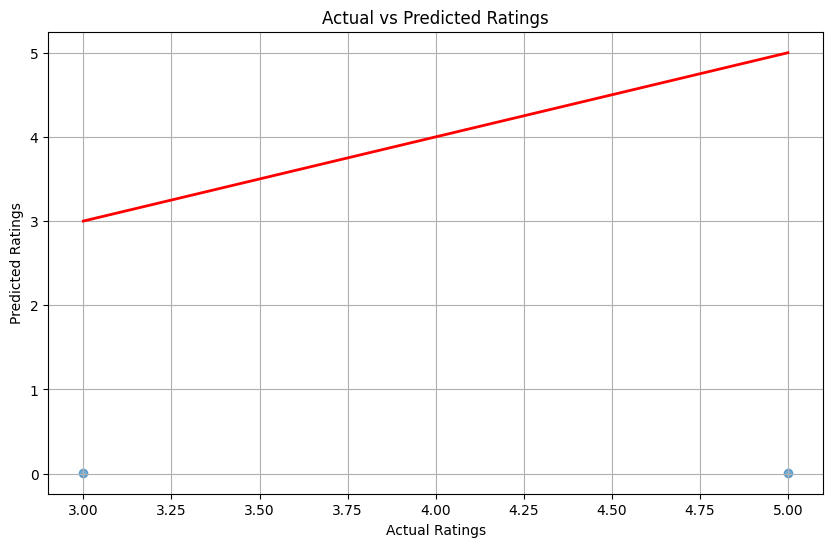


Predicted Ratings for all user-item pairs:
User 1 - Item 101: Predicted Rating = 0.01
User 1 - Item 102: Predicted Rating = 0.01
User 1 - Item 103: Predicted Rating = 0.01
User 1 - Item 104: Predicted Rating = 0.01
User 1 - Item 105: Predicted Rating = 0.01
User 2 - Item 101: Predicted Rating = 0.01
User 2 - Item 102: Predicted Rating = 0.01
User 2 - Item 103: Predicted Rating = 0.01
User 2 - Item 104: Predicted Rating = 0.01
User 2 - Item 105: Predicted Rating = 0.01
User 3 - Item 101: Predicted Rating = 0.01
User 3 - Item 102: Predicted Rating = 0.01
User 3 - Item 103: Predicted Rating = 0.01
User 3 - Item 104: Predicted Rating = 0.01
User 3 - Item 105: Predicted Rating = 0.01
User 4 - Item 101: Predicted Rating = 0.01
User 4 - Item 102: Predicted Rating = 0.01
User 4 - Item 103: Predicted Rating = 0.01
User 4 - Item 104: Predicted Rating = 0.01
User 4 - Item 105: Predicted Rating = 0.01


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

y_pred = model.predict([X_test[:, 0], X_test[:, 1]], verbose=0)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Evaluation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Ideal line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid()
plt.show()

predicted_ratings = {}
for user_id in user_mapping.keys():
    for item_id in item_mapping.keys():
        predicted_rating = model.predict([np.array([user_mapping[user_id]]), np.array([item_mapping[item_id]])], verbose=0)
        predicted_ratings[(user_id, item_id)] = predicted_rating[0][0]

print("\nPredicted Ratings for all user-item pairs:")
for (user_id, item_id), rating in predicted_ratings.items():
    print(f"User {user_id} - Item {item_id}: Predicted Rating = {rating:.2f}")


system validation

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.optimizers import Adam
from math import sqrt

tf.get_logger().setLevel('ERROR')

data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
    'item_id': [101, 102, 103, 101, 104, 103, 105, 101, 102, 104],
    'rating': [5, 3, 4, 2, 4, 5, 1, 3, 5, 4]
}
df = pd.DataFrame(data)

user_ids = df['user_id'].unique()
item_ids = df['item_id'].unique()

user_mapping = {user_id: idx for idx, user_id in enumerate(user_ids)}
item_mapping = {item_id: idx for idx, item_id in enumerate(item_ids)}

df['user_index'] = df['user_id'].map(user_mapping)
df['item_index'] = df['item_id'].map(item_mapping)

X = df[['user_index', 'item_index']].values
y = df['rating'].values

def build_model(num_users, num_items, embedding_dim=8):
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

    user_vector = Flatten()(user_embedding)
    item_vector = Flatten()(item_embedding)

    dot_product = Dot(axes=1)([user_vector, item_vector])
    output = Dense(1, activation='linear')(dot_product)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

def cross_validate_model(X, y, num_users, num_items, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold = 1
    rmse_scores = []

    for train_index, val_index in kf.split(X):
        print(f"Training fold {fold}...")
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = build_model(num_users, num_items)
        model.fit([X_train[:, 0], X_train[:, 1]], y_train, batch_size=32, epochs=10, verbose=0)

        predictions = model.predict([X_val[:, 0], X_val[:, 1]], verbose=0)
        rmse = sqrt(mean_squared_error(y_val, predictions))
        rmse_scores.append(rmse)

        print(f"Fold {fold} RMSE: {rmse:.4f}")
        fold += 1

    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    print(f"Cross-Validation RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}")

num_users = len(user_mapping)
num_items = len(item_mapping)
cross_validate_model(X, y, num_users, num_items)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = build_model(num_users, num_items)
model.fit([X_train[:, 0], X_train[:, 1]], y_train, batch_size=32, epochs=10, verbose=0)
test_predictions = model.predict([X_test[:, 0], X_test[:, 1]], verbose=0)
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
print(f'Test RMSE: {test_rmse:.4f}')

user_id = 1
item_id = 101

predicted_rating = model.predict([np.array([user_mapping[user_id]]), np.array([item_mapping[item_id]])], verbose=0)
print(f"Predicted rating for user {user_id} on item {item_id}: {predicted_rating[0][0]:.2f}")

print("User Mapping:", user_mapping)
print("Item Mapping:", item_mapping)


Training fold 1...
Fold 1 RMSE: 4.1118
Training fold 2...
Fold 2 RMSE: 4.9904
Training fold 3...
Fold 3 RMSE: 3.5250
Training fold 4...
Fold 4 RMSE: 3.9894
Training fold 5...
Fold 5 RMSE: 1.5695
Cross-Validation RMSE: 3.6372 ± 1.1374
Test RMSE: 4.1134
Predicted rating for user 1 on item 101: 0.01
User Mapping: {1: 0, 2: 1, 3: 2, 4: 3}
Item Mapping: {101: 0, 102: 1, 103: 2, 104: 3, 105: 4}


# **Hybrid Filtering**

TF-IDF Matrix Shape: (5, 3)
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


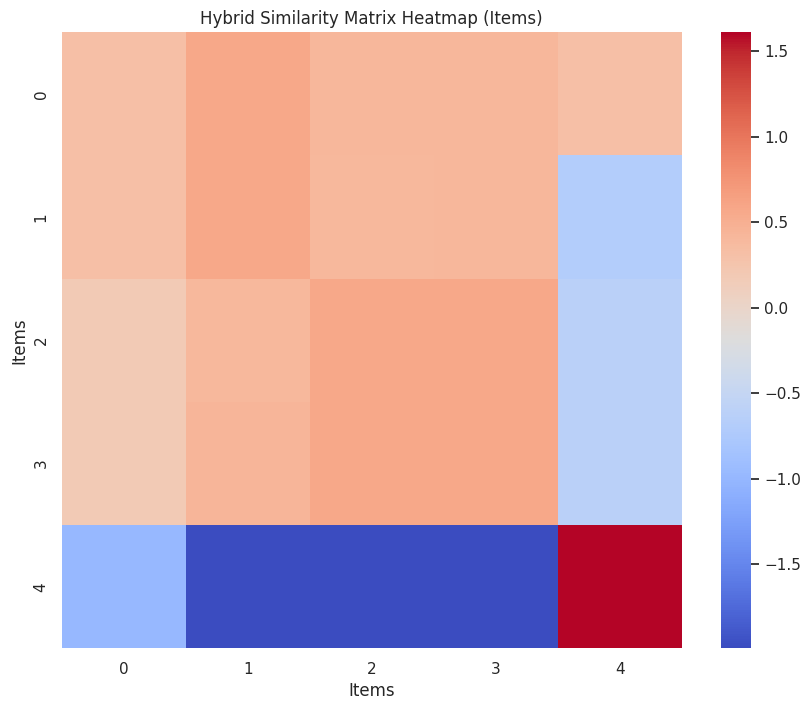

Hybrid Recommendations for User 1: [(104, 3.586061516651845), (105, 0)]


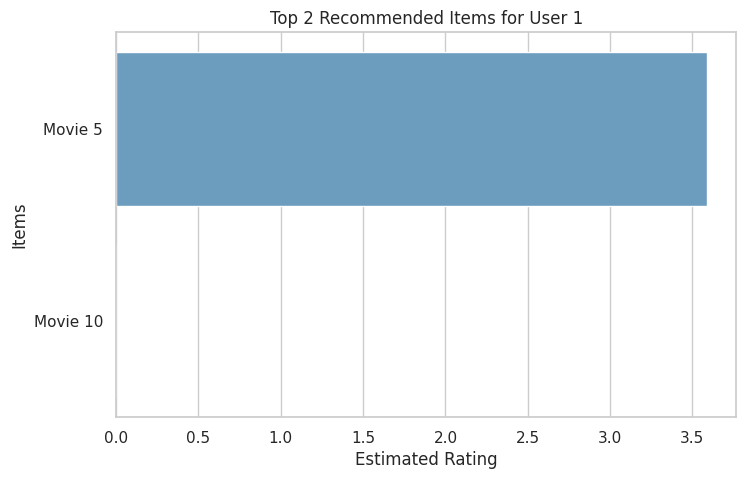

Hybrid Recommendations for User 2: [(102, 4.715698325994614), (103, 4.6174830643305915), (105, 0)]


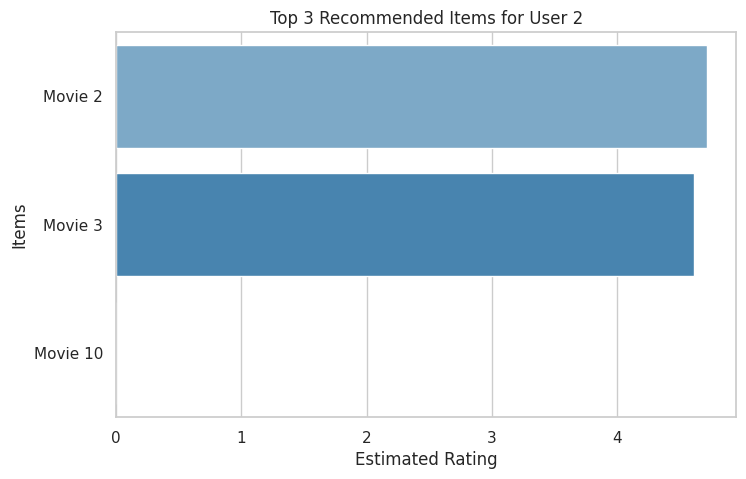

Hybrid Recommendations for User 3: [(101, 3.2068830793277088), (105, 0)]


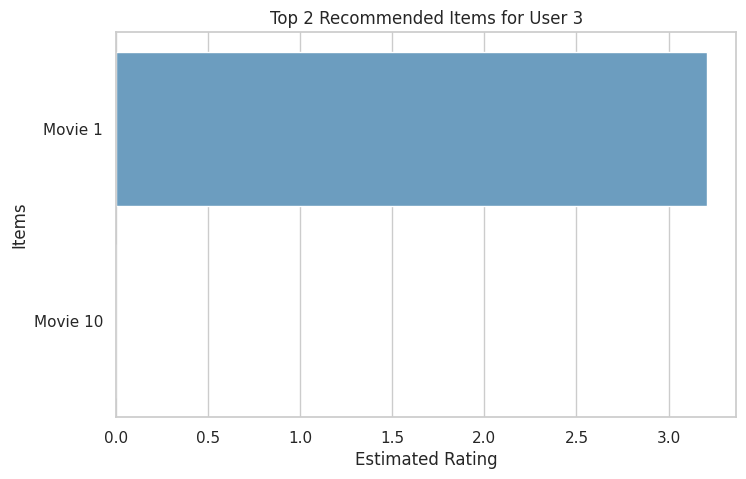

Hybrid Recommendations for User 4: [(102, 0), (103, 0), (104, 0)]


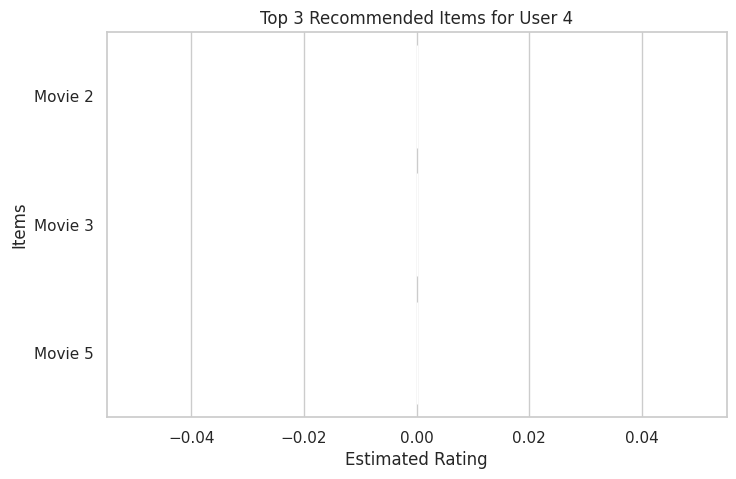

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0],
    'cast': [
        "Actor A, Actor B", "Actor C, Actor D", "Actor E",
        "Actor A, Actor F", "Actor G", "Actor C",
        "Actor E, Actor G", "Actor F, Actor D", "Actor A", "Actor H"
    ],
    'title': [
        "Movie 1", "Movie 2", "Movie 3",
        "Movie 4", "Movie 5", "Movie 6",
        "Movie 7", "Movie 8", "Movie 9", "Movie 10"
    ]
}

# Step 1: Convert data to a DataFrame
df = pd.DataFrame(data)

# -------------------- Content-Based Filtering (CBF) ---------------------

# Step 2: Combine 'cast' and 'title' columns for richer text data
df['combined_text'] = df['cast'] + " " + df['title']

# Step 3: Ensure we're using unique items (because CF uses unique items)
unique_items_df = df.drop_duplicates(subset=['itemId'])

# Step 4: Apply TF-IDF vectorization on the combined text column
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(unique_items_df['combined_text'])

# Check the shape of TF-IDF matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

# Step 5: Apply Truncated SVD with dynamic n_components based on available features
n_features = X_tfidf.shape[1]
n_components = min(10, n_features)  # Ensure n_components <= n_features

if n_features > 1:  # Check if there are more than 1 feature
    svd_cbf = TruncatedSVD(n_components=n_components, random_state=42)
    X_cbf_svd = svd_cbf.fit_transform(X_tfidf)

    # Compute cosine similarities between items based on their descriptions
    similarity_matrix_cbf = cosine_similarity(X_cbf_svd)
else:
    print("Not enough features for Truncated SVD. Please add more textual data.")

# -------------------- Collaborative Filtering (CF) ---------------------

# Load the data into Surprise format for CF
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)
trainset = data.build_full_trainset()

# Train a KNNBasic CF model (Item-based collaborative filtering)
sim_options = {'name': 'cosine', 'user_based': False}
model_cf = KNNBasic(sim_options=sim_options)
model_cf.fit(trainset)

# Get similarity matrix for unique items
similarity_matrix_cf = model_cf.compute_similarities()

# -------------------- Hybrid Filtering (Combining CF and CBF) ---------------------

# Normalize and combine the similarity matrices
scaler = StandardScaler()
similarity_matrix_cf_scaled = scaler.fit_transform(similarity_matrix_cf)

if n_features > 1:
    similarity_matrix_cbf_scaled = scaler.fit_transform(similarity_matrix_cbf)

    # Ensure both matrices are the same shape (based on unique items)
    hybrid_similarity_matrix = (similarity_matrix_cf_scaled + similarity_matrix_cbf_scaled) / 2

    # -------------------- Graphs --------------------

    # Plot 1: Heatmap of Hybrid Similarity Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(hybrid_similarity_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title("Hybrid Similarity Matrix Heatmap (Items)")
    plt.xlabel("Items")
    plt.ylabel("Items")
    plt.show()

    # Function to get hybrid recommendations
    def get_hybrid_recommendations(user_id, top_n=5):
        # Get the list of items rated by the user
        user_ratings = df[df['userId'] == user_id][['itemId', 'rating']]
        rated_items = user_ratings['itemId'].values

        # Predict for items not rated by the user
        all_items = unique_items_df['itemId'].unique()  # Use unique items
        items_to_predict = [item for item in all_items if item not in rated_items]

        # For each item, use the hybrid similarity to predict the rating
        estimated_ratings = []
        for item_id in items_to_predict:
            item_idx = np.where(all_items == item_id)[0][0]
            sim_sum = 0
            weighted_sum = 0
            for rated_item in rated_items:
                rated_item_idx = np.where(all_items == rated_item)[0][0]
                sim = hybrid_similarity_matrix[item_idx, rated_item_idx]
                rating = user_ratings[user_ratings['itemId'] == rated_item]['rating'].values[0]
                weighted_sum += sim * rating
                sim_sum += sim

            if sim_sum > 0:
                estimated_rating = weighted_sum / sim_sum
            else:
                estimated_rating = 0
            estimated_ratings.append((item_id, estimated_rating))

        # Sort the items by predicted rating
        recommendations = sorted(estimated_ratings, key=lambda x: x[1], reverse=True)
        return recommendations[:top_n]

    # -------------------- Generate Recommendations and Plot --------------------

    user_ids = df['userId'].unique()  # Get all users

    for user_id in user_ids:
        recommendations = get_hybrid_recommendations(user_id, top_n=5)
        print(f"Hybrid Recommendations for User {user_id}: {recommendations}")

        # Plot 2: Barplot of Top N Recommendations for the User
        item_ids, estimated_ratings = zip(*recommendations)  # Unpack the recommendations
        item_titles = unique_items_df[unique_items_df['itemId'].isin(item_ids)]['title'].values  # Get titles

        plt.figure(figsize=(8, 5))
        sns.barplot(x=estimated_ratings, y=item_titles, palette="Blues_d")
        plt.title(f"Top {len(item_titles)} Recommended Items for User {user_id}")
        plt.xlabel("Estimated Rating")
        plt.ylabel("Items")
        plt.show()

else:
    print("Skipping hybrid recommendations due to insufficient content-based features.")


Performance

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_absolute_error, confusion_matrix
import numpy as np
import math

# Sample Data
data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'itemId': [101, 102, 103, 101, 104, 102, 103, 104, 101, 105],
    'rating': [4.5, 4.0, 3.0, 5.0, 4.5, 3.5, 4.0, 2.0, 5.0, 4.0],
    'cast': [
        "Actor A, Actor B", "Actor C, Actor D", "Actor E",
        "Actor A, Actor F", "Actor G", "Actor C",
        "Actor E, Actor G", "Actor F, Actor D", "Actor A", "Actor H"
    ],
    'title': [
        "Movie 1", "Movie 2", "Movie 3",
        "Movie 4", "Movie 5", "Movie 6",
        "Movie 7", "Movie 8", "Movie 9", "Movie 10"
    ]
}

# Step 1: Convert data to a DataFrame
df = pd.DataFrame(data)

# -------------------- Content-Based Filtering (CBF) ---------------------

# Step 2: Combine 'cast' and 'title' columns for richer text data
df['combined_text'] = df['cast'] + " " + df['title']

# Step 3: Ensure we're using unique items (because CF uses unique items)
unique_items_df = df.drop_duplicates(subset=['itemId'])

# Step 4: Apply TF-IDF vectorization on the combined text column
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(unique_items_df['combined_text'])

# Step 5: Apply Truncated SVD with dynamic n_components based on available features
n_features = X_tfidf.shape[1]
n_components = min(10, n_features)  # Ensure n_components <= n_features

if n_features > 1:  # Check if there are more than 1 feature
    svd_cbf = TruncatedSVD(n_components=n_components, random_state=42)
    X_cbf_svd = svd_cbf.fit_transform(X_tfidf)

    # Compute cosine similarities between items based on their descriptions
    similarity_matrix_cbf = cosine_similarity(X_cbf_svd)
else:
    print("Not enough features for Truncated SVD. Please add more textual data.")

# -------------------- Collaborative Filtering (CF) ---------------------

# Load the data into Surprise format for CF
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'itemId', 'rating']], reader)

# Split into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train a KNNBasic CF model (Item-based collaborative filtering)
sim_options = {'name': 'cosine', 'user_based': False}
model_cf = KNNBasic(sim_options=sim_options)
model_cf.fit(trainset)

# Get similarity matrix for unique items
similarity_matrix_cf = model_cf.compute_similarities()

# -------------------- Align CF and CBF Matrices ---------------------

# Ensure both similarity matrices have the same shape (based on common items)
common_items = unique_items_df['itemId'].unique()  # Get the unique item IDs
n_common_items = len(common_items)

# Truncate both matrices to ensure they cover the same items
similarity_matrix_cf = similarity_matrix_cf[:n_common_items, :n_common_items]
similarity_matrix_cbf = similarity_matrix_cbf[:n_common_items, :n_common_items]

# Combine the similarity matrices
hybrid_similarity_matrix = (similarity_matrix_cf + similarity_matrix_cbf) / 2

# -------------------- Function to Get Hybrid Recommendations --------------------

def get_hybrid_recommendations(user_id, top_n=5):
    # Get the list of items rated by the user
    user_ratings = df[df['userId'] == user_id][['itemId', 'rating']]
    rated_items = user_ratings['itemId'].values

    # Predict for items not rated by the user
    items_to_predict = [item for item in common_items if item not in rated_items]

    # For each item, use the hybrid similarity to predict the rating
    estimated_ratings = []
    for item_id in items_to_predict:
        item_idx = np.where(common_items == item_id)[0][0]
        sim_sum = 0
        weighted_sum = 0
        for rated_item in rated_items:
            rated_item_idx = np.where(common_items == rated_item)[0][0]
            sim = hybrid_similarity_matrix[item_idx, rated_item_idx]
            rating = user_ratings[user_ratings['itemId'] == rated_item]['rating'].values[0]
            weighted_sum += sim * rating
            sim_sum += sim

        if sim_sum > 0:
            estimated_rating = weighted_sum / sim_sum
        else:
            estimated_rating = 0
        estimated_ratings.append((item_id, estimated_rating))

    # Sort the items by predicted rating
    recommendations = sorted(estimated_ratings, key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]

# -------------------- Performance Metrics --------------------

# Collect predictions and actual values for test set
all_predictions = []
all_actual_ratings = []

for user_id, item_id, true_rating in testset:
    recommendations = get_hybrid_recommendations(user_id, top_n=5)

    # Extract the predicted rating for the item in the test set
    predicted_rating = [r[1] for r in recommendations if r[0] == item_id]
    if predicted_rating:
        all_predictions.append(predicted_rating[0])
    else:
        all_predictions.append(np.mean([r[1] for r in recommendations]))  # Use the average predicted rating

    all_actual_ratings.append(true_rating)

# -------------------- Confusion Matrix and Accuracy --------------------

# Convert ratings to binary: 1 for positive (>= 4), 0 for negative (< 4)
y_true = [1 if r >= 4 else 0 for r in all_actual_ratings]
y_pred = [1 if r >= 4 else 0 for r in all_predictions]

# Compute confusion matrix with explicit labels [0, 1]
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
print(f"Confusion Matrix:\n{cm}")

# Extract TP, FP, TN, FN safely
TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)

# Accuracy calculation
accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
print(f"Accuracy: {accuracy}")

# -------------------- Mean Absolute Error (MAE) --------------------

mae = mean_absolute_error(all_actual_ratings, all_predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Confusion Matrix:
[[1 0]
 [0 1]]
Accuracy: 1.0
Mean Absolute Error (MAE): 0.7219654411407739


#  Train Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_new = pd.read_csv('/content/netflix IDP.csv')


predictors = data_new.drop(columns=['rating'], axis=1)
target = data_new['rating']

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [ ]:
print("X_train shape:", X_train.shape)


X_train shape: (6229, 34)


In [ ]:
print("X_test shape:", X_test.shape)

X_test shape: (1558, 34)


In [ ]:
print("Y_train shape:", Y_train.shape)

Y_train shape: (6229,)


In [ ]:
print("Y_test shape:",Y_test.shape)

Y_test shape: (1558,)


V.Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

**ML Algorithms**

# **SVM**

SVM Accuracy: 75.80%
              precision    recall  f1-score   support

       Movie       0.78      0.92      0.84      1090
     TV Show       0.67      0.39      0.49       468

    accuracy                           0.76      1558
   macro avg       0.72      0.65      0.67      1558
weighted avg       0.74      0.76      0.74      1558



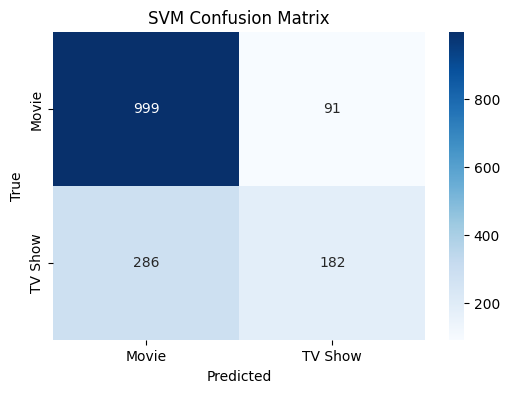

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Drop rows with missing 'type' or 'description'
df = df.dropna(subset=['type', 'description'])

# Features (X) and Labels (y)
X = df['description']  # Using 'description' as the main feature
y = df['type']         # Target is the 'type' column (Movie/TV Show)

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_svm = model_svm.predict(X_test_tfidf)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Decision Tree**

Decision Tree Accuracy: 64.70%
              precision    recall  f1-score   support

       Movie       0.75      0.73      0.74      1090
     TV Show       0.42      0.44      0.43       468

    accuracy                           0.65      1558
   macro avg       0.59      0.59      0.59      1558
weighted avg       0.65      0.65      0.65      1558



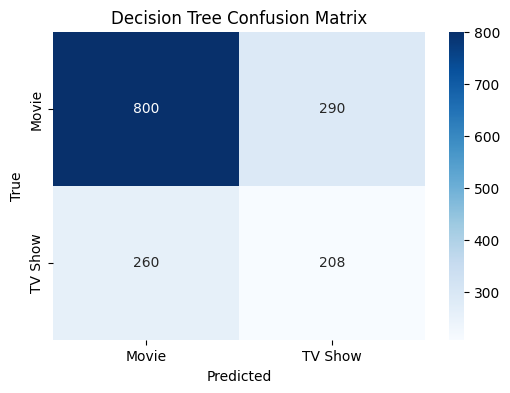

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Drop rows with missing 'type' or 'description'
df = df.dropna(subset=['type', 'description'])

# Features (X) and Labels (y)
X = df['description']  # Using 'description' as the main feature
y = df['type']         # Target is the 'type' column (Movie/TV Show)

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_dt = model_dt.predict(X_test_tfidf)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Random Forest**

Random Forest Accuracy: 74.20%
              precision    recall  f1-score   support

       Movie       0.76      0.92      0.83      1090
     TV Show       0.64      0.32      0.43       468

    accuracy                           0.74      1558
   macro avg       0.70      0.62      0.63      1558
weighted avg       0.72      0.74      0.71      1558



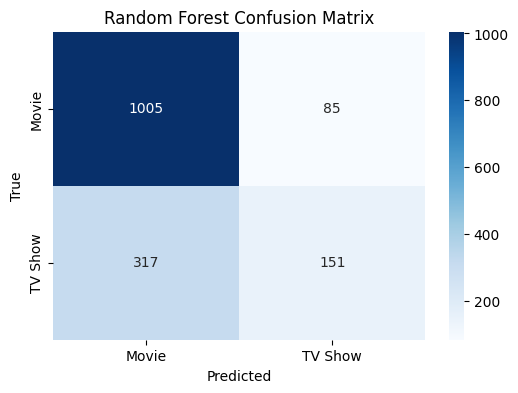

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Drop rows with missing 'type' or 'description'
df = df.dropna(subset=['type', 'description'])

# Features (X) and Labels (y)
X = df['description']  # Using 'description' as the main feature
y = df['type']         # Target is the 'type' column (Movie/TV Show)

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Added random_state for reproducibility
model_rf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_rf = model_rf.predict(X_test_tfidf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **XGBOOST**

XGBoost Accuracy: 74.52%
              precision    recall  f1-score   support

       Movie       0.76      0.94      0.84      1090
     TV Show       0.67      0.30      0.42       468

    accuracy                           0.75      1558
   macro avg       0.71      0.62      0.63      1558
weighted avg       0.73      0.75      0.71      1558



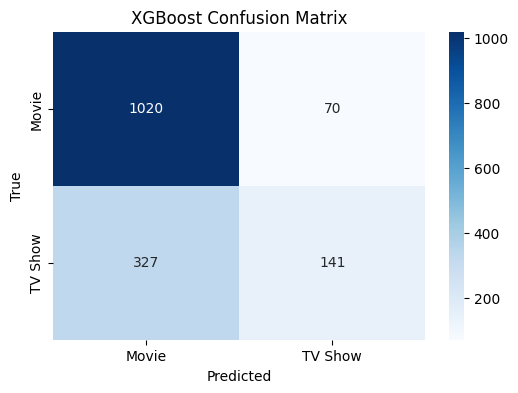

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Load dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Drop rows with missing 'type' or 'description'
df = df.dropna(subset=['type', 'description'])

# Features (X) and Labels (y)
X = df['description']  # Using 'description' as the main feature
y = df['type']         # Target is the 'type' column (Movie/TV Show)

# Encode target labels (Movie/TV Show) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'Movie' -> 0 and 'TV Show' -> 1

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')  # Removed use_label_encoder

# Train the model
model_xgb.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_xgb = model_xgb.predict(X_test_tfidf)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

# Classification report (convert numeric predictions back to original labels for clarity)
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred_xgb)))

# Confusion matrix
cm_xgb = confusion_matrix(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred_xgb))

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **K Nearest Neighbors**

KNN Accuracy: 68.74%
              precision    recall  f1-score   support

       Movie       0.75      0.84      0.79      1090
     TV Show       0.47      0.34      0.39       468

    accuracy                           0.69      1558
   macro avg       0.61      0.59      0.59      1558
weighted avg       0.66      0.69      0.67      1558



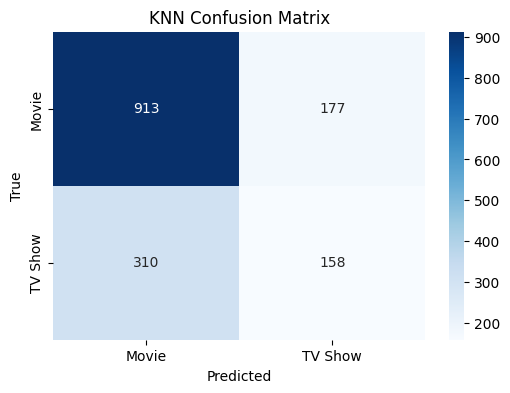

KNN Model RMSE: 0.4560


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Drop rows with missing 'type' or 'description'
df = df.dropna(subset=['type', 'description'])

# Features (X) and Labels (y)
X = df['description']  # Using 'description' as the main feature
y = df['type']         # Target is the 'type' column (Movie/TV Show)

# Encode target labels (Movie/TV Show) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'Movie' -> 0 and 'TV Show' -> 1

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (default is 5)

# Train the model
model_knn.fit(X_train_tfidf, y_train)

# Predict class labels on the test data
y_pred_knn = model_knn.predict(X_test_tfidf)

# Predict probabilities on the test data
y_pred_prob_knn = model_knn.predict_proba(X_test_tfidf)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Classification report (convert numeric predictions back to original labels for clarity)
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred_knn)))

# Confusion matrix
cm_knn = confusion_matrix(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred_knn))

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# RMSE Calculation
# One-hot encode the true labels for RMSE calculation
n_classes = len(np.unique(y_encoded))
y_test_onehot = np.eye(n_classes)[y_test]  # One-hot encode the true labels

# Calculate RMSE between predicted probabilities and one-hot encoded true labels
rmse_knn = np.sqrt(mean_squared_error(y_test_onehot, y_pred_prob_knn))
print(f"KNN Model RMSE: {rmse_knn:.4f}")


# **Neural Network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network Accuracy: 73.81%
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1090
           1       0.57      0.54      0.55       468

    accuracy                           0.74      1558
   macro avg       0.69      0.68      0.68      1558
weighted avg       0.73      0.74      0.74      1558



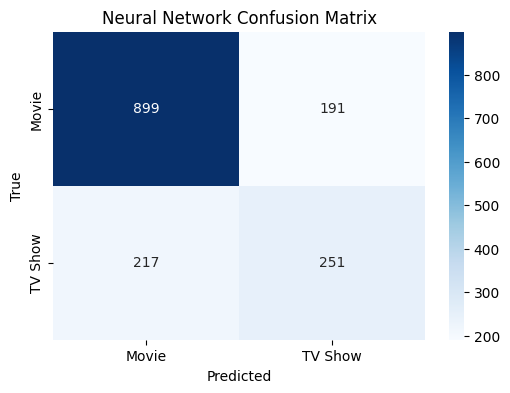

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load your dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Preprocess your data
X = df['description']  # Assuming 'description' is the feature
y = df['type']  # Assuming 'type' is the target variable (Movie/TV Show)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert text data to numerical data (using TF-IDF, CountVectorizer, etc.)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the Neural Network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train_cat, epochs=10, batch_size=32, verbose=0)

# Predict on the test data
y_pred_prob = model.predict(X_test_tfidf)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy_nn * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Naive bayes**

Naive Bayes Accuracy: 75.03%
              precision    recall  f1-score   support

       Movie       0.75      0.97      0.84      1090
     TV Show       0.76      0.25      0.37       468

    accuracy                           0.75      1558
   macro avg       0.75      0.61      0.61      1558
weighted avg       0.75      0.75      0.70      1558



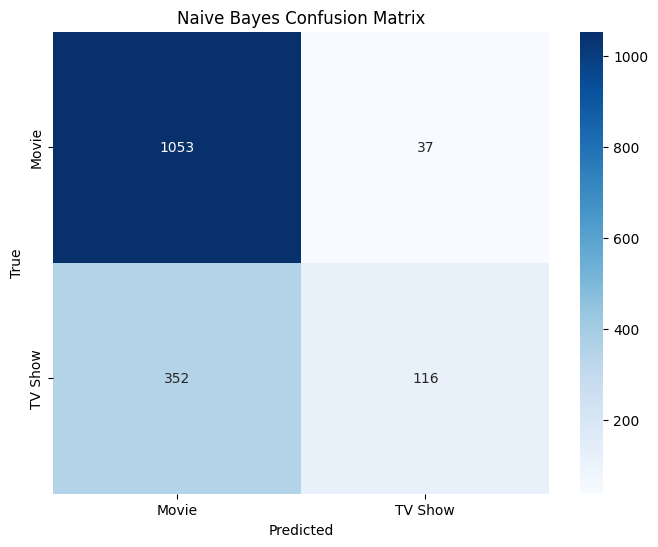

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Drop rows with missing 'type' or 'description'
df = df.dropna(subset=['type', 'description'])

# Features (X) and Labels (y)
X = df['description']  # Using 'description' as the main feature
y = df['type']         # Target is the 'type' column (Movie/TV Show)

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_nb = model_nb.predict(X_test_tfidf)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Logistic Regression**

Logistic Regression Accuracy: 77.09%
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1090
           1       0.77      0.34      0.47       468

    accuracy                           0.77      1558
   macro avg       0.77      0.65      0.66      1558
weighted avg       0.77      0.77      0.74      1558



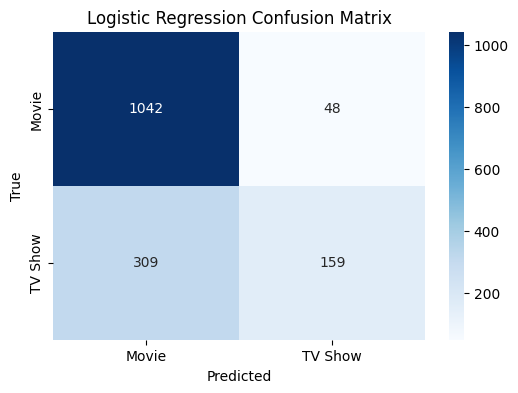

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Preprocess your data
X = df['description']  # Assuming 'description' is the feature
y = df['type']  # Assuming 'type' is the target variable (Movie/TV Show)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_tfidf)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Gradient Boosting Classifier(Boosting), Random Forest Classifier (Bagging)**

Gradient Boosting Classifier (Boosting) Accuracy: 77.54%
Random Forest Classifier (Bagging) Accuracy: 74.20%

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

     TV Show       0.66      0.52      0.58       468
       Movie       0.81      0.89      0.85      1090

    accuracy                           0.78      1558
   macro avg       0.74      0.70      0.71      1558
weighted avg       0.77      0.78      0.77      1558


Classification Report (Random Forest):
              precision    recall  f1-score   support

     TV Show       0.57      0.54      0.56       468
       Movie       0.81      0.83      0.82      1090

    accuracy                           0.74      1558
   macro avg       0.69      0.68      0.69      1558
weighted avg       0.74      0.74      0.74      1558



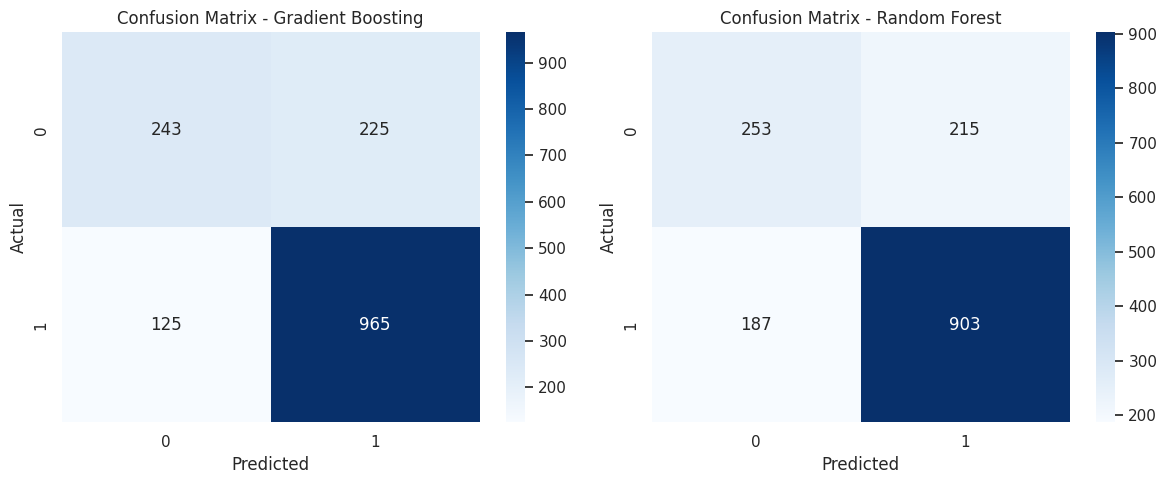

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "/content/netflix IDP.csv"
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
data_cleaned = data.drop(columns=[col for col in data.columns if "Unnamed" in col])
data_cleaned['country'].fillna('Unknown', inplace=True)
data_cleaned['rating'].fillna('Unknown', inplace=True)

# Step 2: Feature Engineering
label_encoders = {}
for column in ['country', 'rating', 'listed_in']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column].astype(str))
    label_encoders[column] = le

# Prepare features (X) and target (y)
X = data_cleaned[['release_year', 'country', 'rating']]
y = data_cleaned['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Gradient Boosting Classifier (Boosting)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Train the Random Forest Classifier (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions on the test set
gb_pred = gb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Models
gb_accuracy = accuracy_score(y_test, gb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the Results
print(f"Gradient Boosting Classifier (Boosting) Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Random Forest Classifier (Bagging) Accuracy: {rf_accuracy * 100:.2f}%")

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, gb_pred, target_names=['TV Show', 'Movie']))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred, target_names=['TV Show', 'Movie']))

# Create confusion matrices
gb_cm = confusion_matrix(y_test, gb_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(122)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# **LightGBM**

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
# ... (rest of your imports) ...

# Assuming you have your text data stored in a column called 'text_column'
# and the target labels stored in 'y' (which could be the 'label' column with 0/1)

# Ensure X and y have compatible shapes
# Example: If your text data is in 'data_cleaned['description']'
X_text = data_cleaned['description']

# Apply your text transformation (e.g., TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer  # Example using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_text)

# Now X_tfidf and y should have compatible shapes
print("Shape of X_tfidf:", X_tfidf.shape)
print("Shape of y:", y.shape)

# Splitting the data into training and validation sets with an 80-20 ratio
X_train, X_val, Y_train, Y_val = train_test_split(
    X_tfidf, y, random_state=2023, test_size=0.20
)

# Displaying the shapes of the training and validation sets
print("Training set shape (X_train):", X_train.shape)
print("Validation set shape (X_val):", X_val.shape)
print("Training set target shape (Y_train):", Y_train.shape)
print("Validation set target shape (Y_val):", Y_val.shape)

Shape of X_tfidf: (7787, 18168)
Shape of y: (7787,)
Training set shape (X_train): (6229, 18168)
Validation set shape (X_val): (1558, 18168)
Training set target shape (Y_train): (6229,)
Validation set target shape (Y_val): (1558,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler with `with_mean=False` to handle sparse data
scaler = StandardScaler(with_mean=False)

# Fit the scaler to the training data and transform both training and validation sets
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
# Training a LightGBM Classifier
from lightgbm import LGBMClassifier

# Initialize a LightGBM Classifier with 'auc' as the evaluation metric
model = LGBMClassifier(metric='auc')

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the training and validation sets
y_train = model.predict(X_train)
y_val = model.predict(X_val)


[LightGBM] [Info] Number of positive: 4298, number of negative: 1931
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25024
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 958
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689998 -> initscore=0.800112
[LightGBM] [Info] Start training from score 0.800112


In [ ]:
# Creating LightGBM Dataset and Setting Parameters
import lightgbm as lgb

# Create LightGBM Datasets for training and validation
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_val, label=Y_val, reference=train_data)

# Define hyperparameters and objective for LightGBM
params = {
	'objective': 'binary',
	'metric': 'auc',
	'boosting_type': 'gbdt',
	'num_leaves': 31,
	'learning_rate': 0.05,
	'feature_fraction': 0.9,
}


In [ ]:
# Training a LightGBM Model
num_round = 100

# Train a LightGBM model using defined parameters, training data, and specified number of rounds
model = lgb.train(params, train_data,
				num_round, valid_sets=[test_data])


[LightGBM] [Info] Number of positive: 4298, number of negative: 1931
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.285899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25024
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 958
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689998 -> initscore=0.800112
[LightGBM] [Info] Start training from score 0.800112


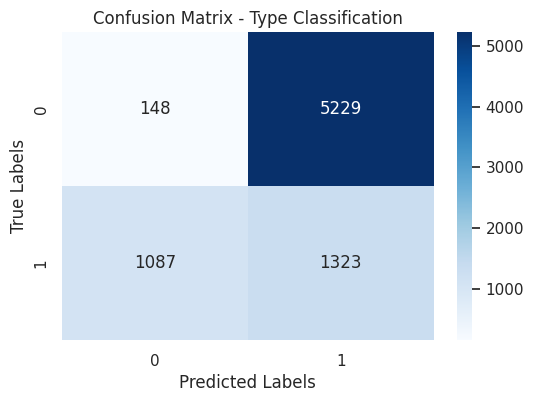

Classification Report:
               precision    recall  f1-score   support

       Movie       0.12      0.03      0.04      5377
     TV Show       0.20      0.55      0.30      2410

    accuracy                           0.19      7787
   macro avg       0.16      0.29      0.17      7787
weighted avg       0.15      0.19      0.12      7787

Accuracy: 18.89%


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for data loading, TF-IDF, and scaling) ...


# Load the validation data from a file (Assuming it's the same file used to create X_val)
validation_data = pd.read_csv('/content/netflix IDP.csv')

# Assuming you have a separate 'description' column for TF-IDF:
X_val_text = validation_data['description']  # Extract the 'description' column

# Apply TF-IDF vectorization to the validation text data
# (Assuming you have a fitted TfidfVectorizer named 'vectorizer')
X_val = vectorizer.transform(X_val_text)

# Apply scaling to the validation data if necessary
# (Assuming you have a fitted StandardScaler named 'scaler')
X_val = scaler.transform(X_val)

# Step 5: Make predictions using the trained model
y_pred_val = model.predict(X_val)

# Convert probabilities to binary predictions and map to original labels
# Assuming 'Movie' is represented by 0 and 'TV Show' by 1 in your training data
y_pred_val_binary = ['Movie' if pred < 0.5 else 'TV Show' for pred in y_pred_val]

# Extract the true labels from the validation data
y_true_val = validation_data['type']  # Extract the 'type' column

# Step 6: Confusion Matrix and Classification Report
cm = confusion_matrix(y_true_val, y_pred_val_binary)  # Use y_true_val for true labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Type Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("Classification Report:\n", classification_report(y_true_val, y_pred_val_binary))
accuracy_lgbm = accuracy_score(y_true_val, y_pred_val_binary)
print(f"Accuracy: {accuracy_lgbm * 100:.2f}%")

# **SVD**

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 2410, number of negative: 5377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 7787, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.309490 -> initscore=-0.802504
[LightGBM] [Info] Start training from score -0.802504
SVD-based Model RMSE: 0.2580


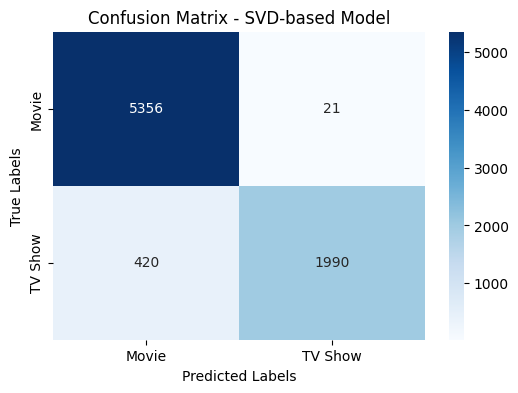

Classification Report (SVD):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5377
           1       0.99      0.83      0.90      2410

    accuracy                           0.94      7787
   macro avg       0.96      0.91      0.93      7787
weighted avg       0.95      0.94      0.94      7787

SVD-based Model Accuracy: 94.34%


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import numpy as np

# Step 1: Load your datasets
training_data = pd.read_csv('/content/netflix IDP.csv')  # Adjust the path as necessary
validation_data = pd.read_csv('/content/netflix IDP.csv')  # Load validation data similarly

# Step 2: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 3: Fit the encoder on the training data's true labels
training_data['type'] = label_encoder.fit_transform(training_data['type'])

# Step 4: Transform the validation data's true labels
validation_data['type'] = label_encoder.transform(validation_data['type'])

# Step 5: Fit the TF-IDF Vectorizer on the training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(training_data['description'])
X_val_tfidf = tfidf_vectorizer.transform(validation_data['description'])

# Step 6: Apply Truncated SVD
n_components = 100  # Adjust based on your dataset
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform the TF-IDF features using SVD
X_train_svd = svd.fit_transform(X_train_tfidf)
X_val_svd = svd.transform(X_val_tfidf)

# Step 7: Train the LightGBM model with the SVD-transformed training data
model_svd = LGBMClassifier(metric='auc')  # Define the model
model_svd.fit(X_train_svd, training_data['type'])  # Train the model

# Step 8: Make predictions on the validation set (Probabilities)
y_pred_prob_val_svd = model_svd.predict_proba(X_val_svd)

# For RMSE calculation, we can calculate the MSE between the predicted probabilities and one-hot encoded true labels.
# First, we need to one-hot encode the true labels
n_classes = len(label_encoder.classes_)
y_true_val_onehot = np.eye(n_classes)[validation_data['type']]

# Step 12: Calculate RMSE (between true one-hot labels and predicted probabilities)
rmse_svd = np.sqrt(mean_squared_error(y_true_val_onehot, y_pred_prob_val_svd))
print(f"SVD-based Model RMSE: {rmse_svd:.4f}")

# Rest of the code:
# Step 9: Confusion Matrix for the SVD-based model
y_pred_val_svd = model_svd.predict(X_val_svd)
cm_svd = confusion_matrix(validation_data['type'], y_pred_val_svd)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svd, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - SVD-based Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Classification Report
print("Classification Report (SVD):\n", classification_report(validation_data['type'], y_pred_val_svd))

# Step 11: Accuracy Score
accuracy_svd = accuracy_score(validation_data['type'], y_pred_val_svd)
print(f"SVD-based Model Accuracy: {accuracy_svd * 100:.2f}%")


# **K-means Clustering**

Silhouette Score: 0.01


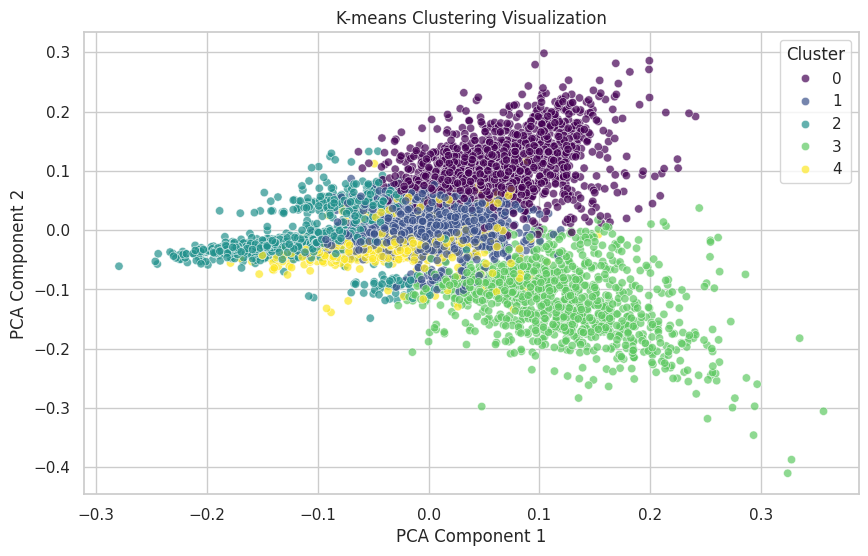

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Step 1: Load your dataset
data = pd.read_csv('/content/netflix IDP.csv')  # Adjust the path as necessary

# Step 2: Preprocess the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['description'])  # Assuming 'description' is the text column

# Step 3: Apply K-means clustering
n_clusters = 5  # Adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Step 4: Get cluster labels
data['cluster'] = kmeans.labels_

# Step 5: Evaluate the clustering
silhouette_avg = silhouette_score(X_tfidf, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Step 6: Visualize the clusters (optional)
# For visualization, we can reduce dimensions using PCA or TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='viridis', alpha=0.7)
plt.title('K-means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# **Ensemble models**

StackingClassifier

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/netflix IDP.csv"
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
# Drop columns that are mostly empty or not useful for modeling
data_cleaned = data.drop(columns=[col for col in data.columns if "Unnamed" in col])

# Handle missing values: Fill missing 'country', 'rating' with 'Unknown'
data_cleaned['country'].fillna('Unknown', inplace=True)
data_cleaned['rating'].fillna('Unknown', inplace=True)

# Step 2: Feature Engineering
# Encode categorical features using LabelEncoder
label_encoders = {}
for column in ['country', 'rating', 'listed_in']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Prepare features (X) and target (y)
X = data_cleaned[['release_year', 'country', 'rating']]
y = data_cleaned['type'].apply(lambda x: 1 if x == 'Movie' else 0)  # Encode: Movie = 1, TV Show = 0

# Step 3: Define Base Models for Stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Bagging
    ('gb', GradientBoostingClassifier(random_state=42))                 # Boosting
]

# Step 4: Define Meta-learner (Logistic Regression) for Stacking
meta_learner = LogisticRegression()

# Step 5: Train the Stacking Classifier on the entire dataset
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)
stacking_model.fit(X, y)

# Step 6: Make Predictions on the entire dataset
y_pred = stacking_model.predict(X)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred, target_names=['TV Show', 'Movie'])

# Print the Results
print(f"Stacking Classifier Accuracy on Entire Dataset: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)
#stacking

Stacking Classifier Accuracy on Entire Dataset: 80.11%

Classification Report:
              precision    recall  f1-score   support

     TV Show       0.73      0.58      0.64      2410
       Movie       0.83      0.90      0.86      5377

    accuracy                           0.80      7787
   macro avg       0.78      0.74      0.75      7787
weighted avg       0.79      0.80      0.79      7787



*Gradient Boosting Classifier(Boosting), Random Forest Classifier (Bagging) *

Gradient Boosting Classifier (Boosting) Accuracy: 77.54%
Random Forest Classifier (Bagging) Accuracy: 74.20%

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

     TV Show       0.66      0.52      0.58       468
       Movie       0.81      0.89      0.85      1090

    accuracy                           0.78      1558
   macro avg       0.74      0.70      0.71      1558
weighted avg       0.77      0.78      0.77      1558


Classification Report (Random Forest):
              precision    recall  f1-score   support

     TV Show       0.57      0.54      0.56       468
       Movie       0.81      0.83      0.82      1090

    accuracy                           0.74      1558
   macro avg       0.69      0.68      0.69      1558
weighted avg       0.74      0.74      0.74      1558



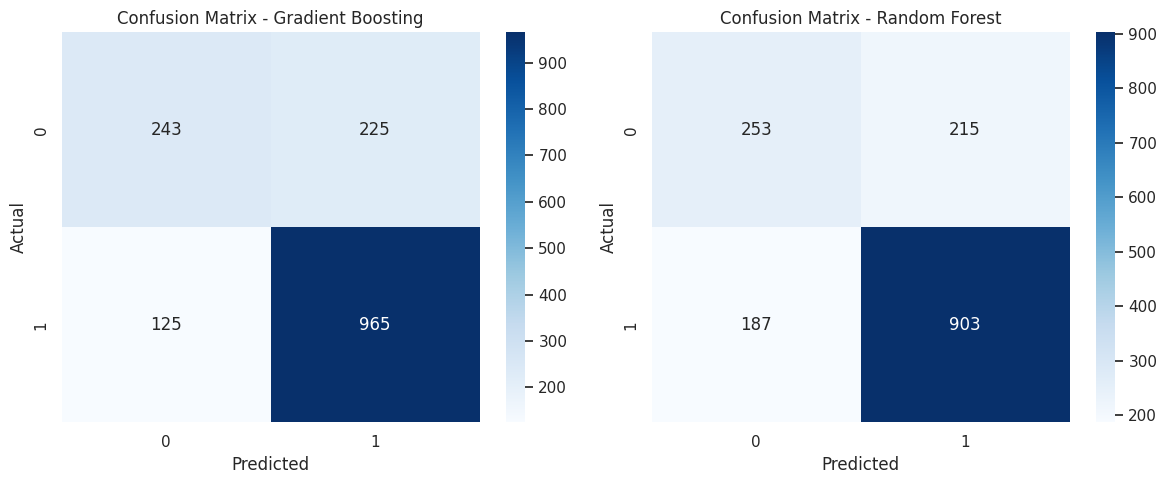

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "/content/netflix IDP.csv"
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
data_cleaned = data.drop(columns=[col for col in data.columns if "Unnamed" in col])
data_cleaned['country'].fillna('Unknown', inplace=True)
data_cleaned['rating'].fillna('Unknown', inplace=True)

# Step 2: Feature Engineering
label_encoders = {}
for column in ['country', 'rating', 'listed_in']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column].astype(str))
    label_encoders[column] = le

# Prepare features (X) and target (y)
X = data_cleaned[['release_year', 'country', 'rating']]
y = data_cleaned['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Gradient Boosting Classifier (Boosting)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Train the Random Forest Classifier (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions on the test set
gb_pred = gb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Models
gb_accuracy = accuracy_score(y_test, gb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the Results
print(f"Gradient Boosting Classifier (Boosting) Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Random Forest Classifier (Bagging) Accuracy: {rf_accuracy * 100:.2f}%")

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, gb_pred, target_names=['TV Show', 'Movie']))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred, target_names=['TV Show', 'Movie']))

# Create confusion matrices
gb_cm = confusion_matrix(y_test, gb_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(122)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

**GradientBoostingClassifier**

Confusion Matrix:
 [[1064   26]
 [ 369   99]]


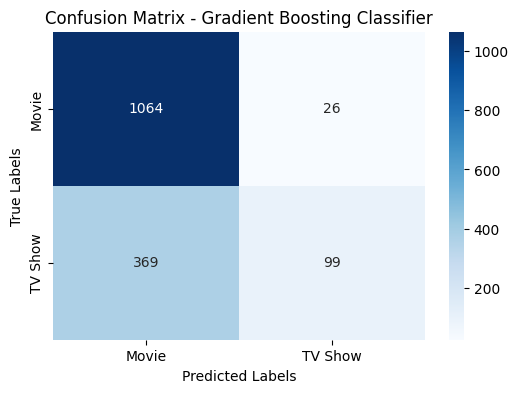

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84      1090
           1       0.79      0.21      0.33       468

    accuracy                           0.75      1558
   macro avg       0.77      0.59      0.59      1558
weighted avg       0.76      0.75      0.69      1558

Gradient Boosting Model Accuracy: 74.65%
Gradient Boosting Model RMSE: 0.4207


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your dataset
data = pd.read_csv('/content/netflix IDP.csv')  # Adjust the path as necessary

# Step 2: Preprocess the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['description'])  # Assuming 'description' is the text column

# Step 3: Prepare the labels and encode them
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['type'])  # Assuming 'type' is the target variable

# Step 4: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the validation set (Class labels and probabilities)
y_pred_val = gb_classifier.predict(X_val)
y_pred_prob_val = gb_classifier.predict_proba(X_val)

# Step 7: Evaluate the model
cm = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 8: Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred_val))

# Step 9: Accuracy Score
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Gradient Boosting Model Accuracy: {accuracy * 100:.2f}%")

# Step 10: RMSE Calculation
# One-hot encode the true labels for RMSE calculation
n_classes = len(np.unique(y))
y_val_onehot = np.eye(n_classes)[y_val]  # Ensure y_val contains integer indices

# Calculate RMSE between predicted probabilities and one-hot encoded true labels
rmse = np.sqrt(mean_squared_error(y_val_onehot, y_pred_prob_val))
print(f"Gradient Boosting Model RMSE: {rmse:.4f}")


# **Cascade Hybrid Model**

<ipython-input-3-2ccec7e15b0a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_data['release_year'] = (cf_data['release_year'] - cf_data['release_year'].min()) / (cf_data['release_year'].max() - cf_data['release_year'].min())


[LightGBM] [Info] Number of positive: 2410, number of negative: 5377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26010
[LightGBM] [Info] Number of data points in the train set: 7787, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.309490 -> initscore=-0.802504
[LightGBM] [Info] Start training from score -0.802504


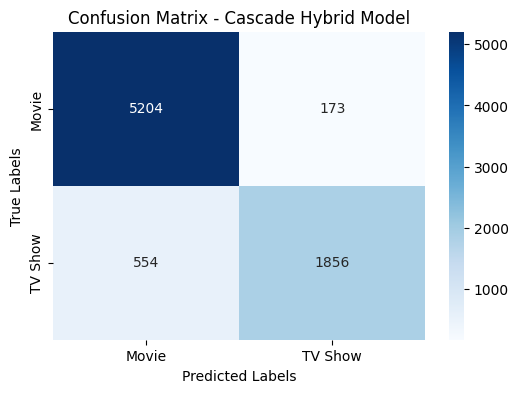

Classification Report (Cascade Hybrid Model):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      5377
           1       0.91      0.77      0.84      2410

    accuracy                           0.91      7787
   macro avg       0.91      0.87      0.89      7787
weighted avg       0.91      0.91      0.90      7787

Cascade Hybrid Model Accuracy: 90.66%
Cascade Hybrid Model RMSE: 0.2826


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('/content/netflix IDP.csv')

# Step 2: Handle missing values by filling or dropping as appropriate
data['description'] = data['cast'].fillna('')  # Using 'cast' as a description for content-based filtering
data = data.dropna(subset=['type'])  # Removing rows with missing 'type'

# Step 3: Label Encoding for the 'type' column (target labels)
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Label encode 'country' for collaborative filtering
data['country'] = LabelEncoder().fit_transform(data['country'].fillna('Unknown'))

# ------------------------------- Collaborative Filtering (CF) -------------------------------

# Collaborative Filtering using multiple features like 'release_year' and 'country'
cf_data = data[['release_year', 'country', 'type']]

# Normalize 'release_year' for better processing
cf_data['release_year'] = (cf_data['release_year'] - cf_data['release_year'].min()) / (cf_data['release_year'].max() - cf_data['release_year'].min())

# SVD on Collaborative Filtering Data ('release_year' and 'country') with n_components=2
svd_cf = TruncatedSVD(n_components=2, random_state=42)
X_cf_svd = svd_cf.fit_transform(cf_data[['release_year', 'country']])

# Rename CF columns
X_cf_svd = pd.DataFrame(X_cf_svd, columns=['CF_Feature1', 'CF_Feature2'])

# ------------------------------- Content-Based Filtering (CBF) -------------------------------

# Step 4: TF-IDF Vectorization on the 'description' column (content-based filtering)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['description'])

# Step 5: Apply Truncated SVD on the TF-IDF features for dimensionality reduction
svd_cbf = TruncatedSVD(n_components=100, random_state=42)
X_cbf_svd = svd_cbf.fit_transform(X_tfidf)

# Rename CBF columns
X_cbf_svd = pd.DataFrame(X_cbf_svd, columns=[f'CBF_Feature{i}' for i in range(1, 101)])

# ------------------------------- Cascade Hybrid Filtering -------------------------------

# Step 6: Combine CF and CBF outputs for the hybrid model
X_hybrid = pd.concat([X_cf_svd, X_cbf_svd], axis=1)

# Step 7: Train a model using the combined CF + CBF features
model_hybrid = LGBMClassifier(metric='auc')
model_hybrid.fit(X_hybrid, data['type'])

# Step 8: Predictions using the hybrid features
y_pred_hybrid = model_hybrid.predict(X_hybrid)

# Step 9: Confusion Matrix for the Cascade Hybrid Model
cm_hybrid = confusion_matrix(data['type'], y_pred_hybrid)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hybrid, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Cascade Hybrid Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Classification Report
print("Classification Report (Cascade Hybrid Model):\n", classification_report(data['type'], y_pred_hybrid))

# Step 11: Accuracy Score
accuracy_hybrid = accuracy_score(data['type'], y_pred_hybrid)
print(f"Cascade Hybrid Model Accuracy: {accuracy_hybrid * 100:.2f}%")

# Step 12: Calculate RMSE (Root Mean Squared Error)
# Predicting probabilities for RMSE calculation
y_pred_prob_hybrid = model_hybrid.predict_proba(X_hybrid)

# One-hot encode true labels
n_classes = len(label_encoder.classes_)
y_true_onehot = np.eye(n_classes)[data['type']]

# RMSE calculation
rmse_hybrid = np.sqrt(mean_squared_error(y_true_onehot, y_pred_prob_hybrid))
print(f"Cascade Hybrid Model RMSE: {rmse_hybrid:.4f}")


# **Comparision**

Output final score

                                      Model  Accuracy
9                                       SVD     94.34
14                     Cascade Hybrid Model     90.66
10                      Stacking Classifier     80.11
12  Gradient Boosting Classifier (Boosting)     77.54
0                       Logistic Regression     77.09
2                    Support Vector Machine     75.80
1                               Naive Bayes     75.03
11                        Gradient Boosting     74.65
6                                   XGBoost     74.52
5                             Random Forest     74.20
13                   Random Forest(Bagging)     74.20
7                            Neural Network     74.07
3                       K-Nearest Neighbors     68.74
4                             Decision Tree     64.70
8                                 Light gbm     31.49


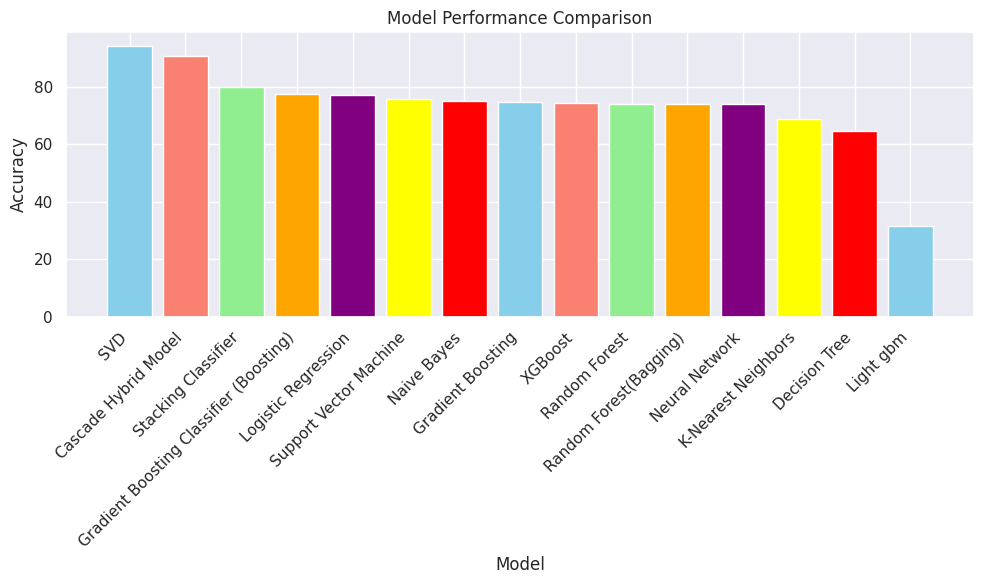

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

algorithms = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Random Forest',
              'XGBoost', 'Neural Network','Light gbm','SVD','Stacking Classifier','Gradient Boosting','Gradient Boosting Classifier (Boosting)','Random Forest(Bagging)','Cascade Hybrid Model']
scores = [77.09, 75.03, 75.80, 68.74, 64.70, 74.20, 74.52, 74.07,31.49,94.34,80.11,74.65,77.54,74.20,90.66]

# Create a DataFrame
model_performance = pd.DataFrame({'Model': algorithms, 'Accuracy': scores})

sns.set(rc={'figure.figsize': (15, 8)})

# Sort the DataFrame by accuracy in descending order
model_performance = model_performance.sort_values(by='Accuracy', ascending=False)

print(model_performance)

# Plotting the model performance
plt.figure(figsize=(10, 6))
plt.bar(model_performance['Model'], model_performance['Accuracy'], color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'red'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Logistic Regression has good result as compare to other algorithms**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

# Load your dataset
df = pd.read_csv('/content/netflix IDP.csv')

# Select relevant features (Adjust according to your columns)
df = df[['title', 'type']]  # Use 'title' as the feature and 'type' as the target

# Convert text data into a numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['title'])

# Encode the target labels ('type' column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf),
    ('xgb', xgb_model)
], voting='soft')  # 'soft' voting averages predicted probabilities

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 70.67%
              precision    recall  f1-score   support

       Movie       0.72      0.96      0.82      1090
     TV Show       0.56      0.11      0.19       468

    accuracy                           0.71      1558
   macro avg       0.64      0.54      0.50      1558
weighted avg       0.67      0.71      0.63      1558

